In [6]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
from matplotlib import cm

In [7]:
xvec = np.linspace(-15,15,100)
at = 1e-2
xcen=10
a = xcen/np.sqrt(2)
N = 100
rho1 = coherent_dm(N, a)
rho2 = coherent_dm(N, -a)

rho1at = coherent_dm(N, np.sqrt(at)*a)
rho2at = coherent_dm(N, -np.sqrt(at)*a)

rhoin = (rho1+rho2)/2
rhoout = (rho1 + rho2 + rho2at + rho1at)/4
wigner_in = wigner(rhoin,xvec,xvec)
wigner_out = wigner(rhoout, xvec, xvec)


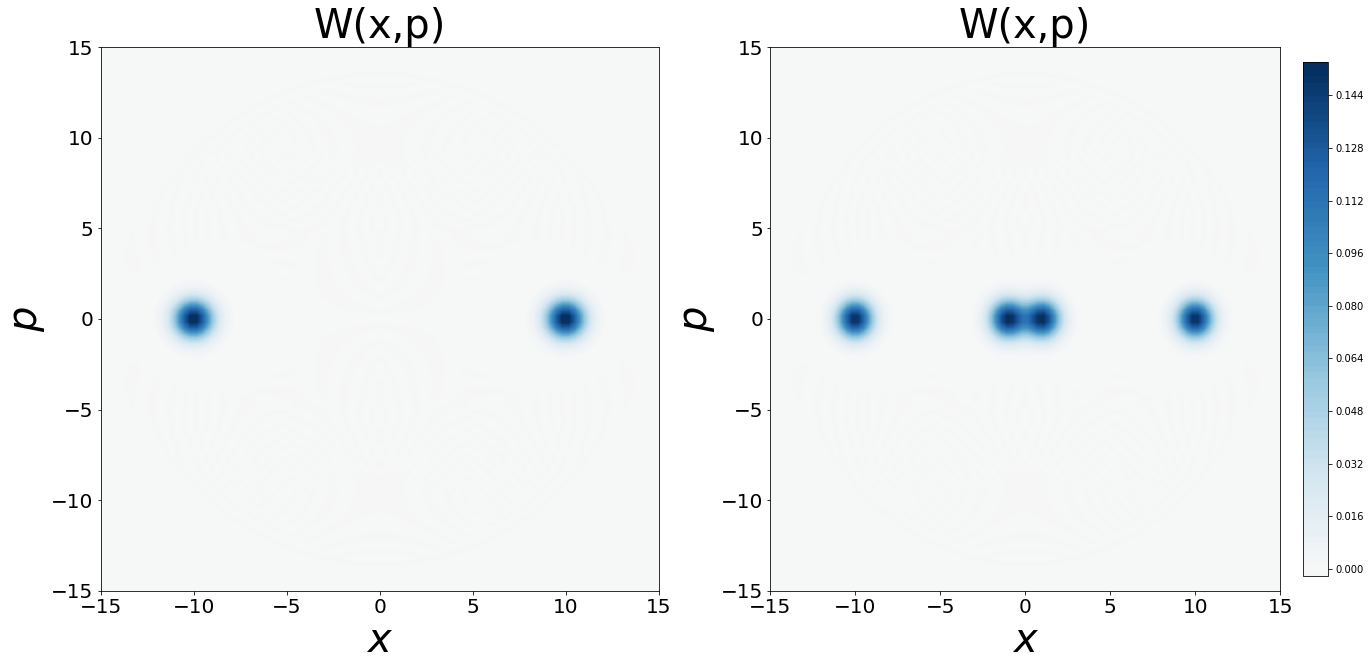

In [14]:

fig=plt.figure(figsize=(22,10))
ax1, ax2 = [plt.subplot2grid((1,2),(0,k)) for k in range(2)]

ls=40
im1 = ax1.contourf(xvec, xvec, wigner_in, 100, cmap=cm.RdBu, norm= mpl.colors.Normalize(-wigner_in.max(), wigner_in.max()))
im2 = ax2.contourf(xvec, xvec, wigner_out, 100, cmap=cm.RdBu, norm= mpl.colors.Normalize(-wigner_out.max(), wigner_out.max()))
fig.colorbar(im1,fraction=0.046, pad=0.04)

for ax in [ax1,ax2]:
    Lx=15
    Ly=15
    ax.set_xlim([-Lx,Lx])
    ax.set_ylim([-Ly,Ly])
    st=5
    ax.set_xticks(np.arange(-15,15+st,st))
    ax.set_yticks(np.arange(-15,15+st,st))    
    ax.set_xlabel(r'$x$',size=ls)
    ax.set_ylabel(r'$p$',size=ls)    
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_title("W(x,p)",size=ls)

In [22]:
from tqdm import tqdm

In [78]:
amps = np.linspace(.01,2.5,100)/np.sqrt(2)

 28%|██▊       | 28/100 [00:50<02:08,  1.79s/it]


KeyboardInterrupt: 

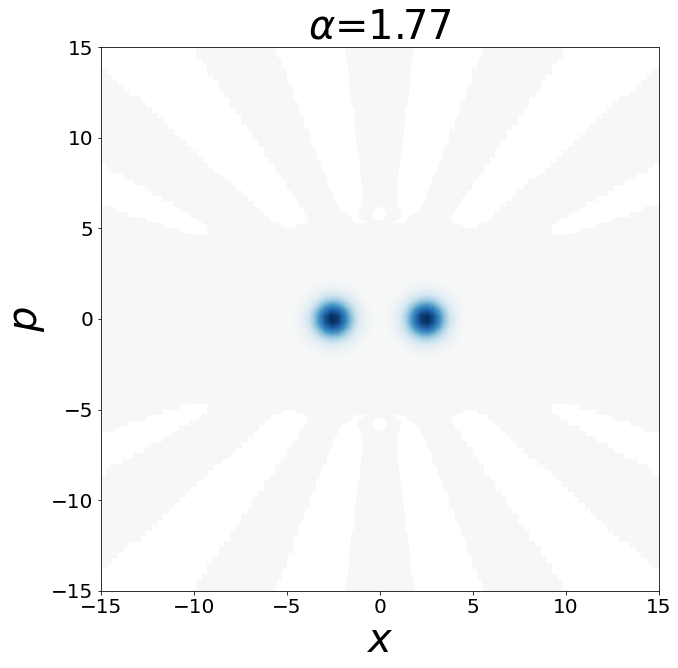

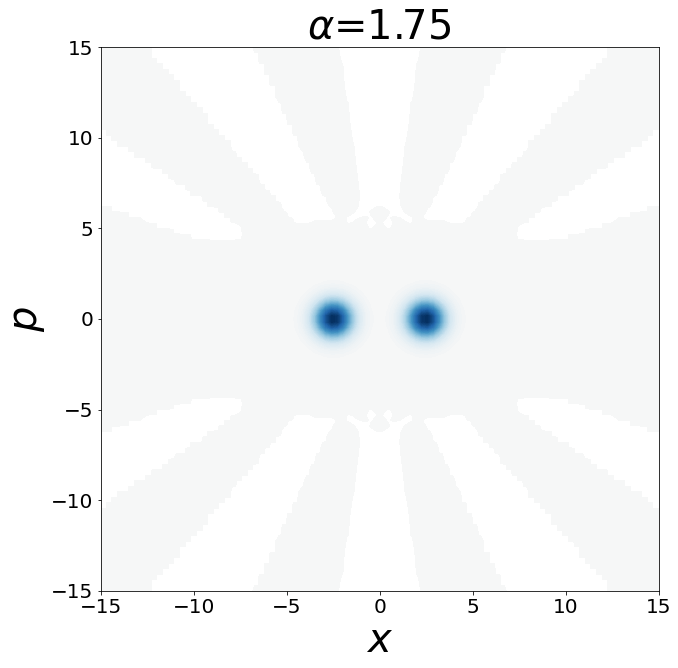

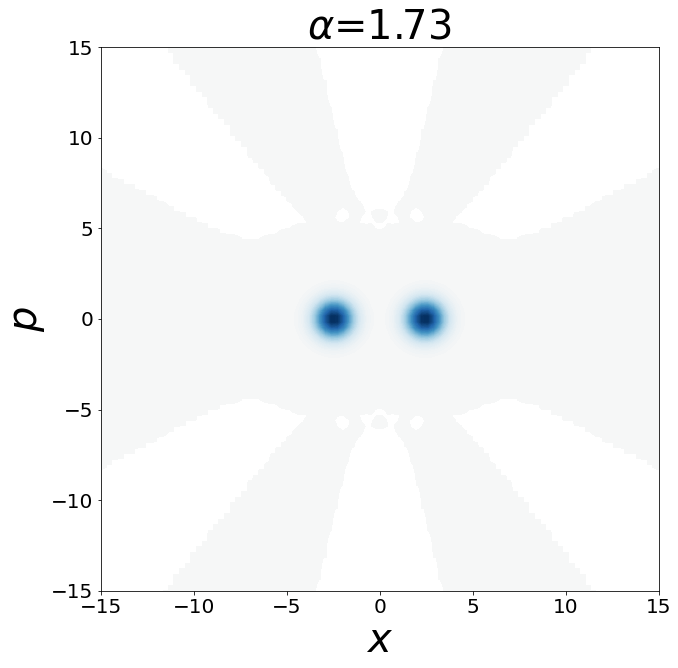

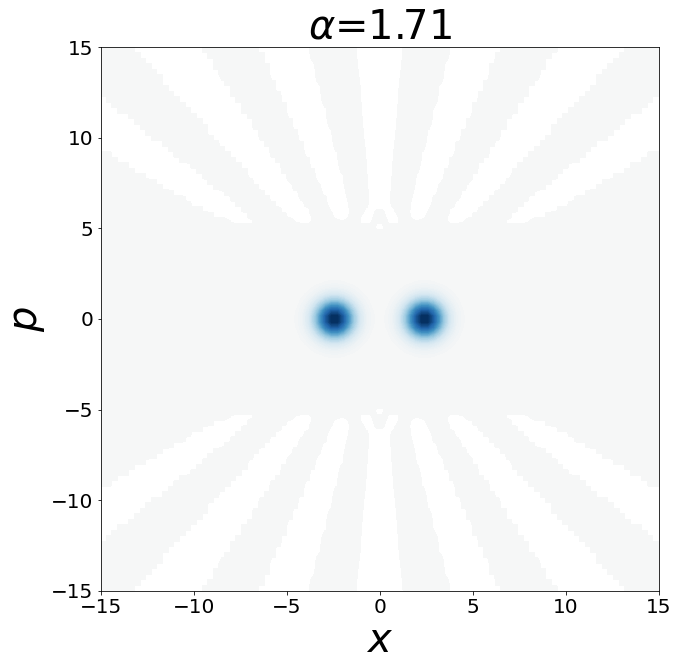

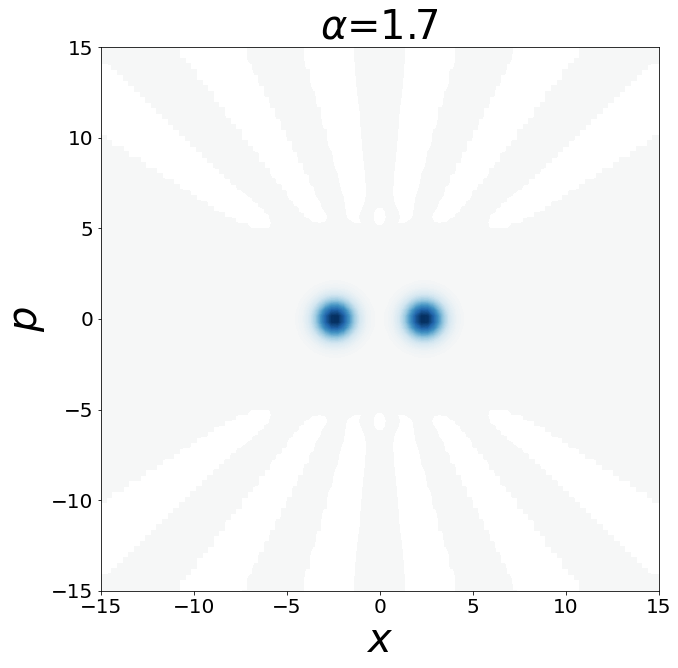

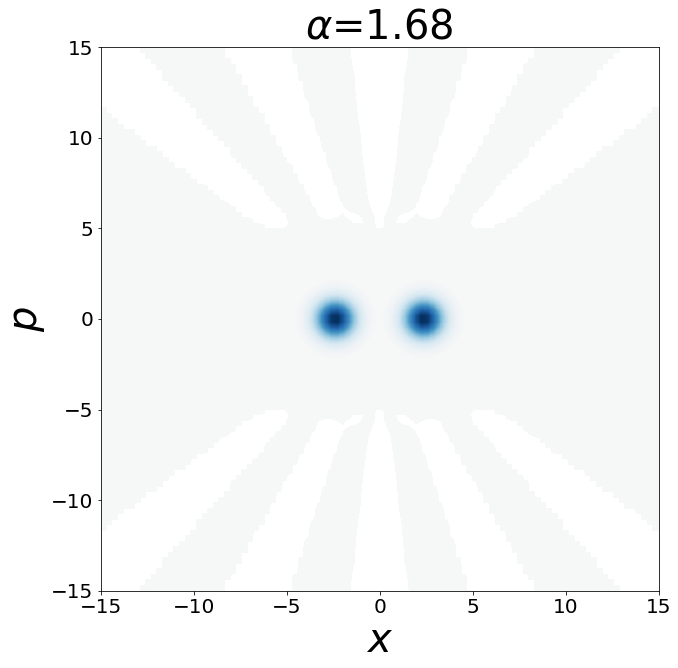

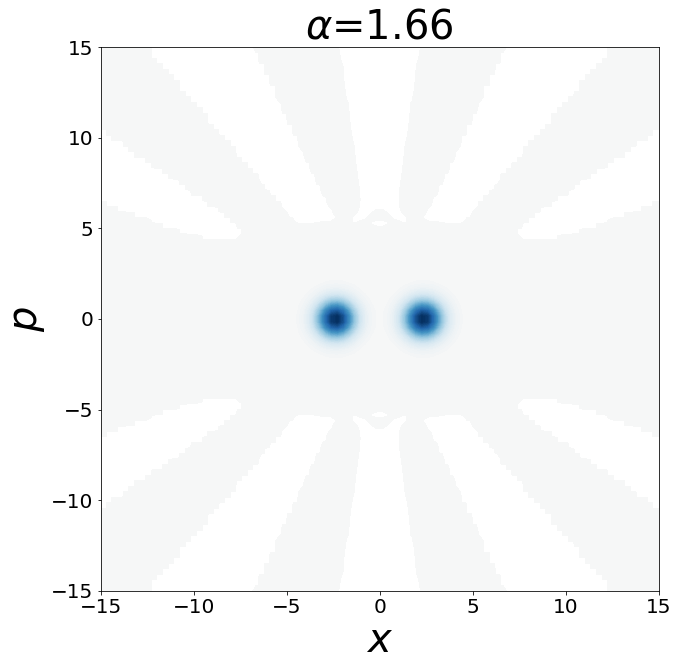

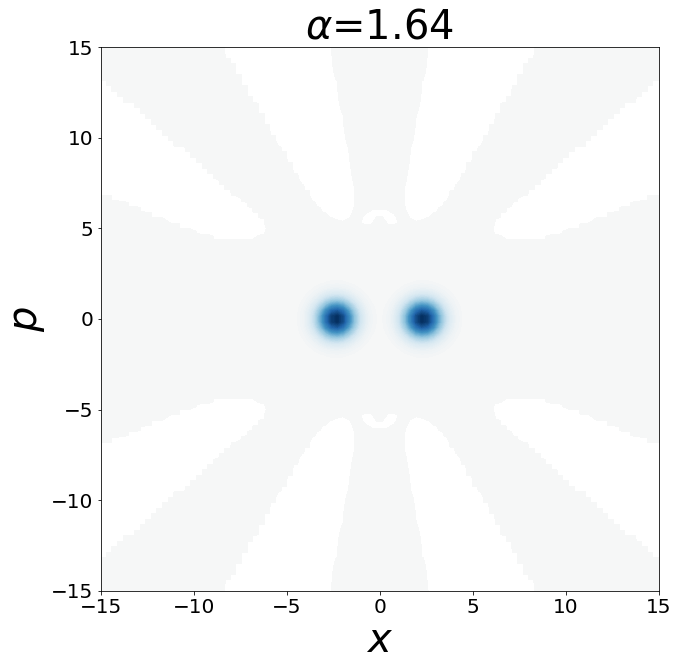

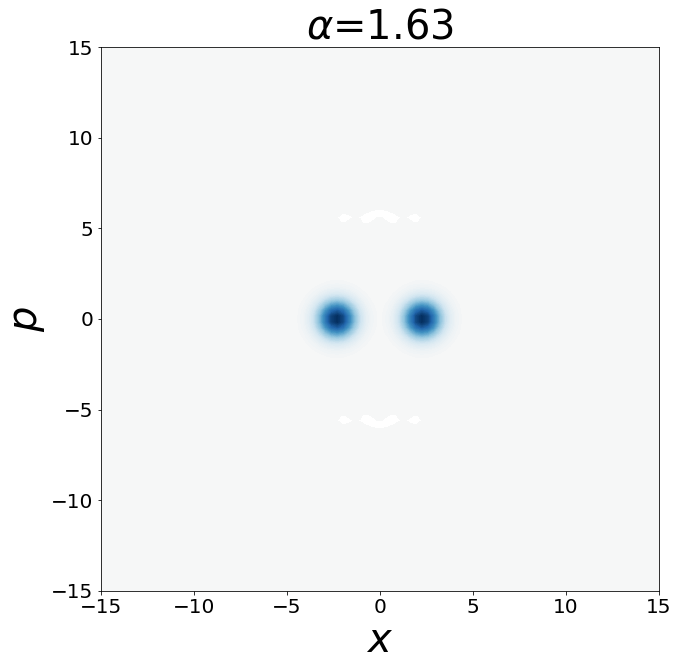

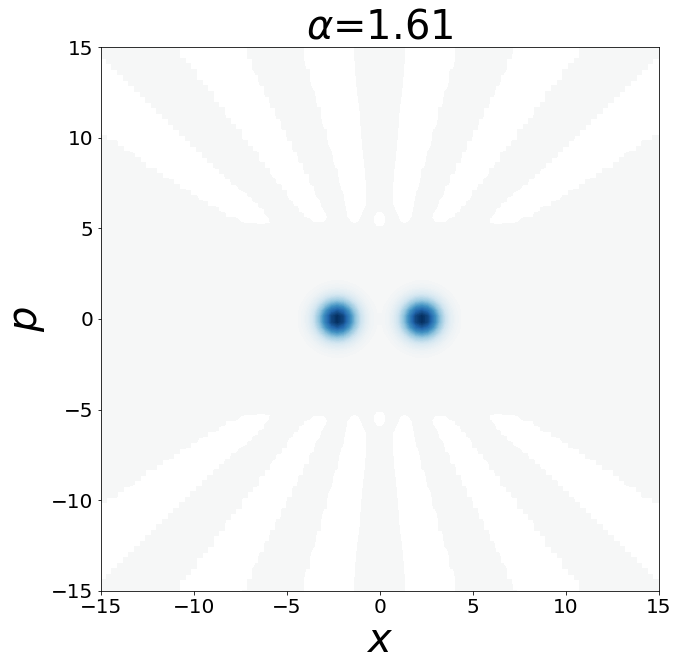

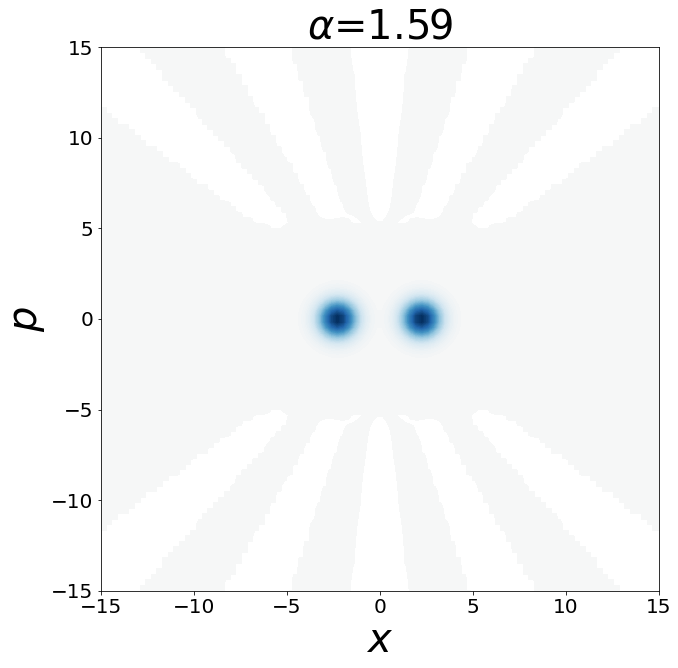

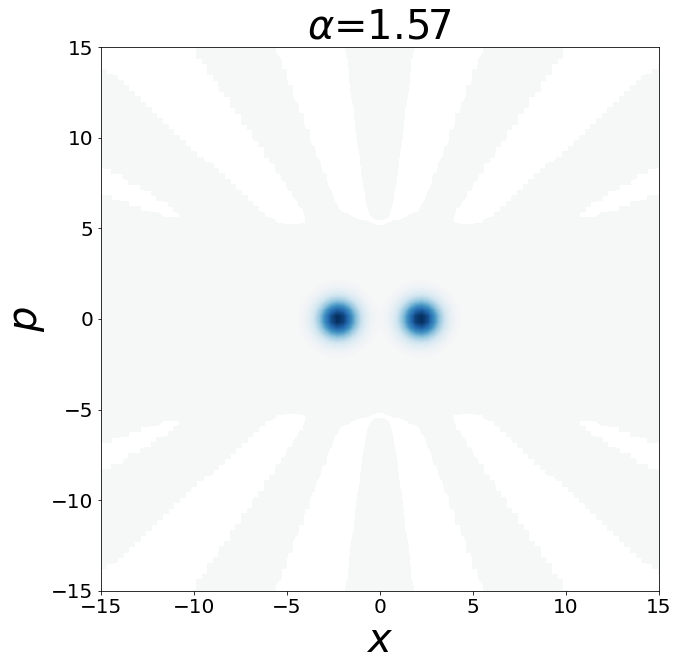

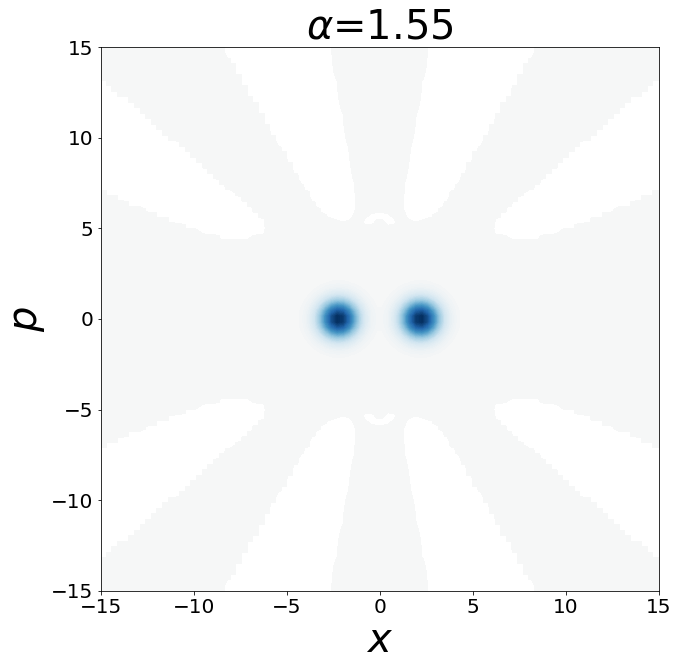

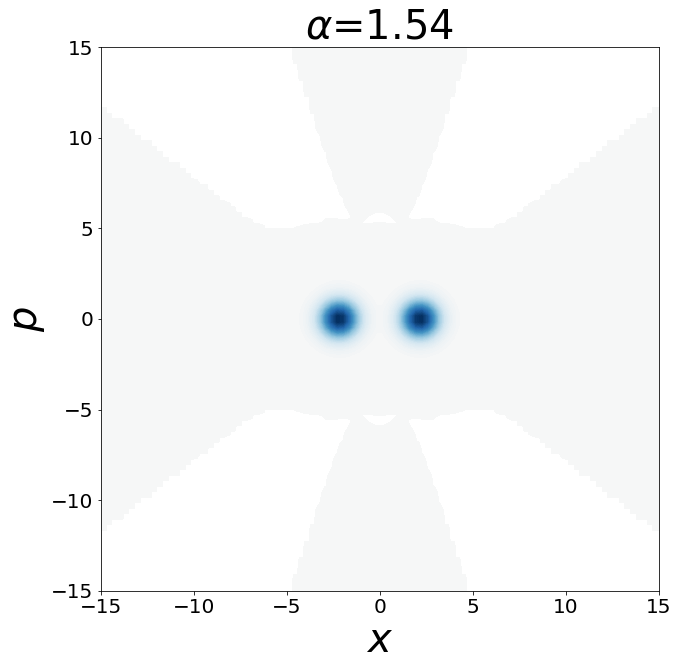

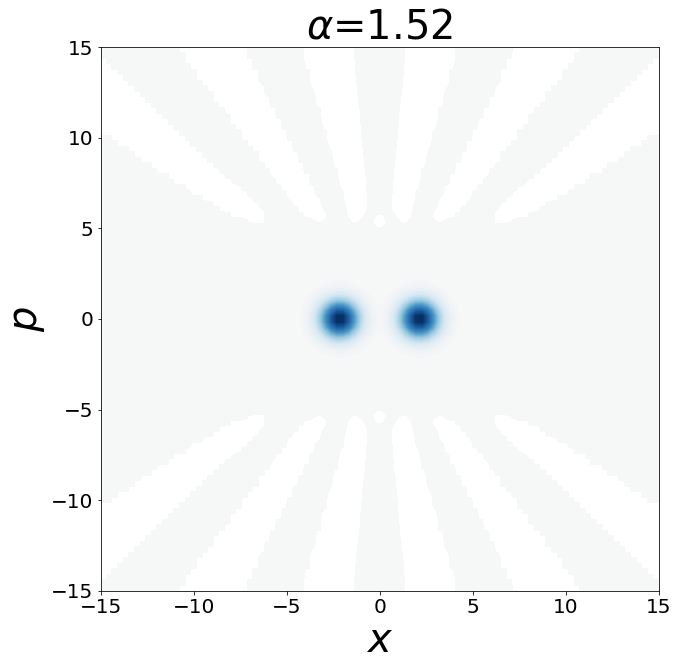

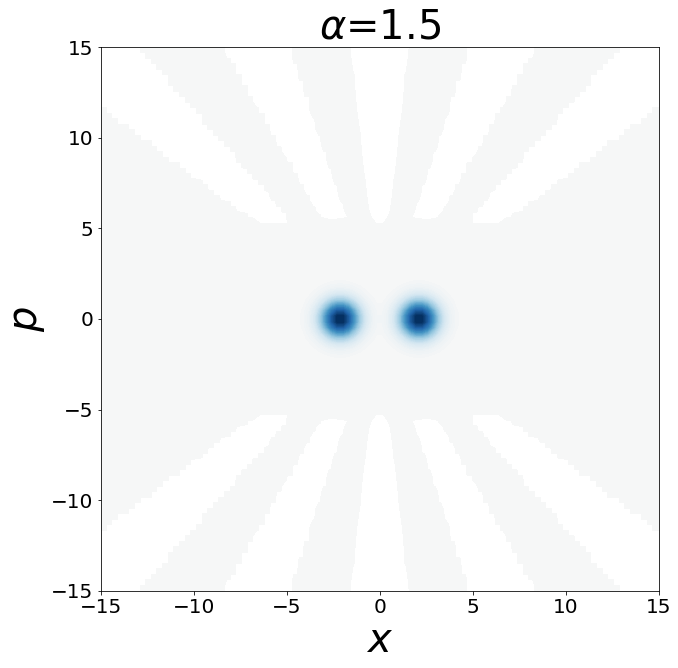

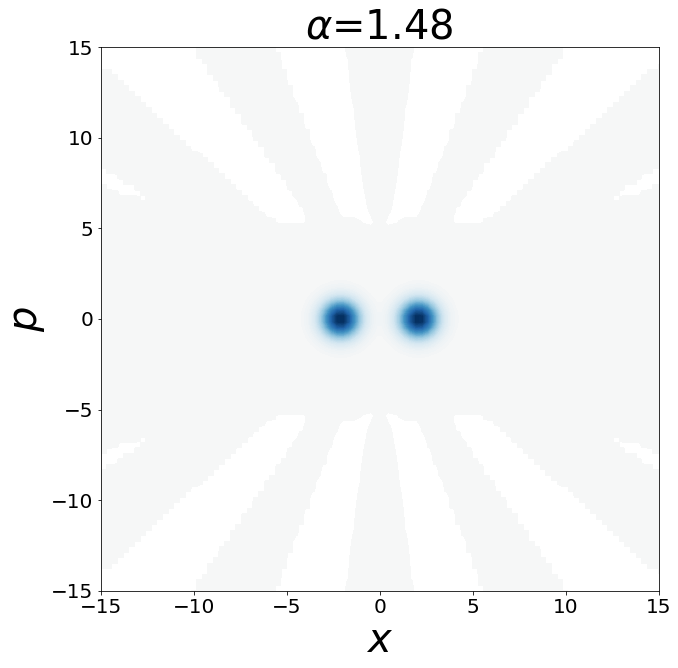

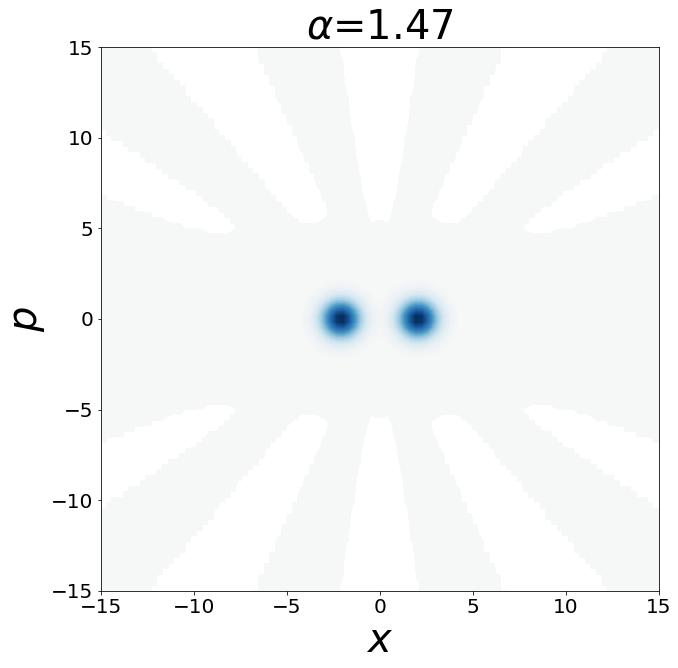

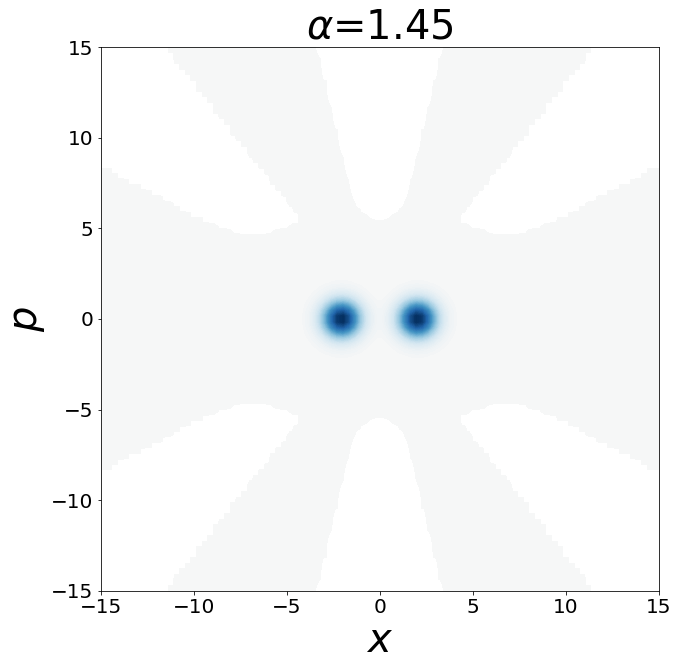

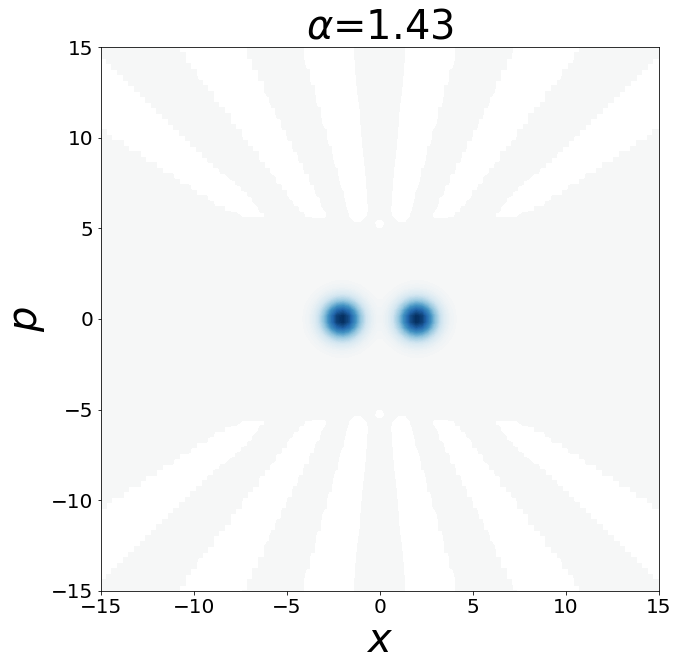

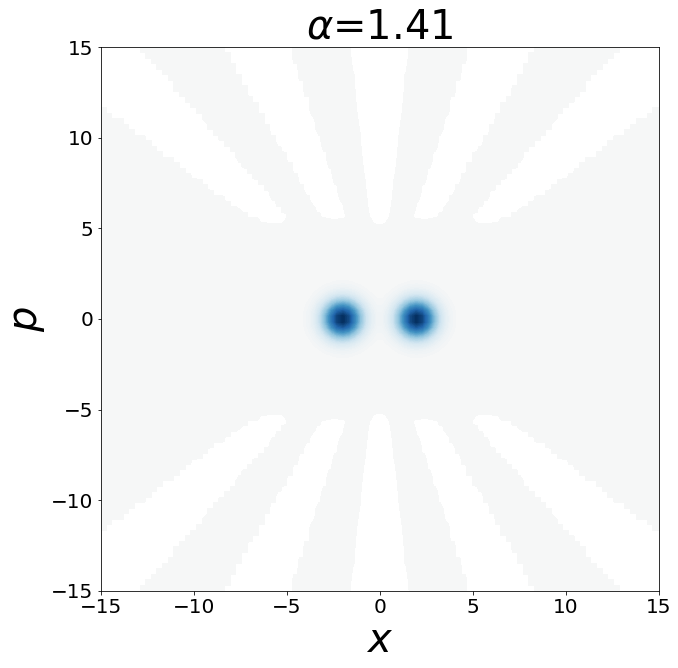

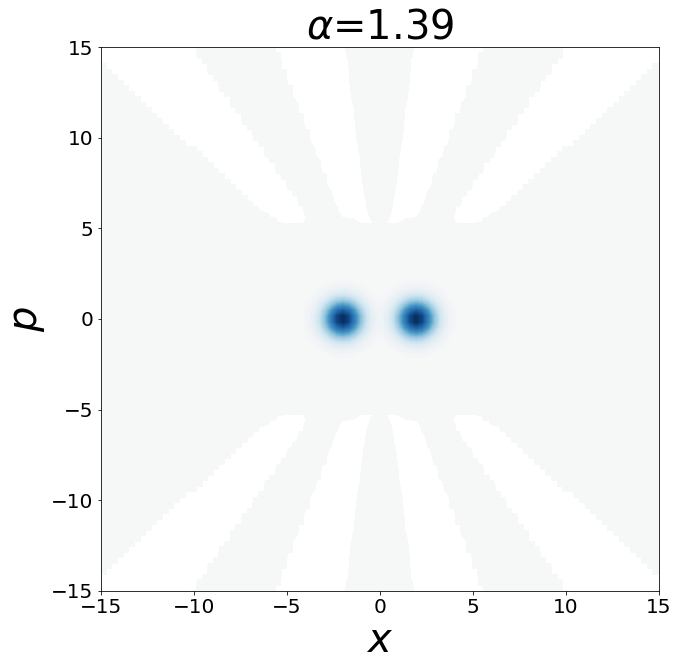

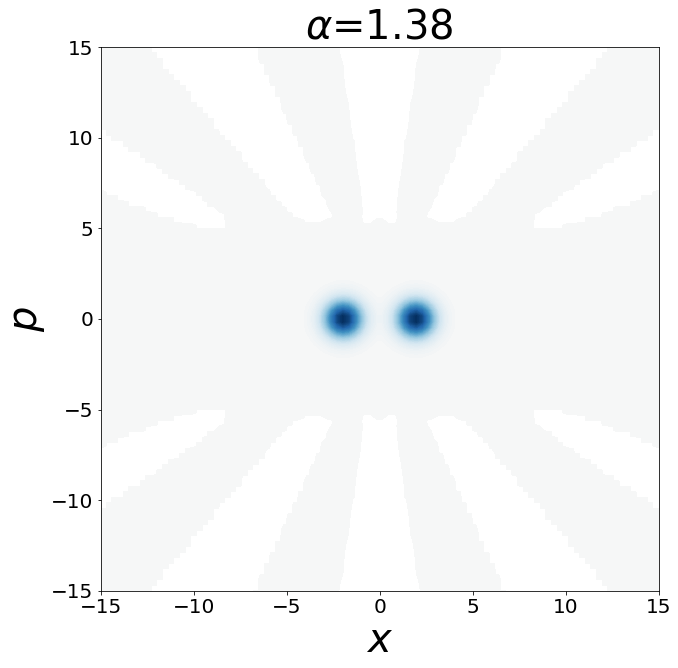

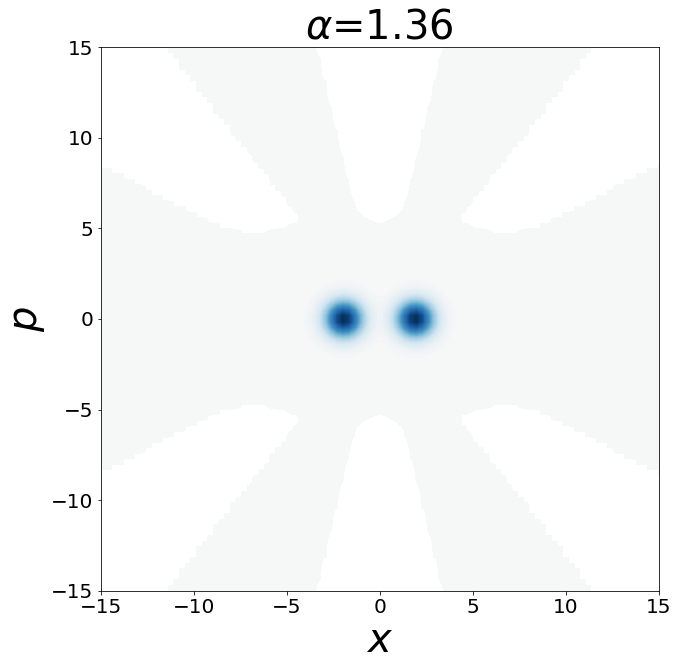

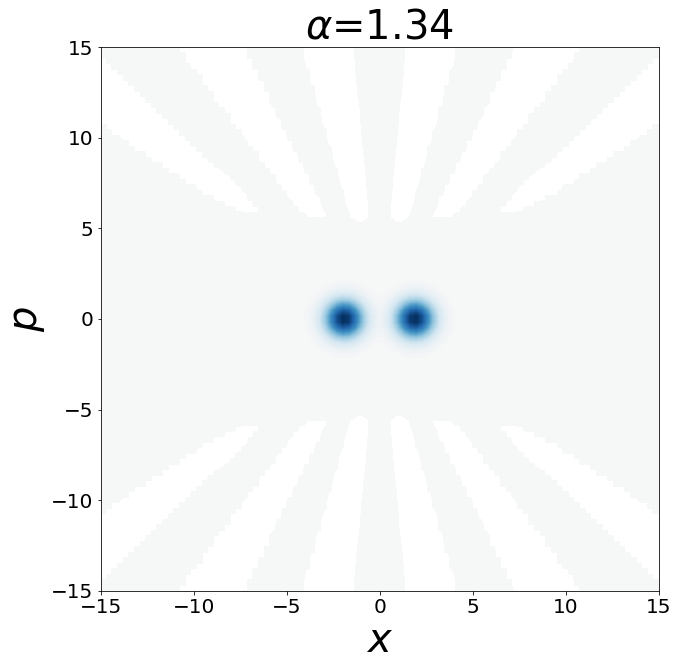

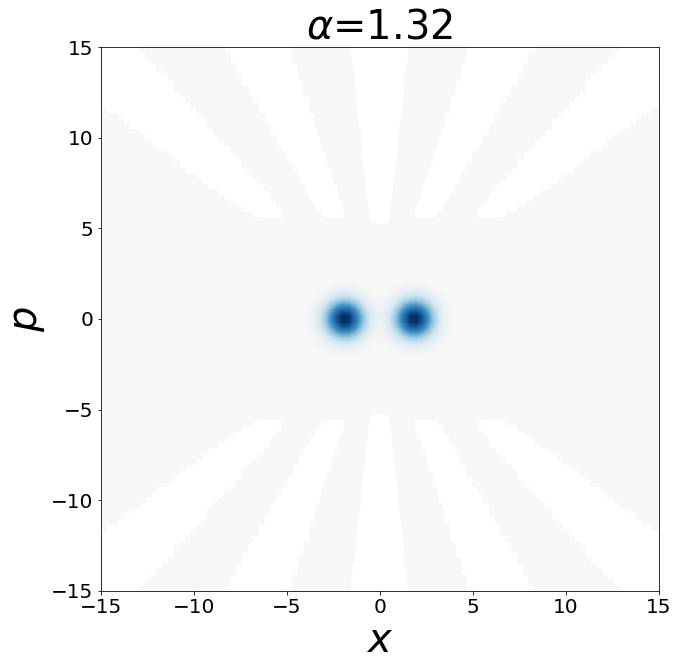

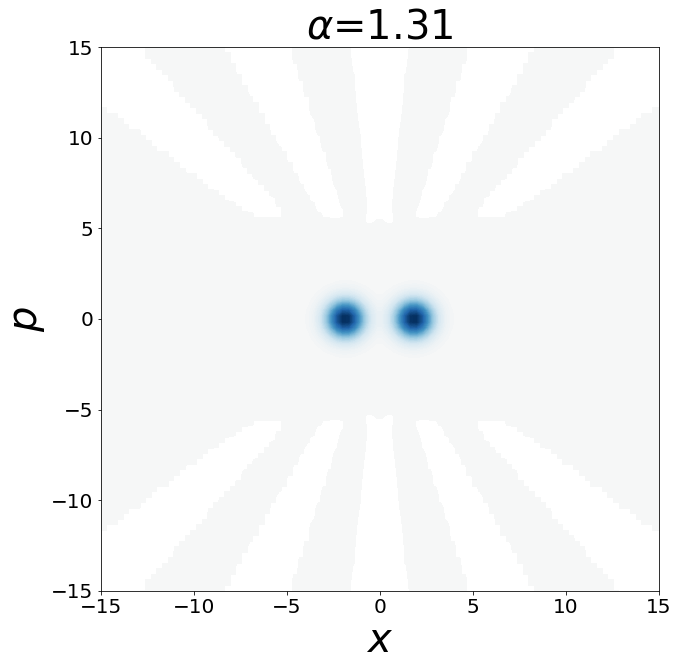

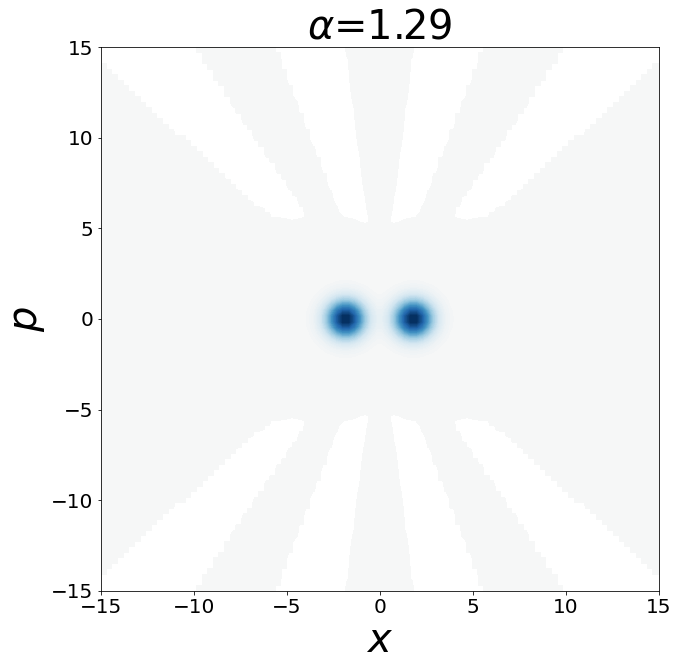

In [70]:
for ind,xcen in enumerate(tqdm(amps[::-1])):

    xvec = np.linspace(-15,15,100)
    at = 1e-2
    a = xcen/np.sqrt(2)
    N = 100
    rho1 = coherent_dm(N, a)
    rho2 = coherent_dm(N, -a)

    rho1at = coherent_dm(N, np.sqrt(at)*a)
    rho2at = coherent_dm(N, -np.sqrt(at)*a)

    rhoin = (rho1+rho2)/2
    rhoout = (rho1 + rho2 + rho2at + rho1at)/4
    wigner_in = wigner(rhoin,xvec,xvec)
    wigner_out = wigner(rhoout, xvec, xvec)



    fig=plt.figure(figsize=(10,10))
    ax1 = plt.subplot2grid((1,1),(0,0))

    ls=40
    im1 = ax1.contourf(xvec, xvec, wigner_in, 100, cmap=cm.RdBu, norm= mpl.colors.Normalize(-wigner_in.max(), wigner_in.max()))
    #fig.colorbar(im1,fraction=0.046, pad=0.04)

    for ax in [ax1]:
        Lx=15
        Ly=15
        ax.set_xlim([-Lx,Lx])
        ax.set_ylim([-Ly,Ly])
        st=5
        ax.set_xticks(np.arange(-15,15+st,st))
        ax.set_yticks(np.arange(-15,15+st,st))    
        ax.set_xlabel(r'$x$',size=ls)
        ax.set_ylabel(r'$p$',size=ls)    
        ax.tick_params(axis='both', which='major', labelsize=20)
        ax.set_title(r'$\alpha$'+"="+str(np.round(a,2)),size=ls)
    plt.savefig("wignerGIF/{}.png".format(ind))

In [79]:
with open("wignerGIF/ordershort.txt","w") as f:
    for ind,k in enumerate(amps[::-1]):
       f.write("{}.png\n".format(ind))
    f.close()

20it [00:38,  2.07s/it]/home/cooper-cooper/.local/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
97it [03:43,  2.30s/it]


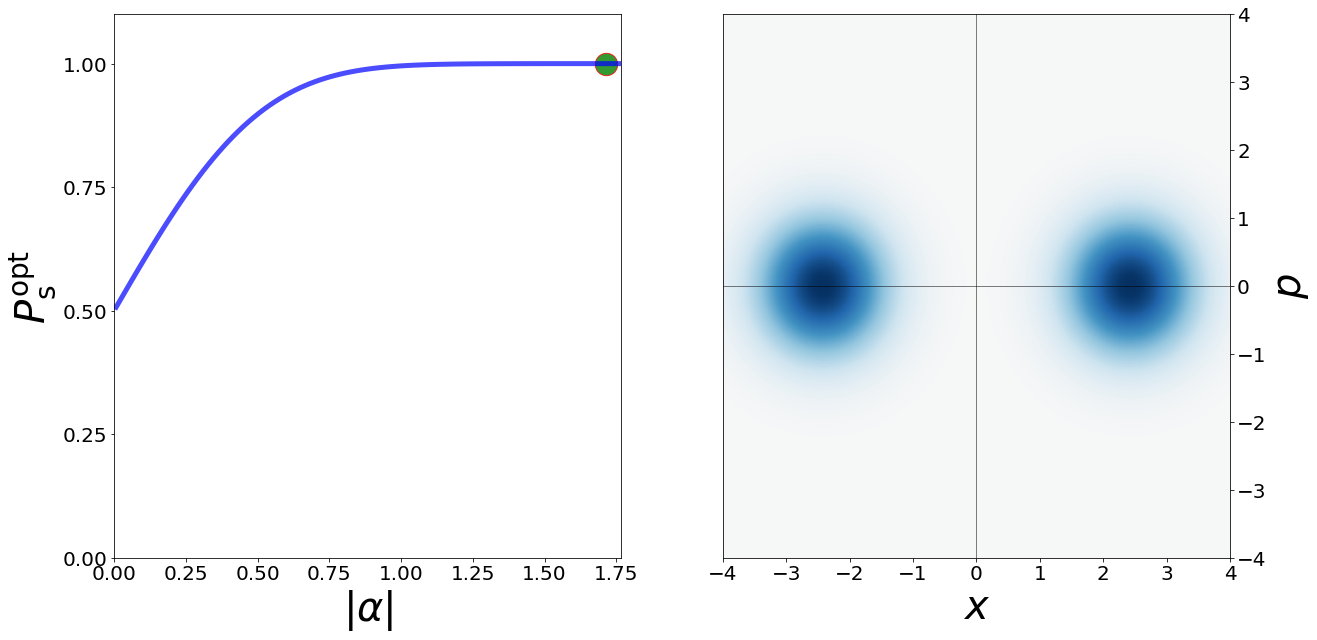

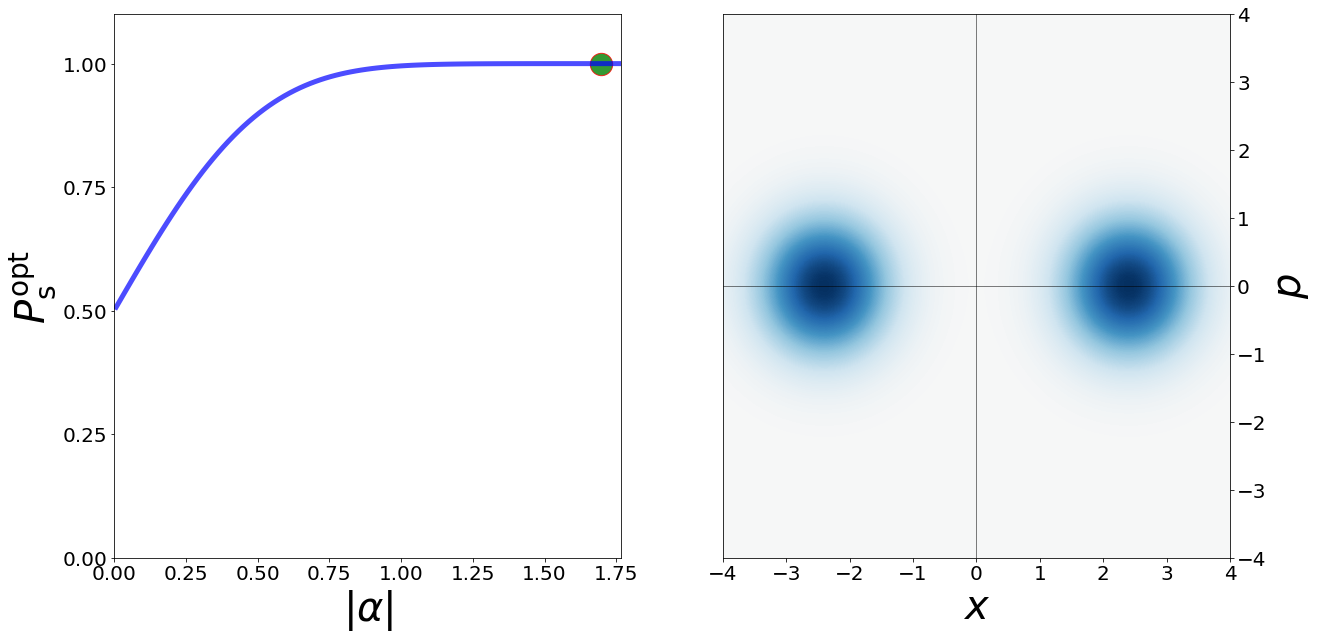

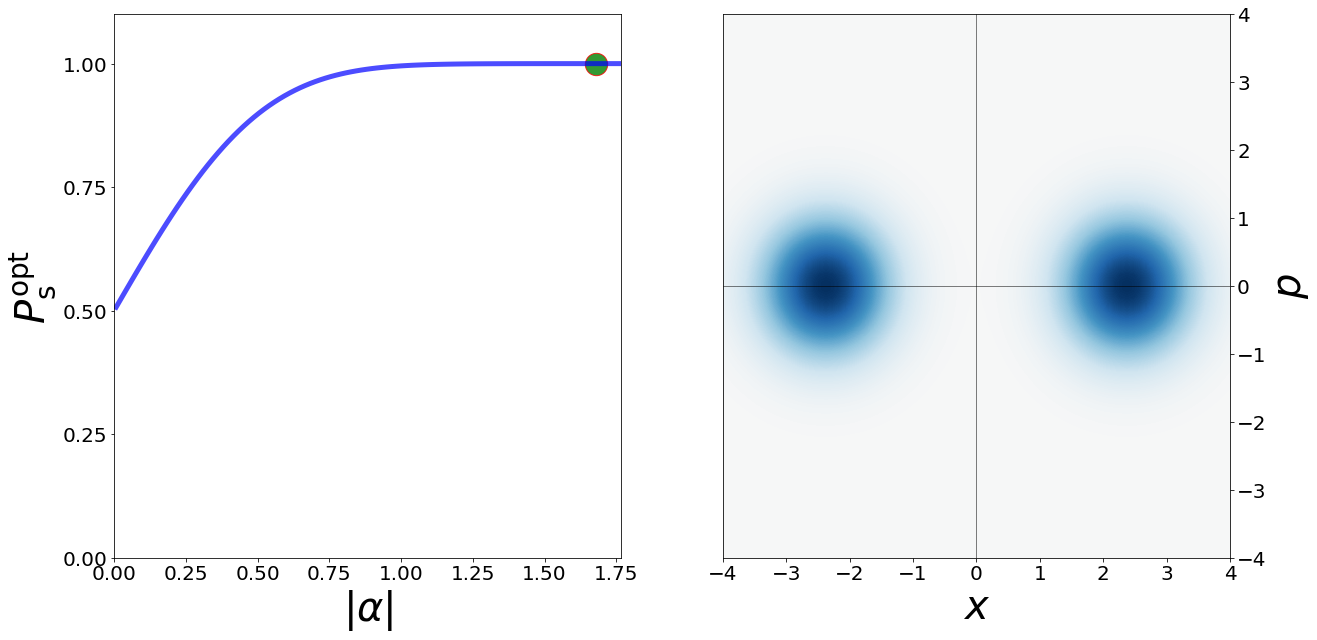

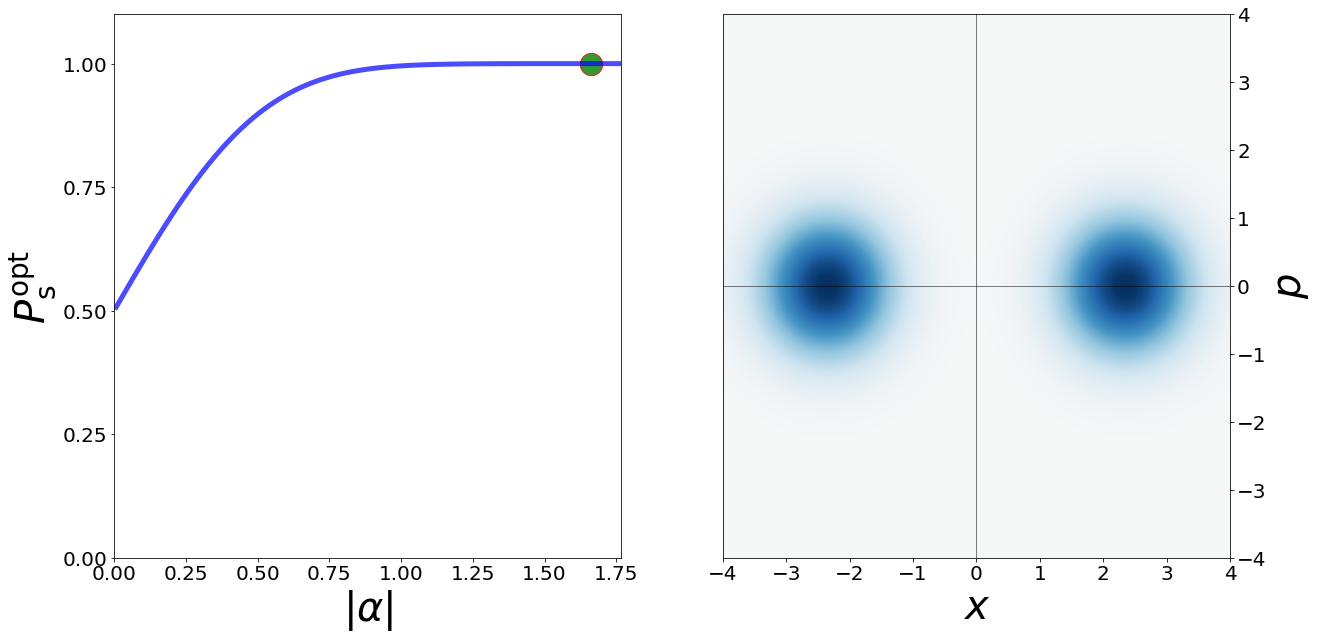

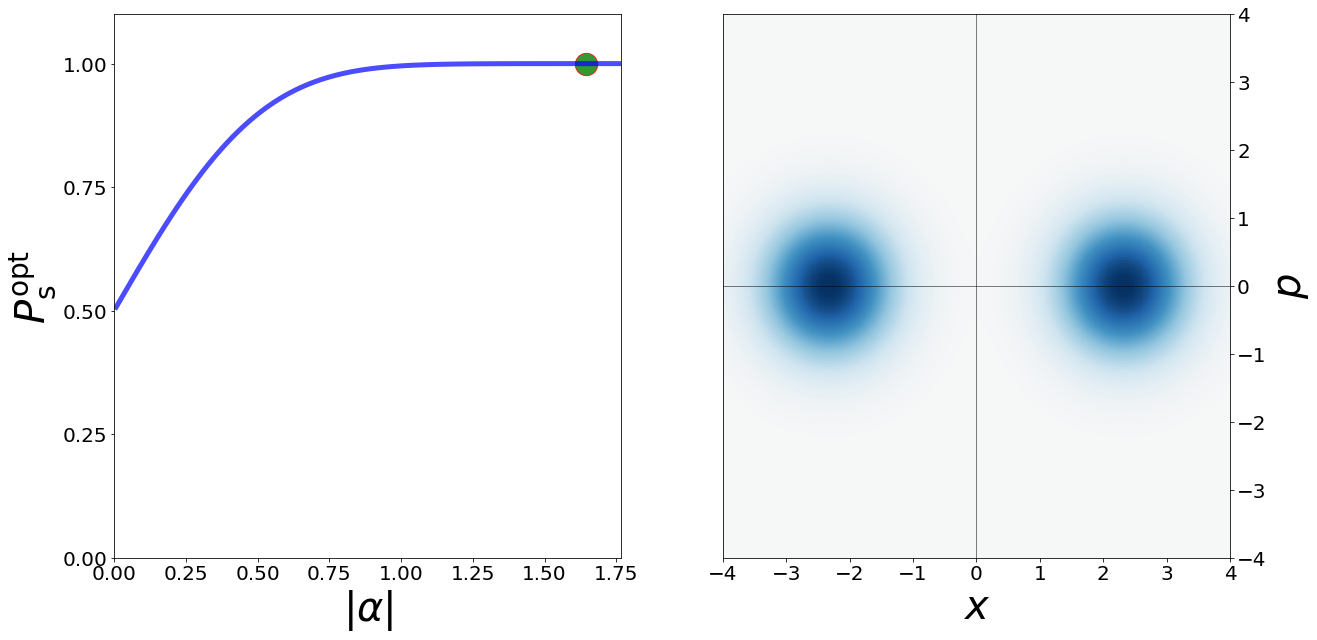

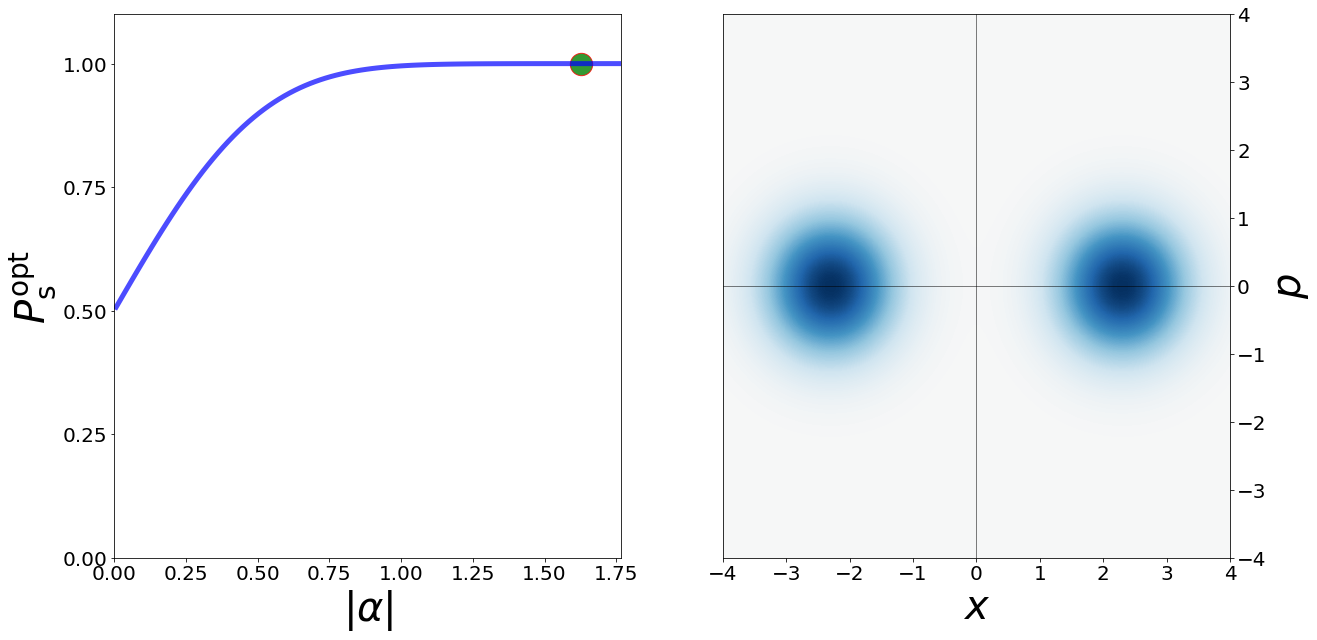

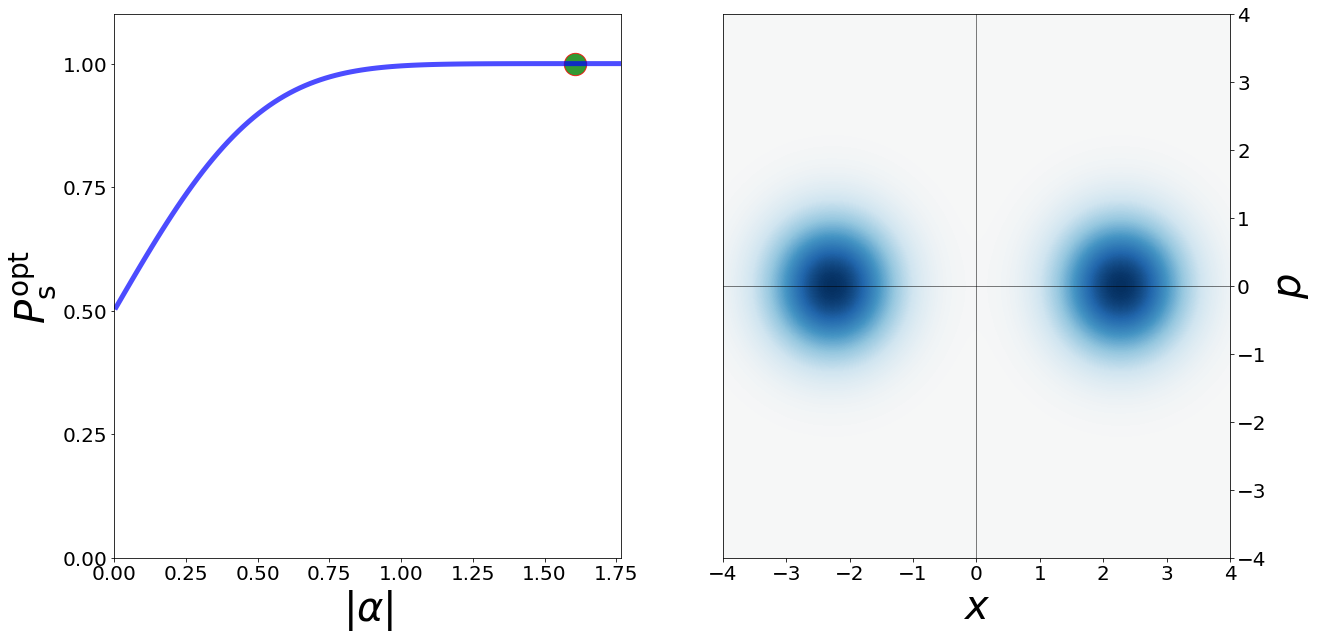

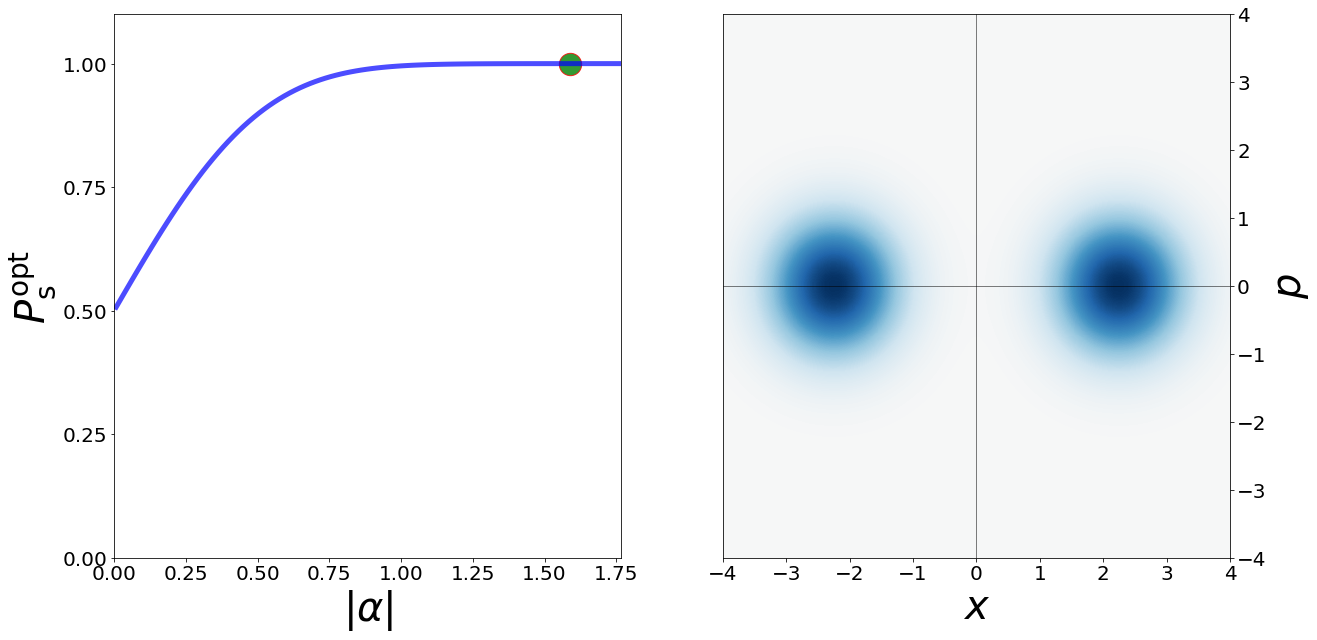

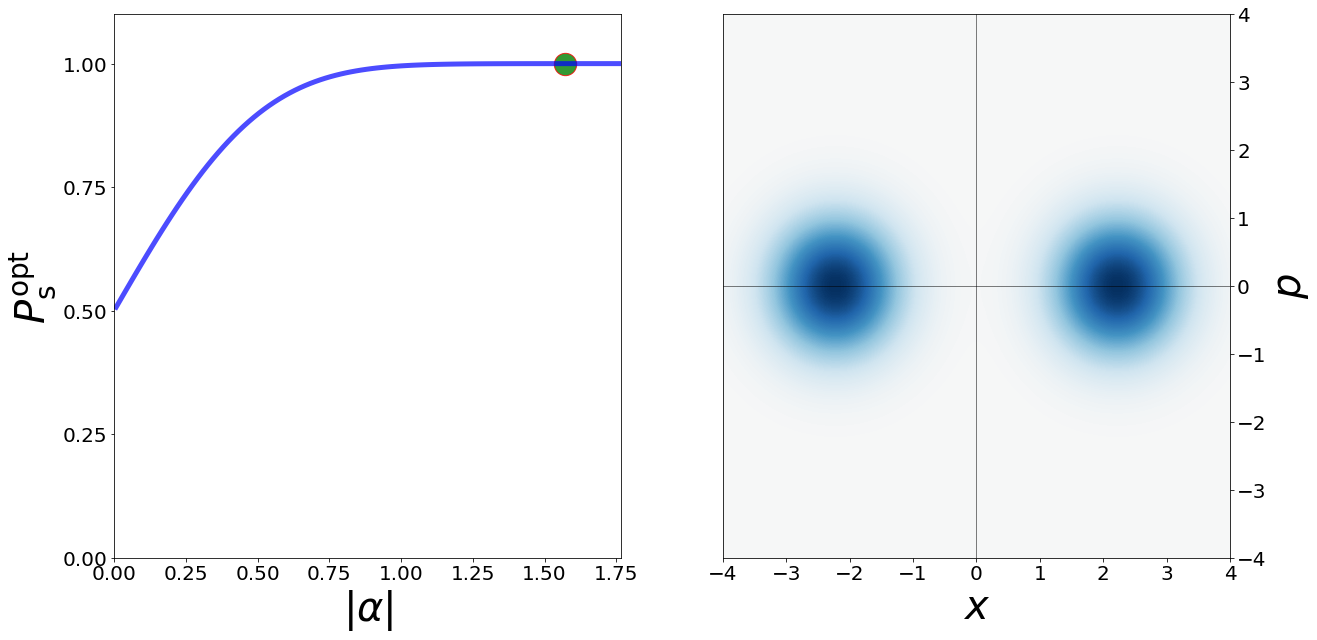

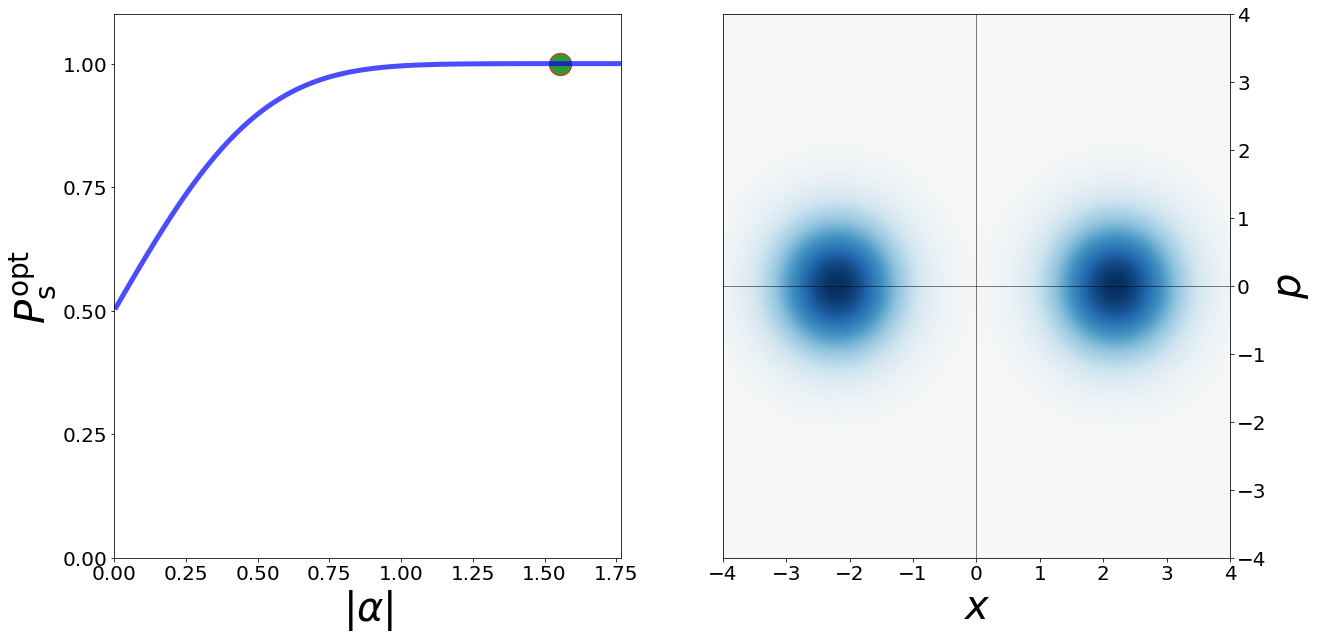

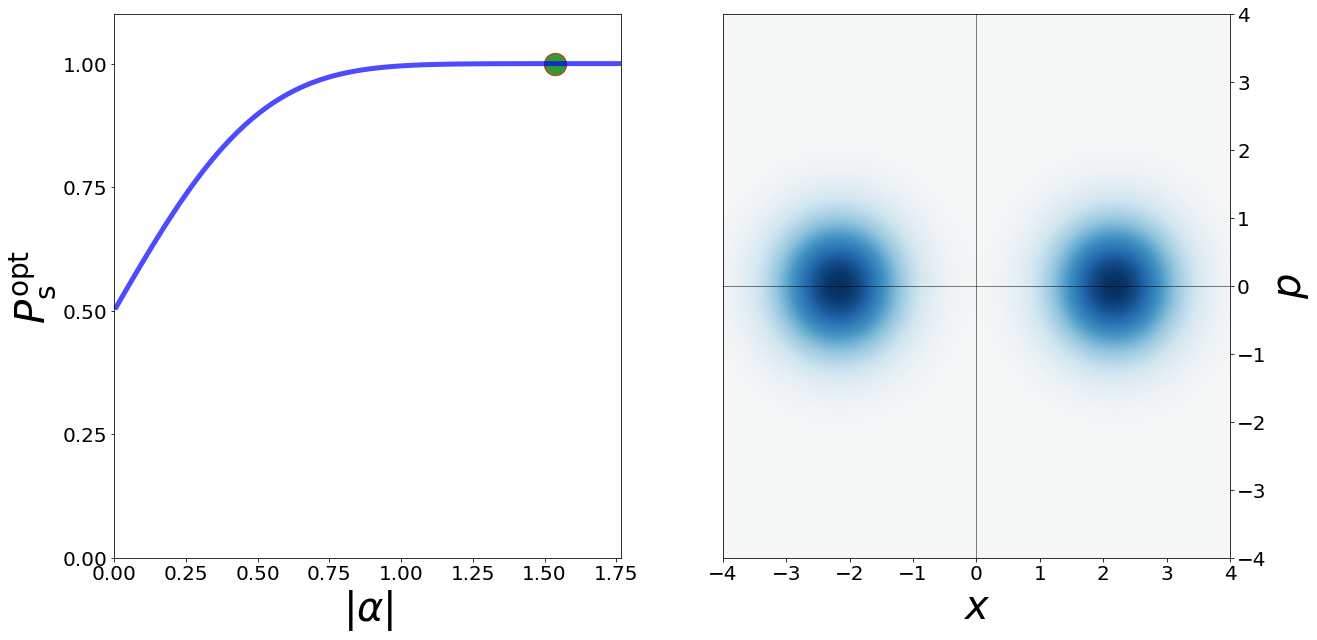

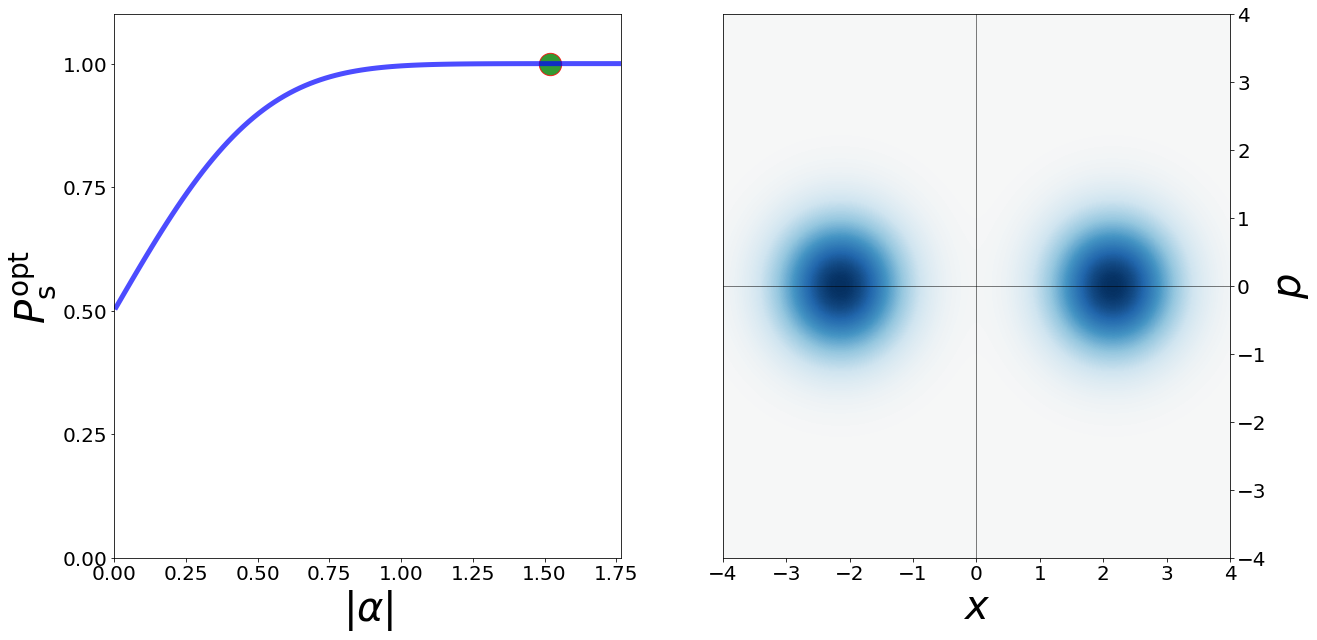

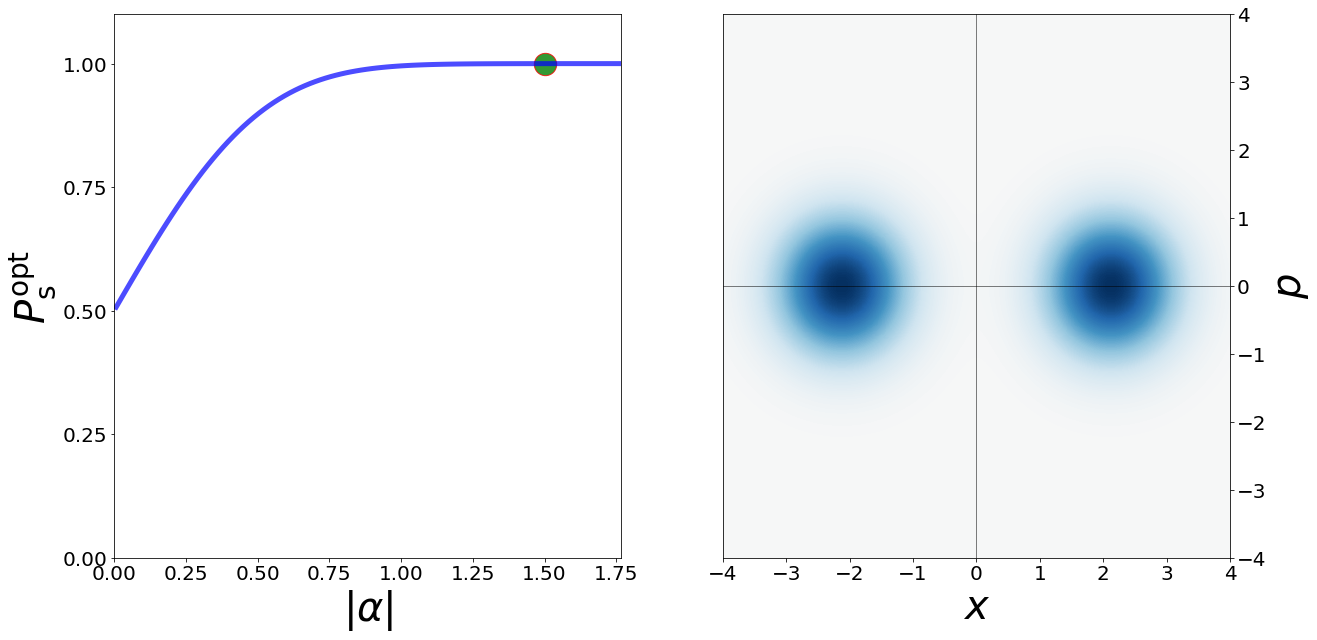

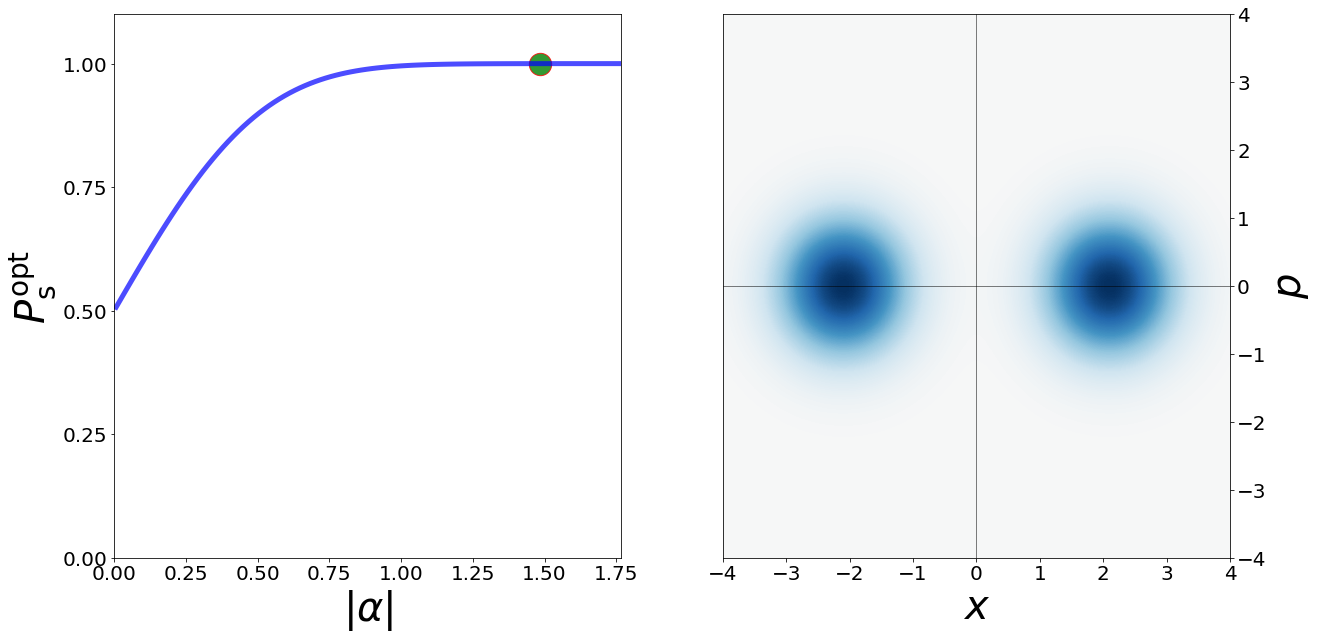

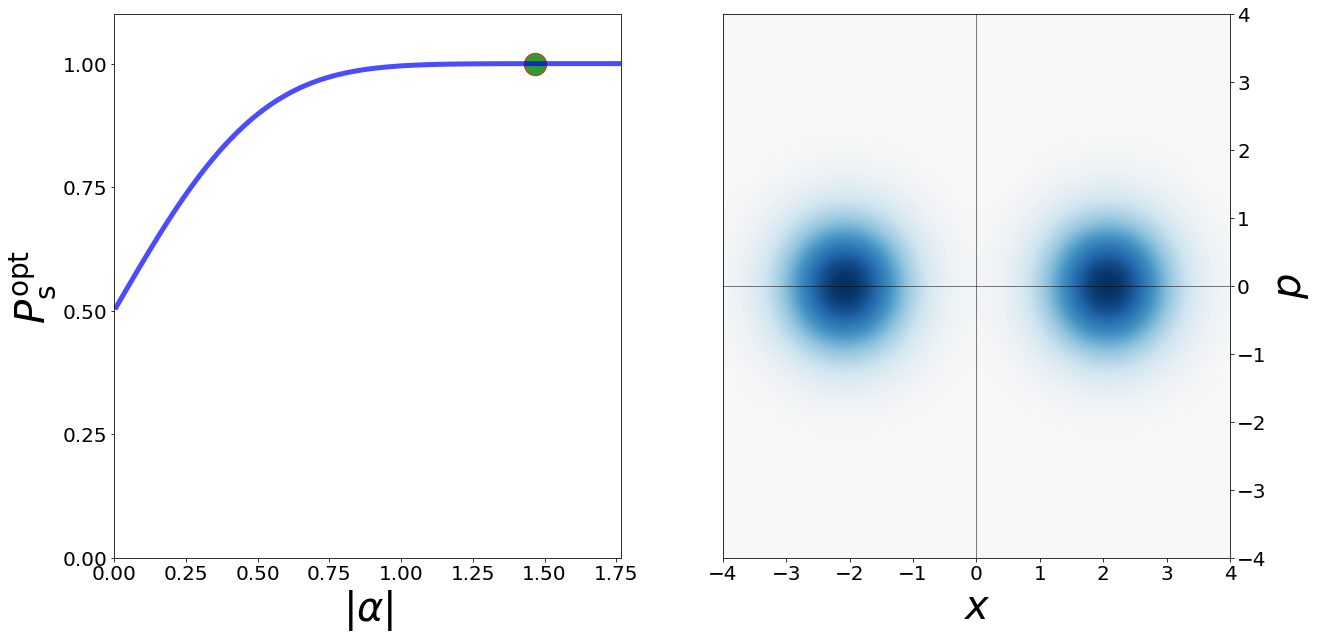

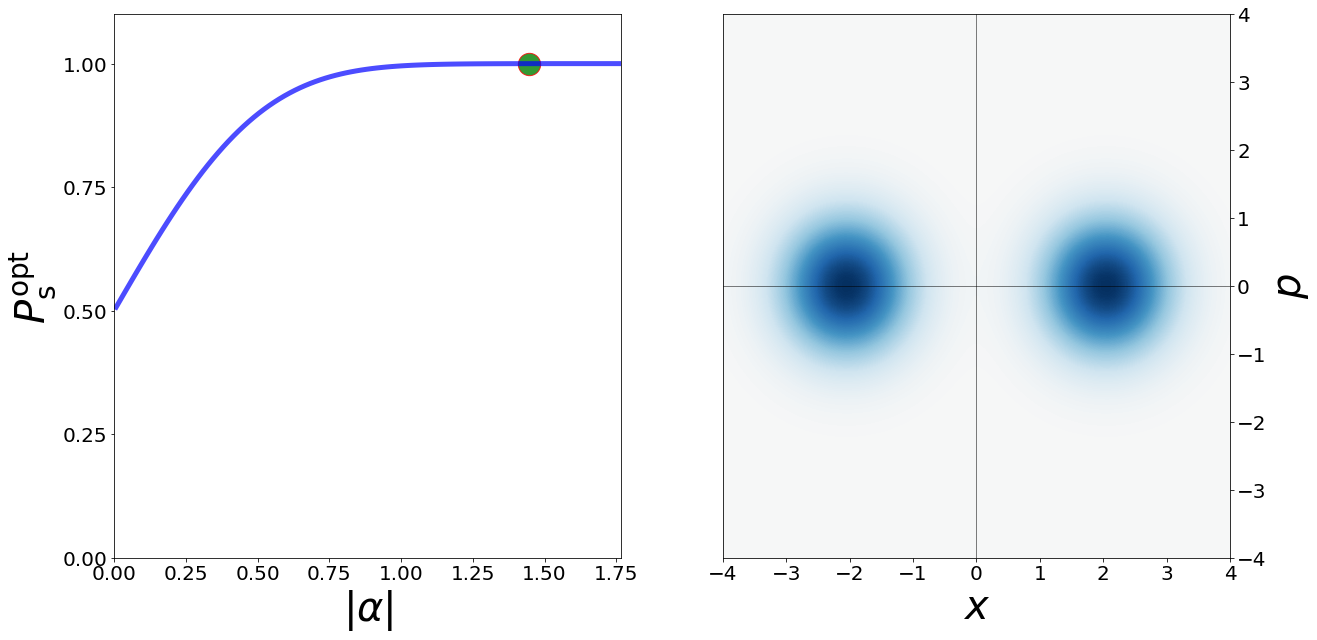

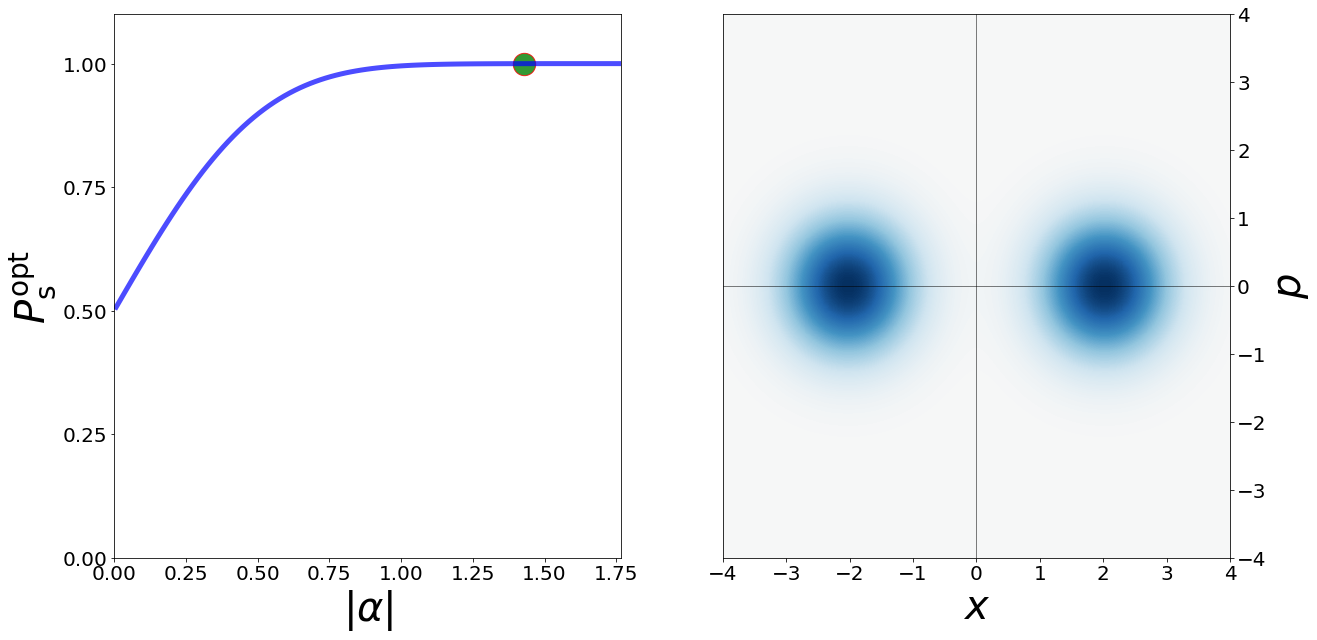

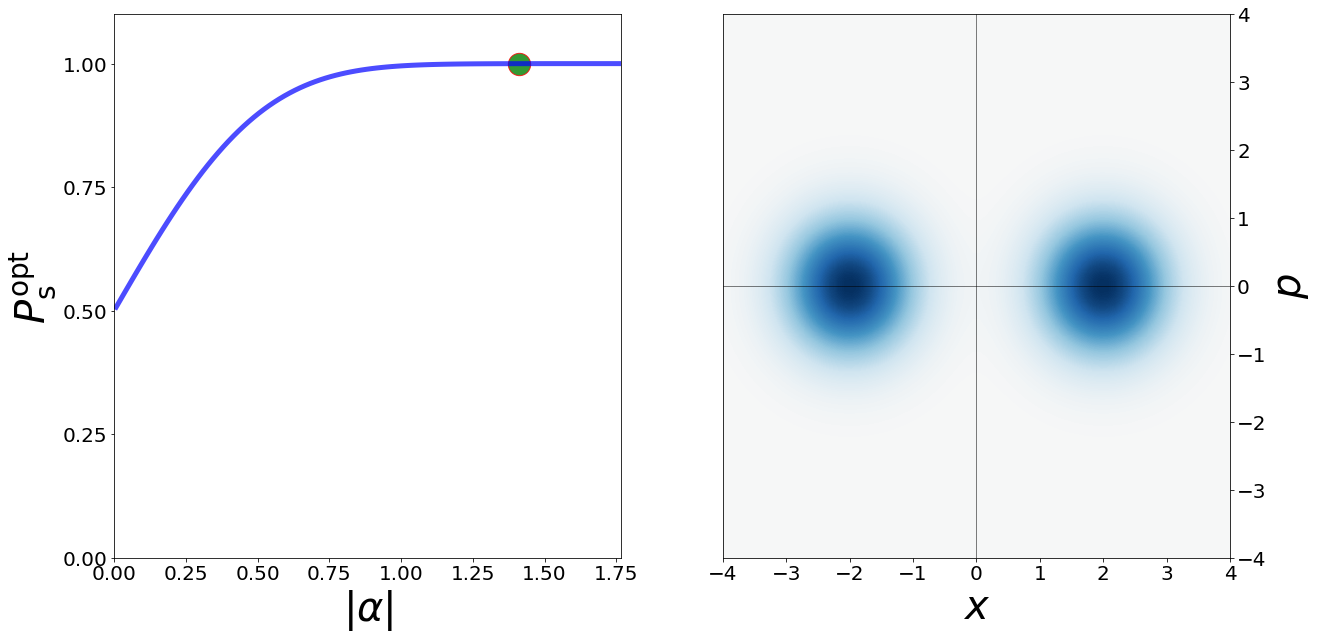

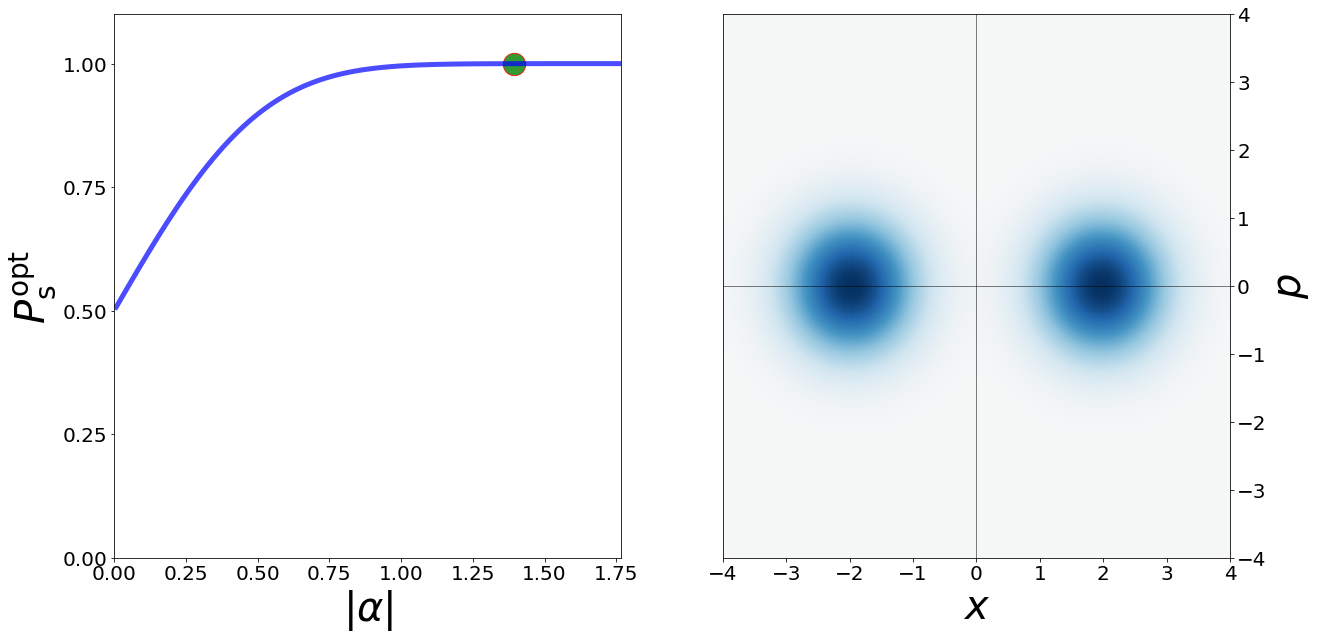

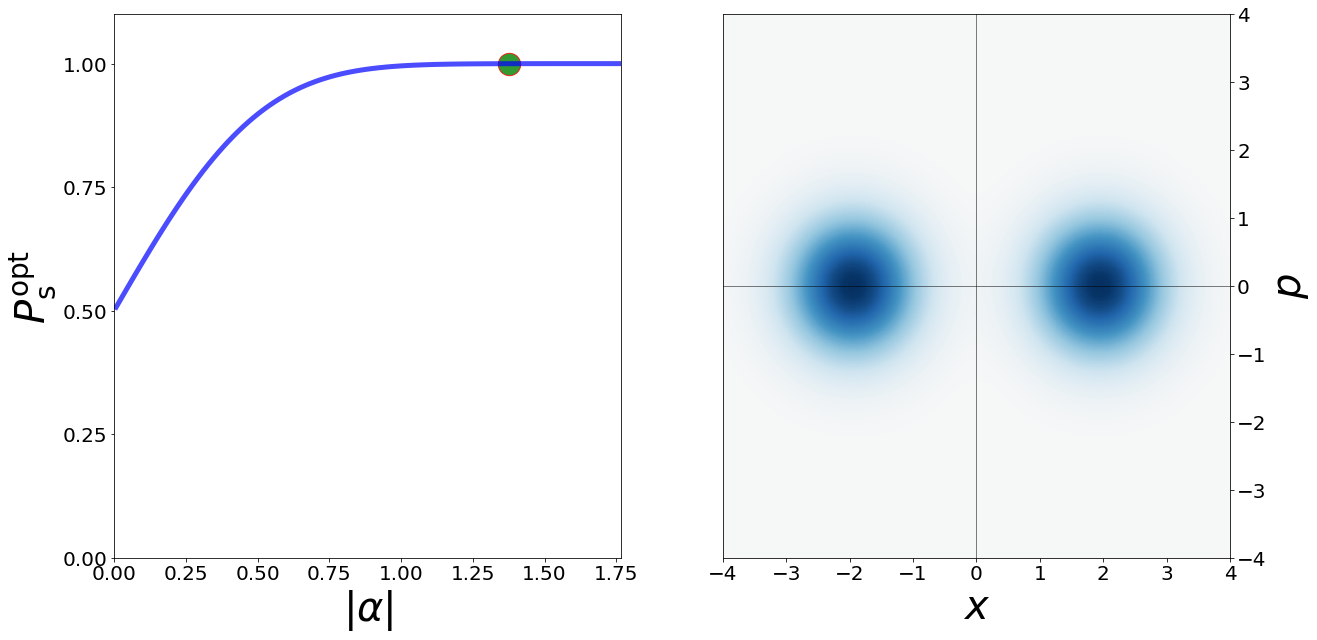

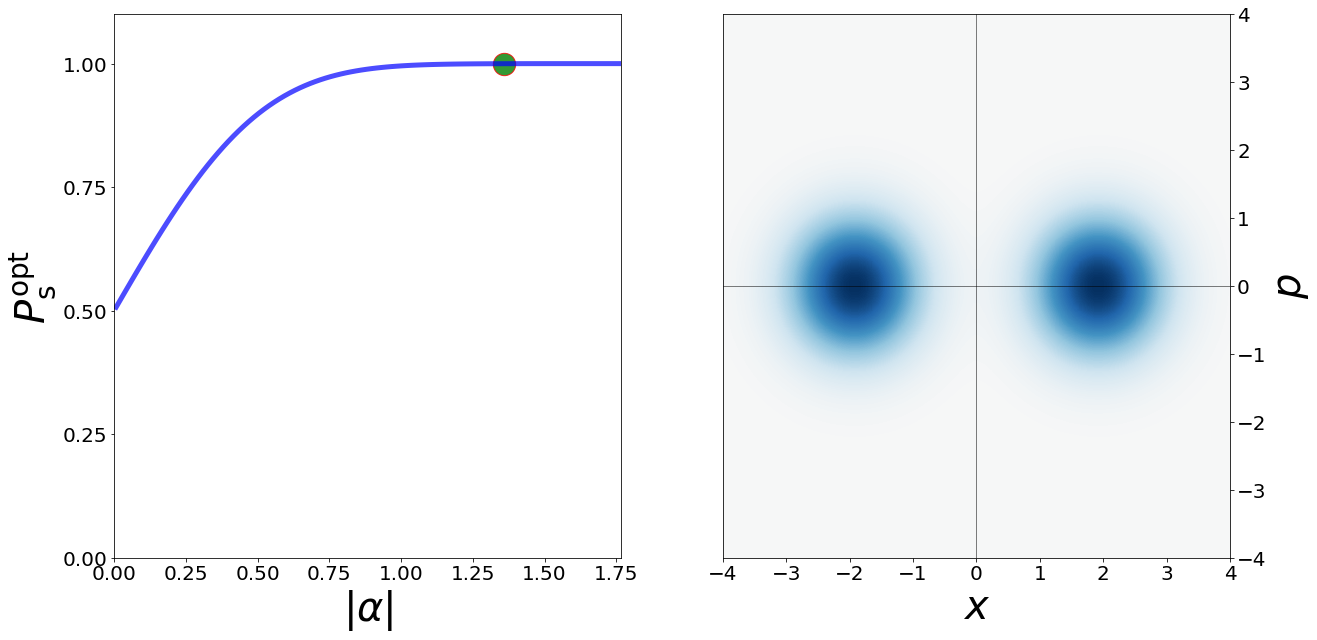

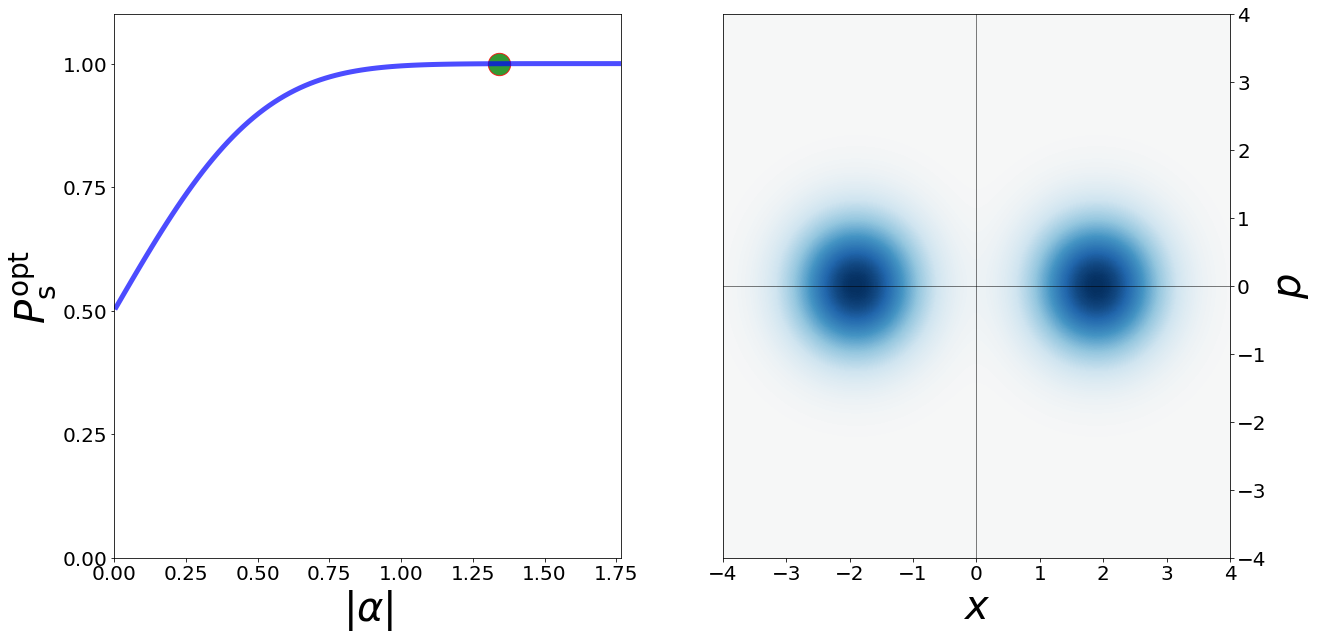

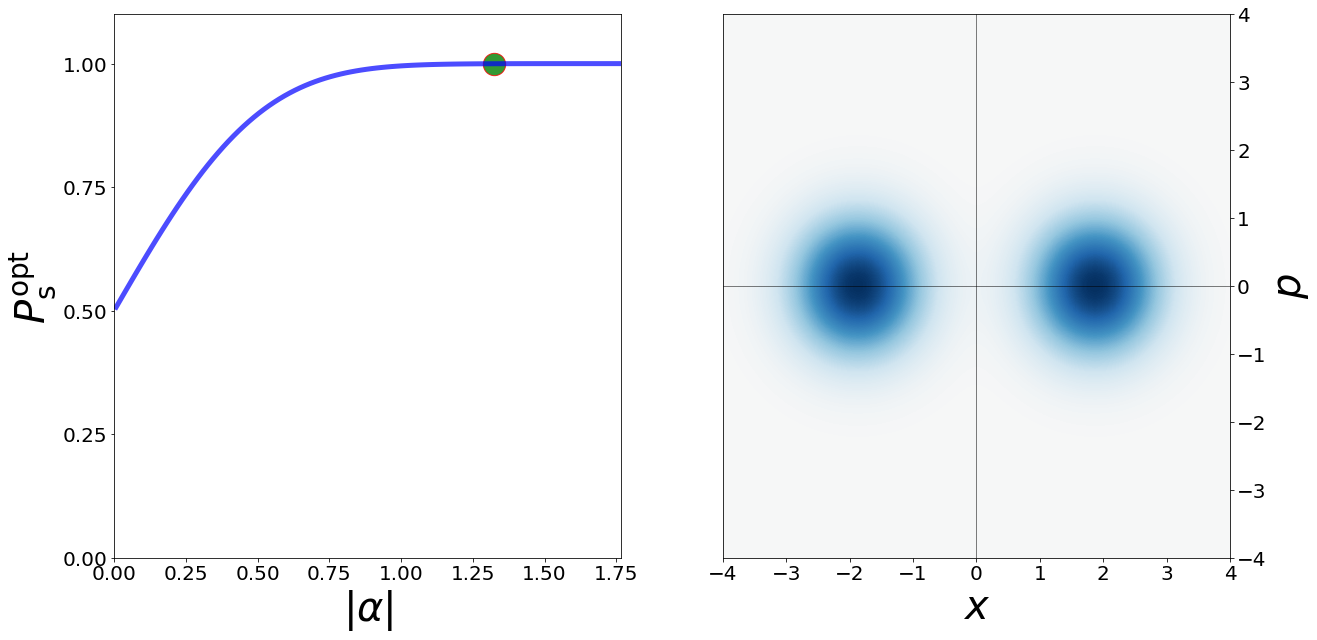

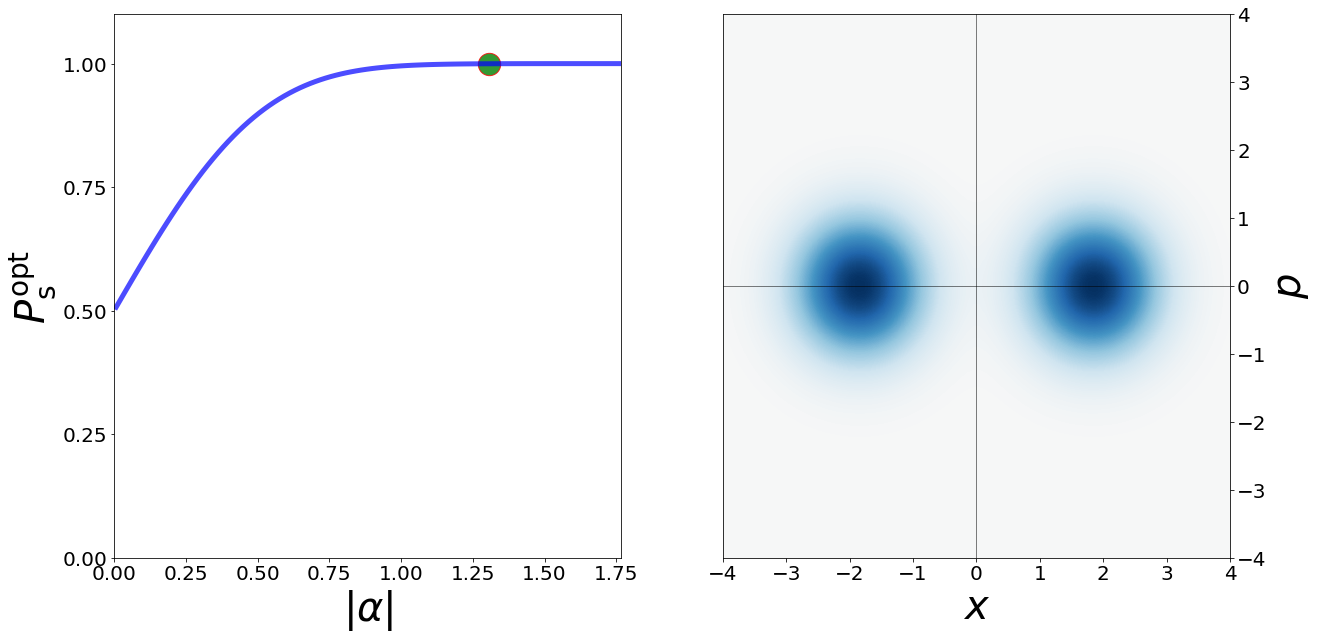

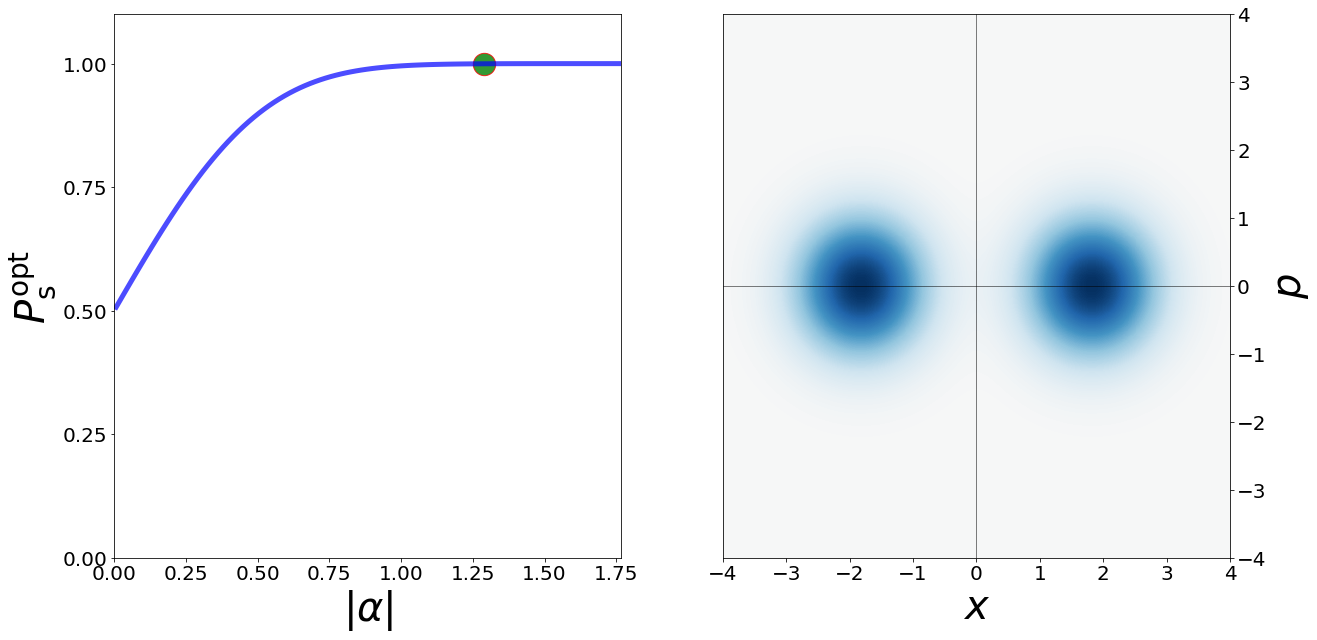

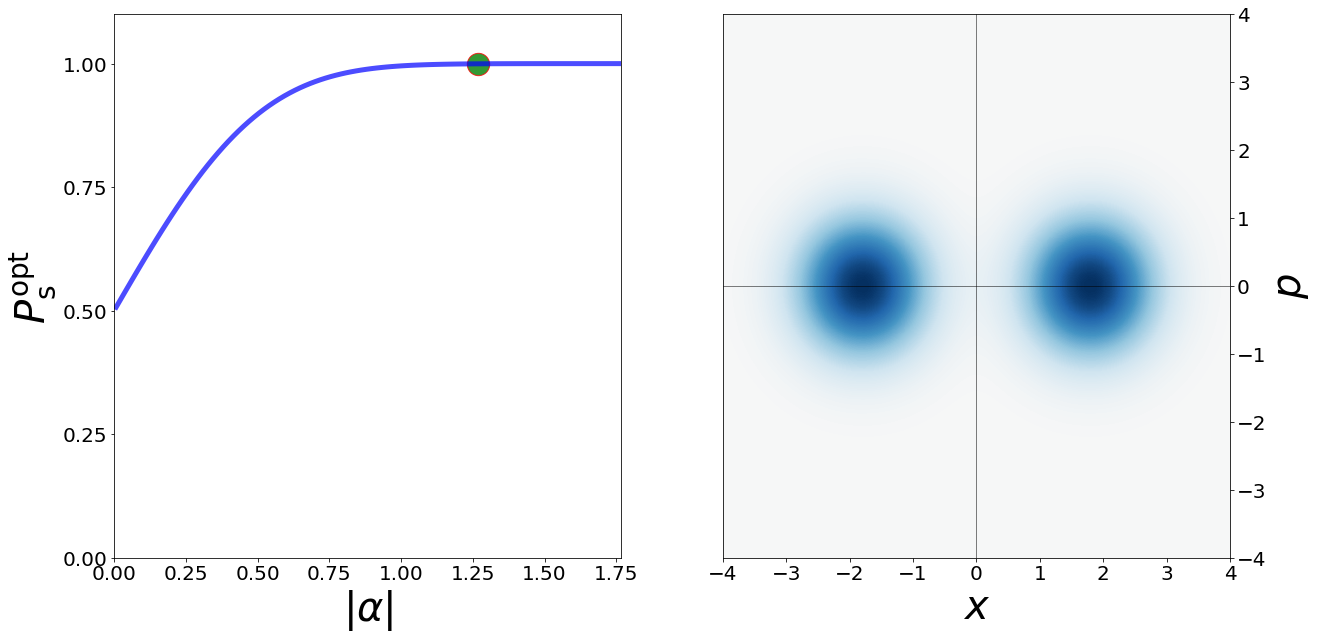

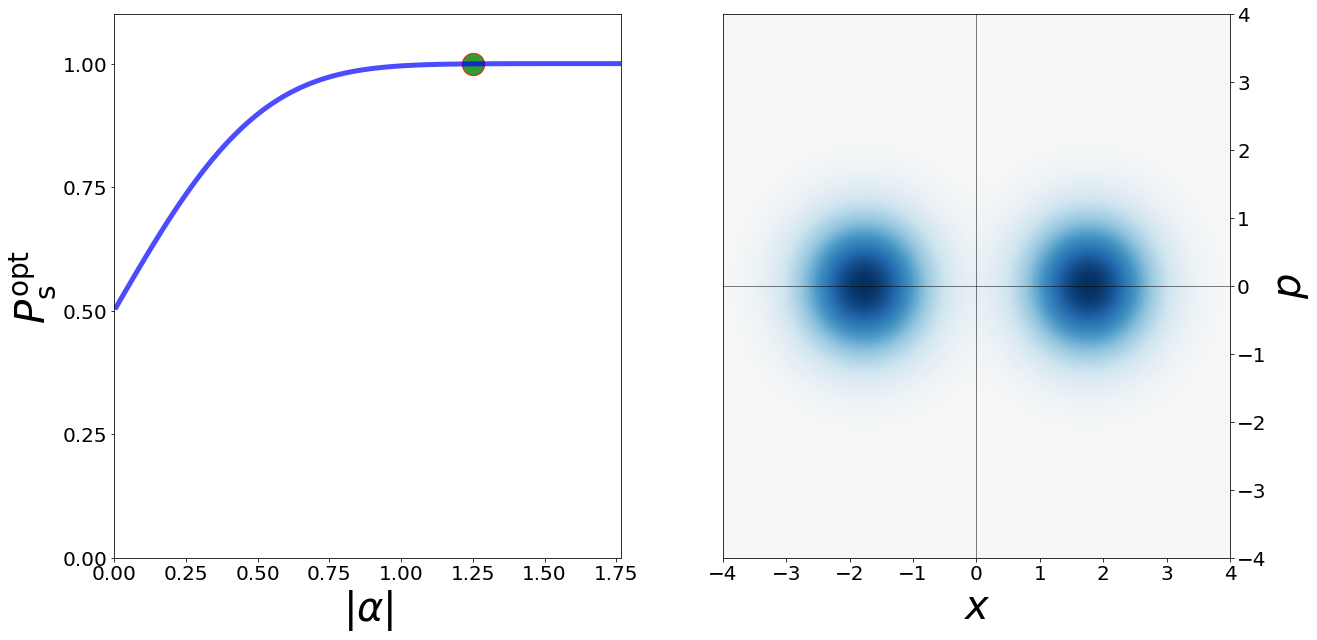

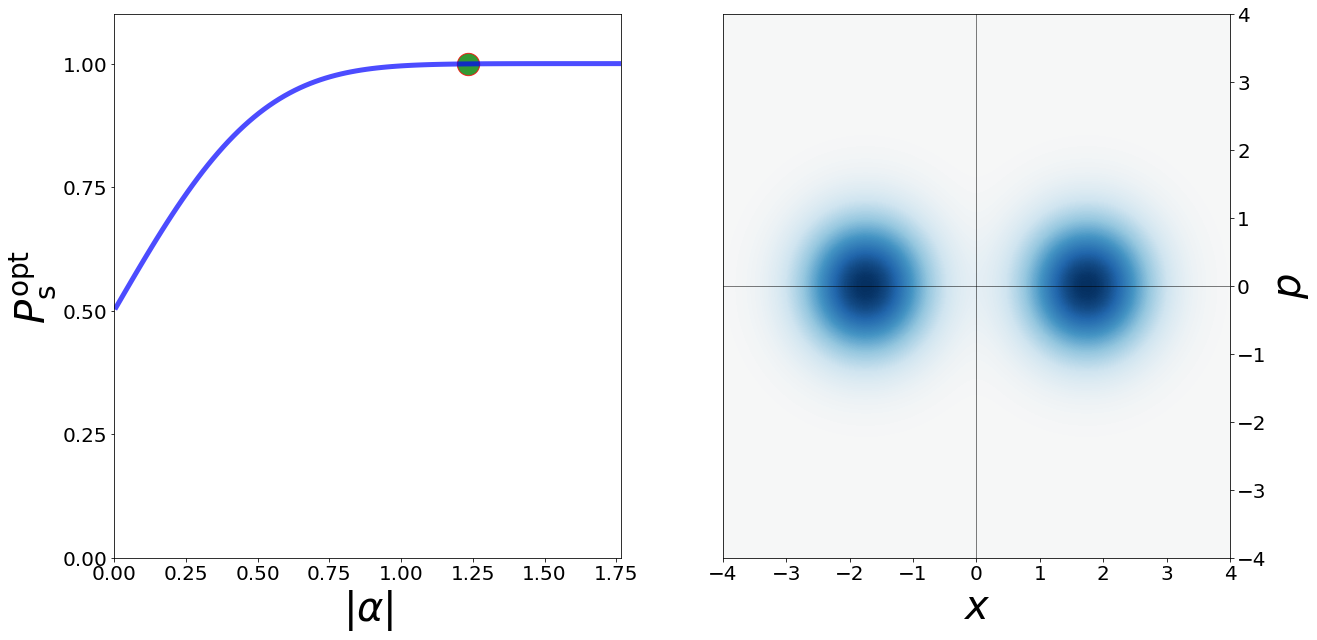

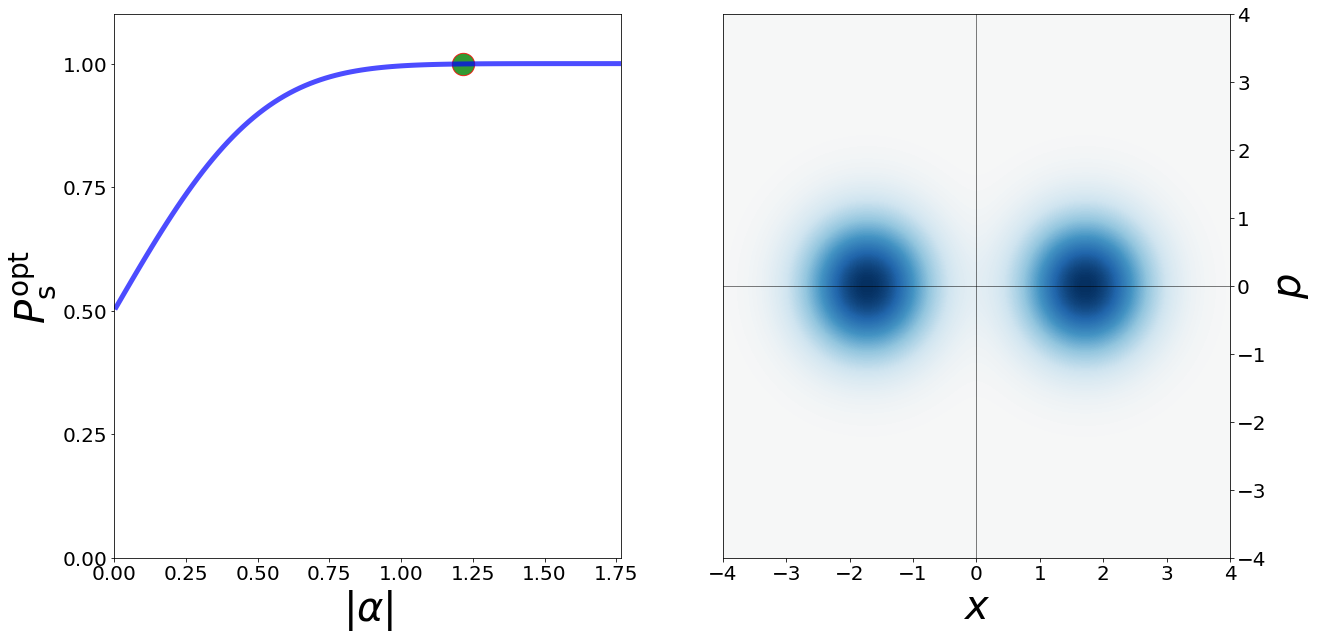

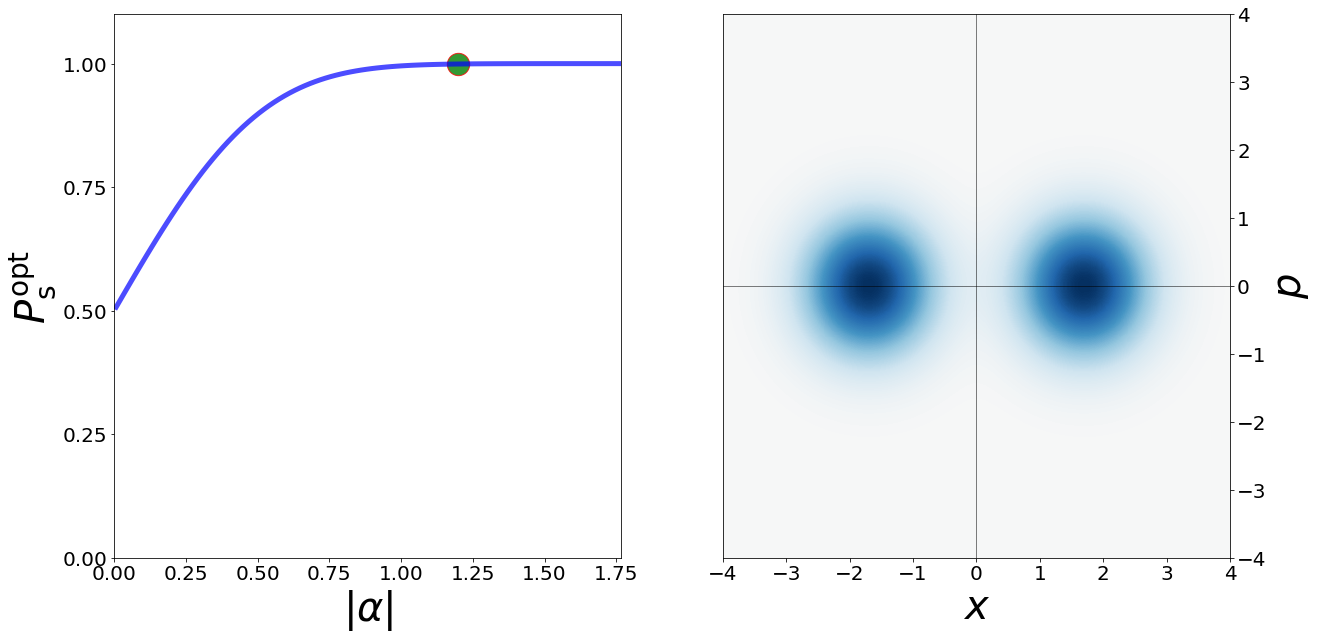

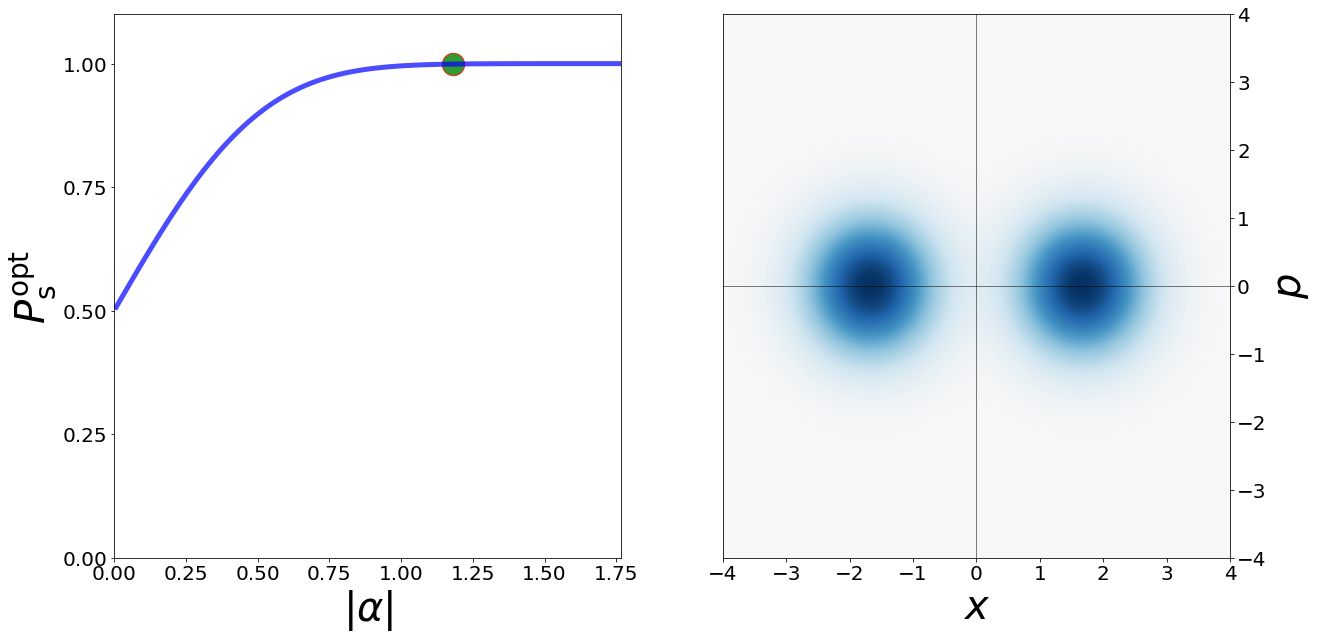

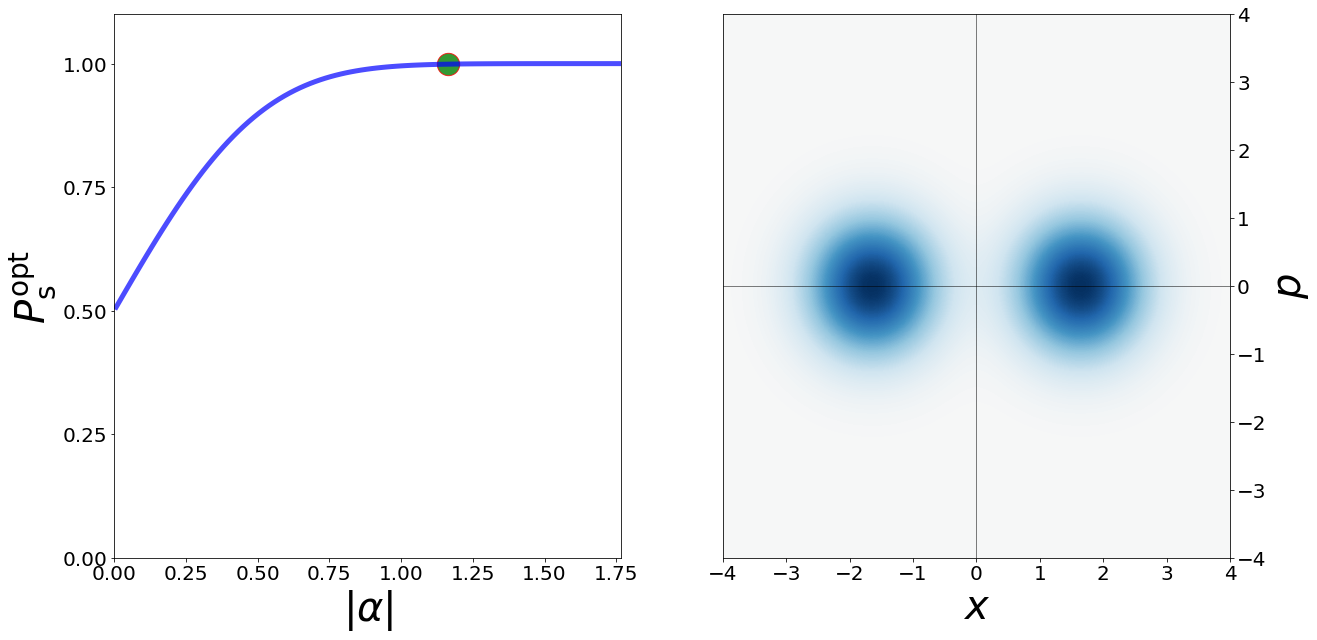

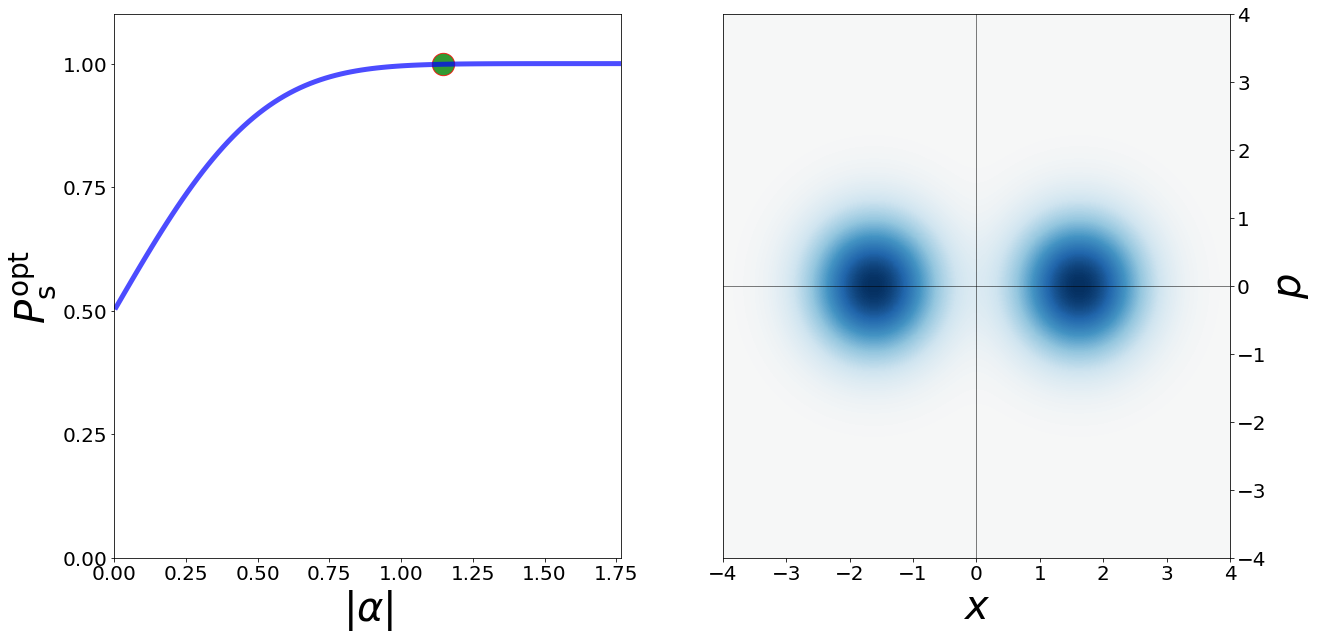

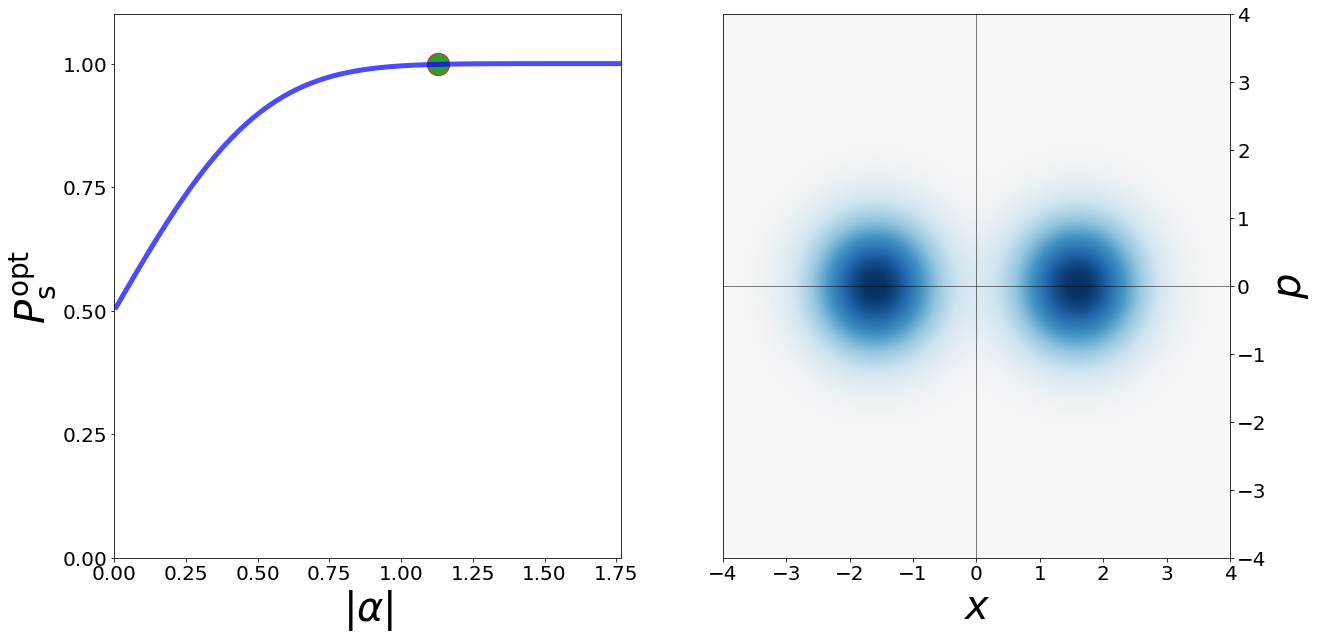

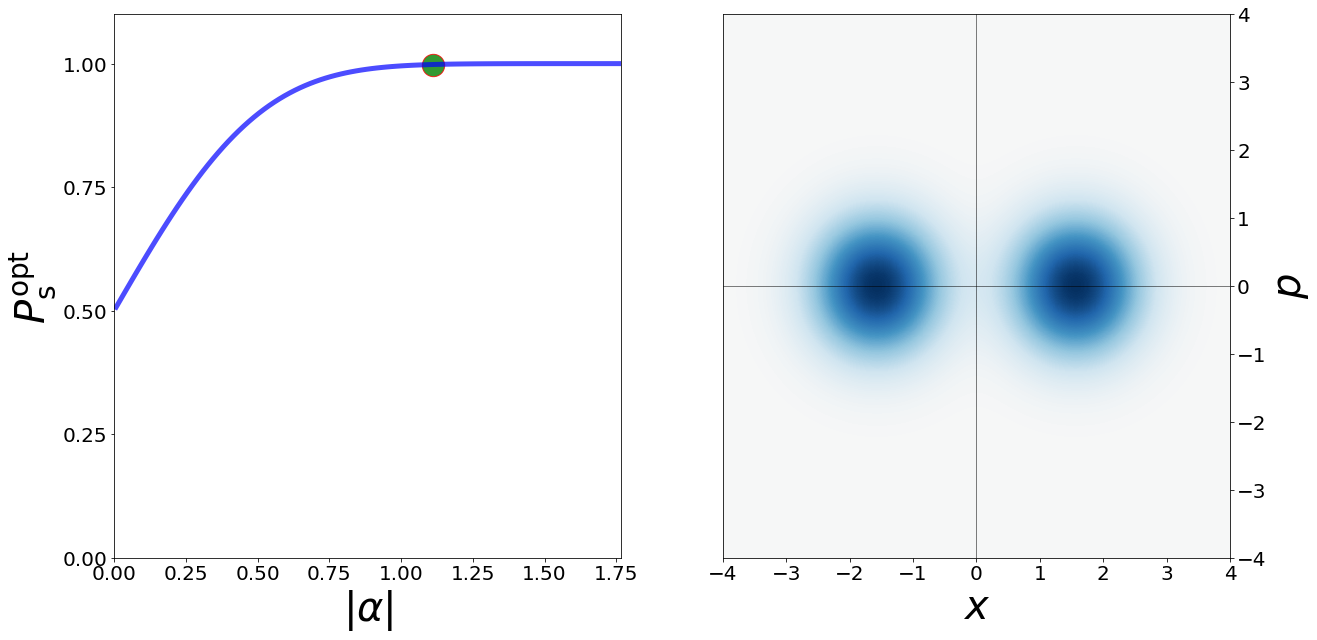

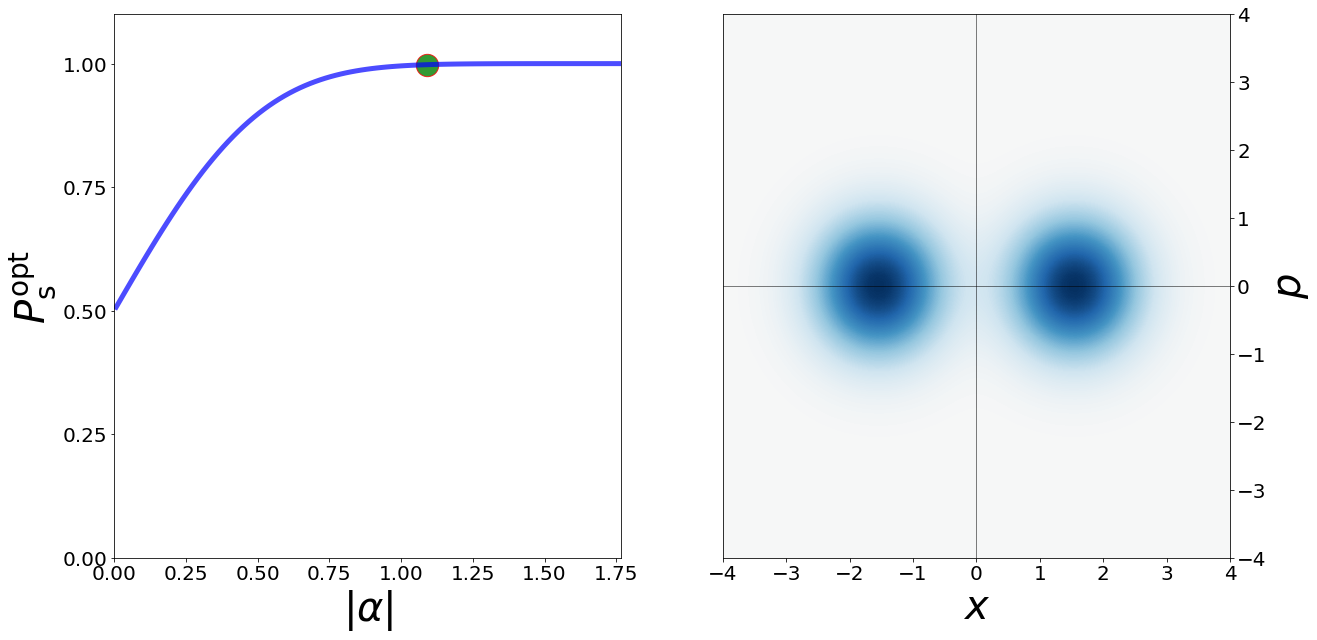

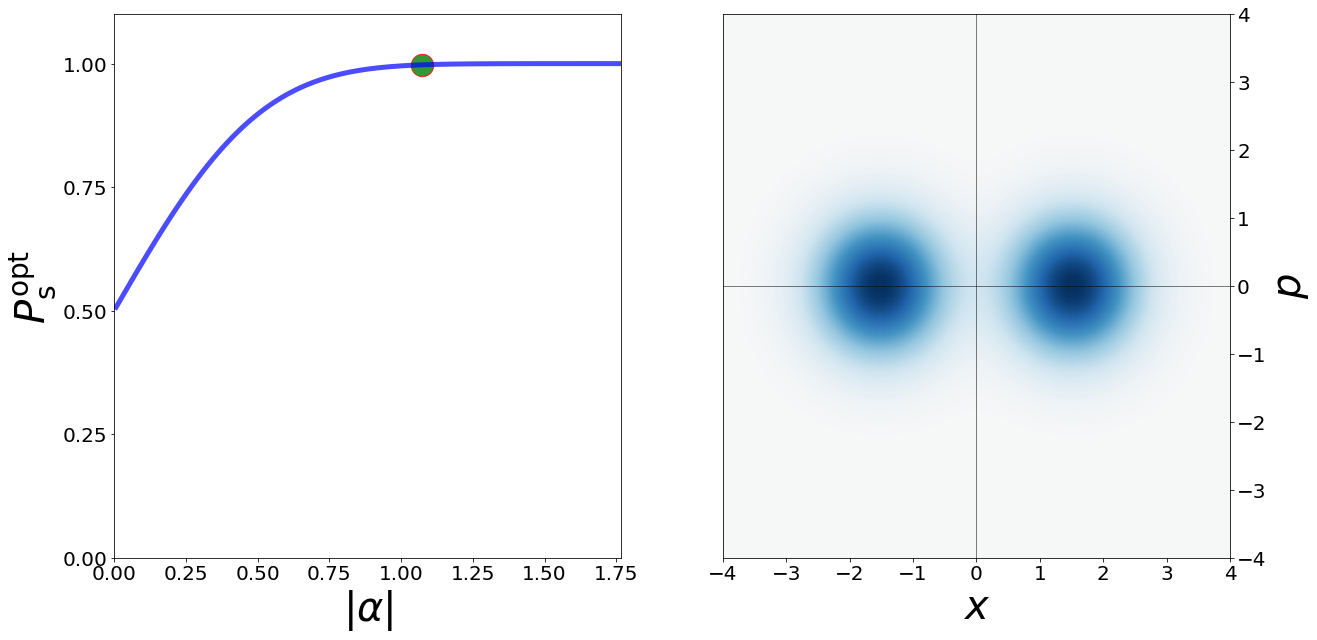

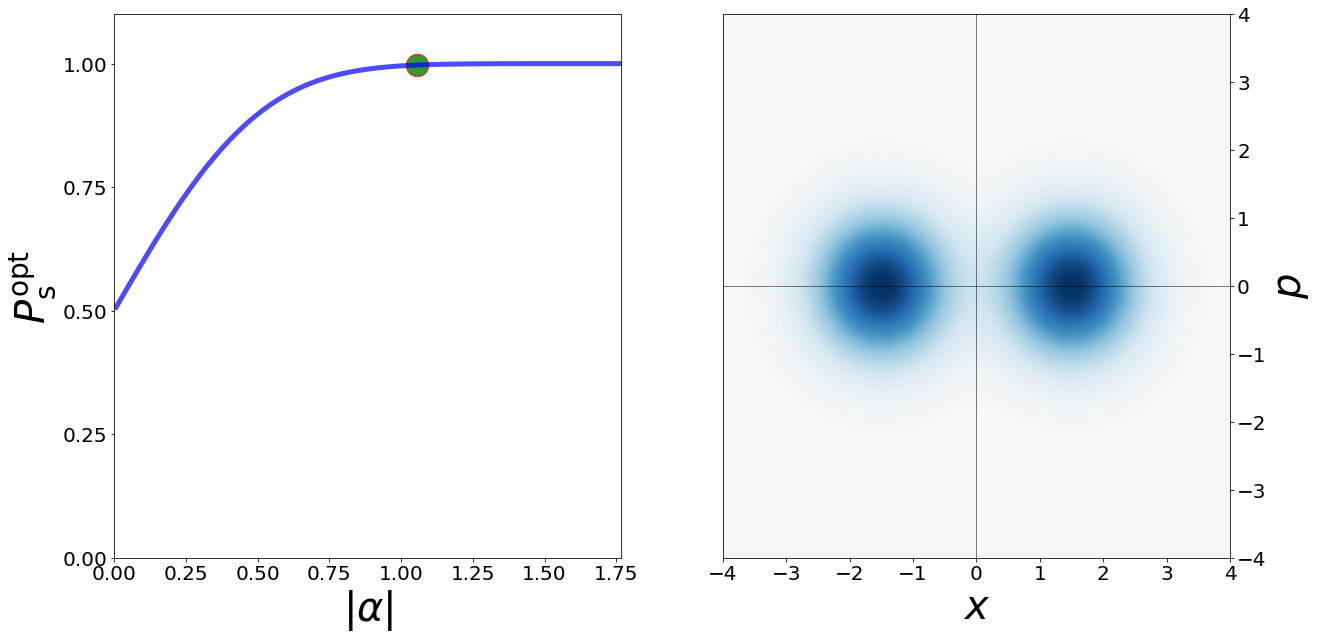

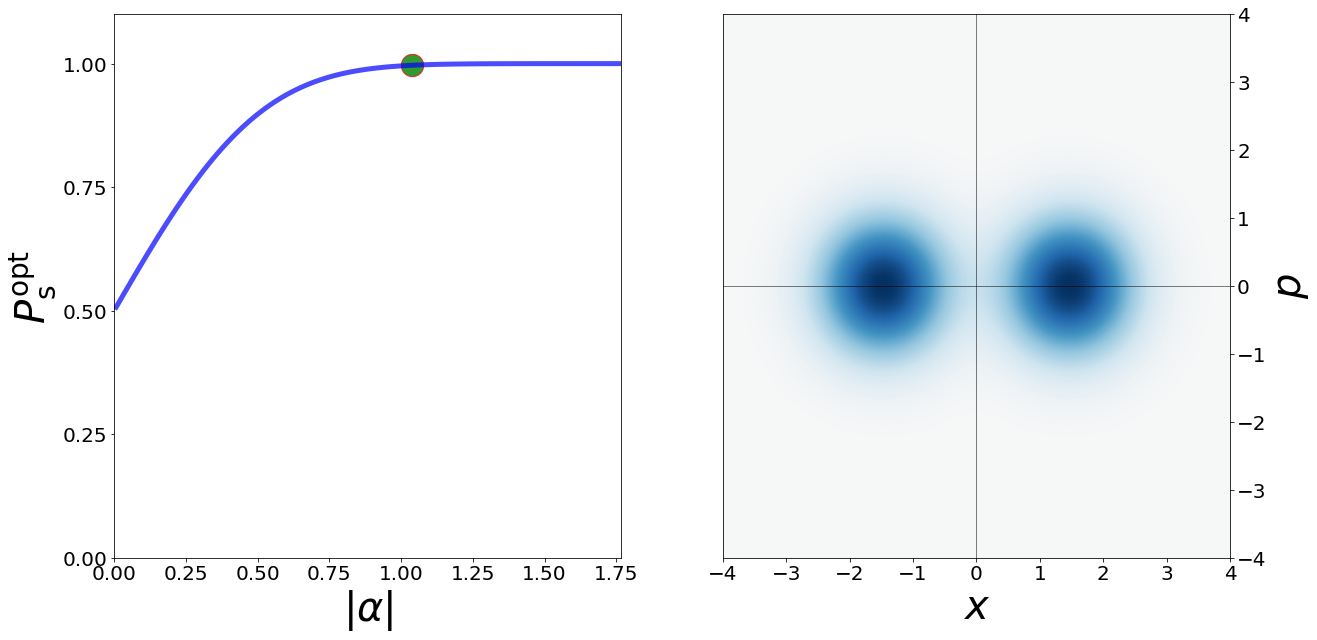

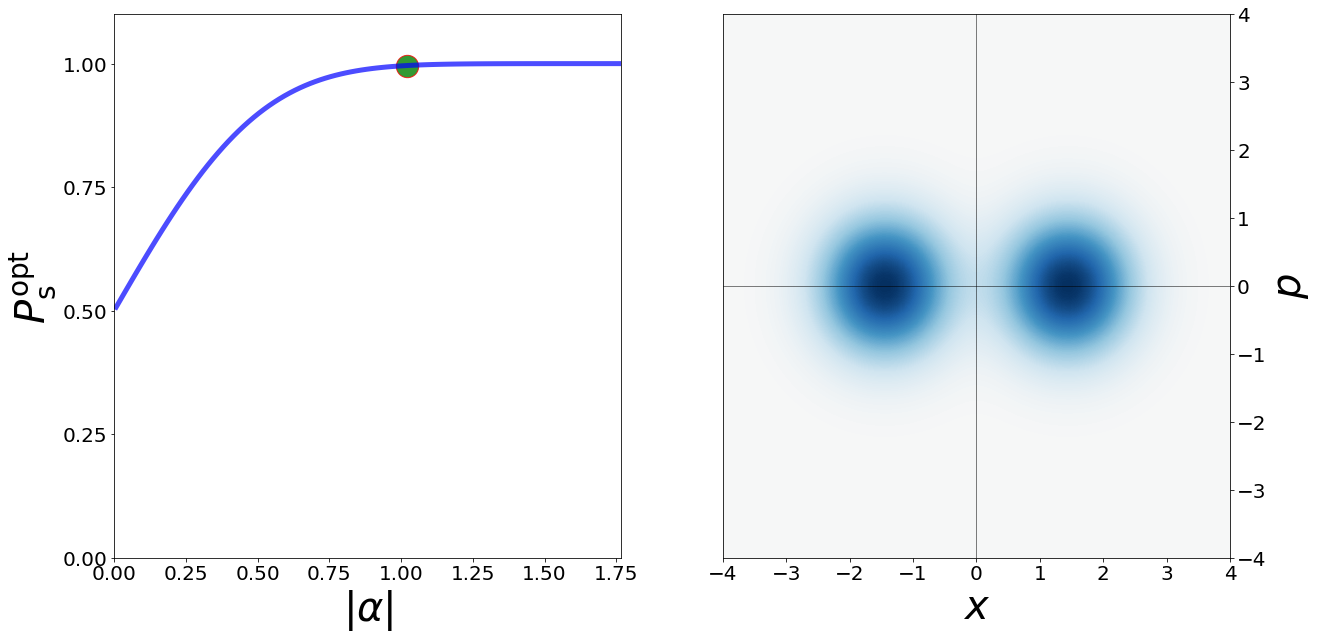

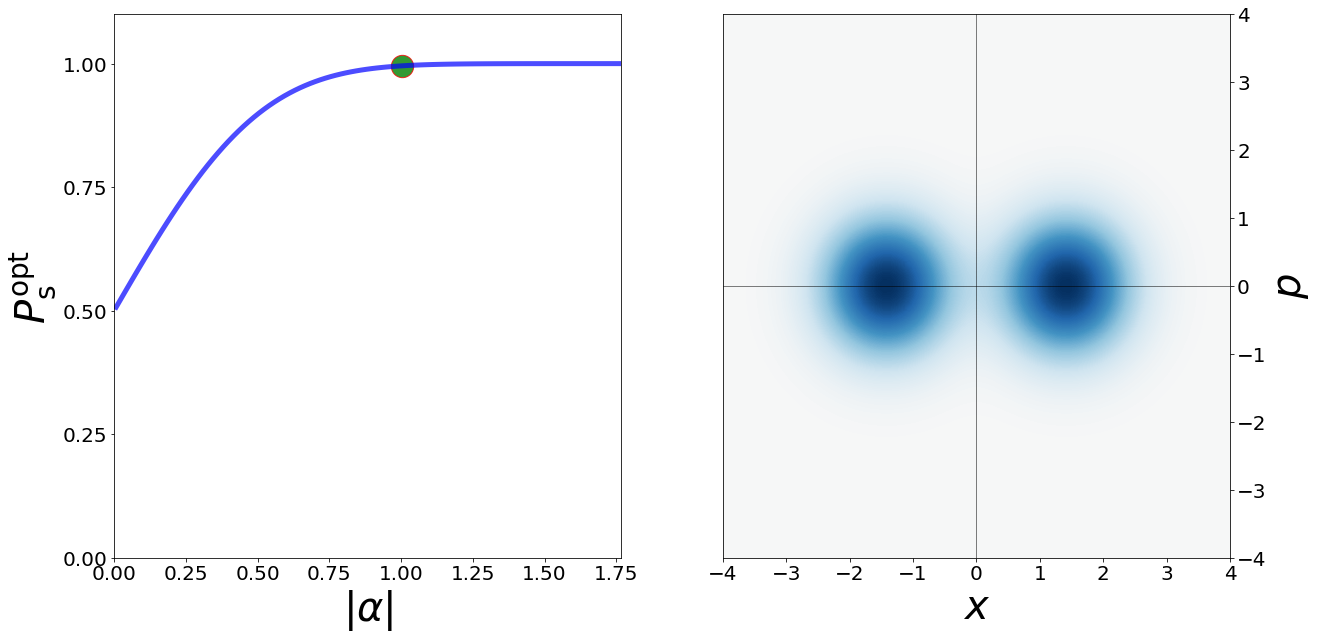

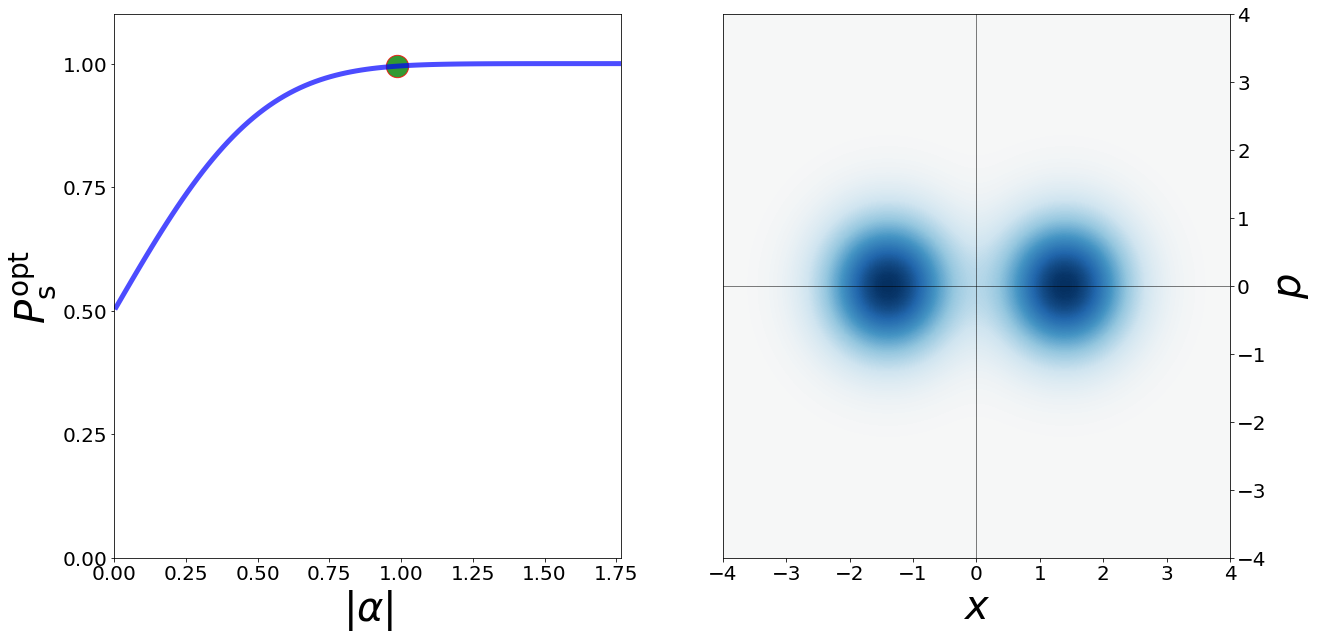

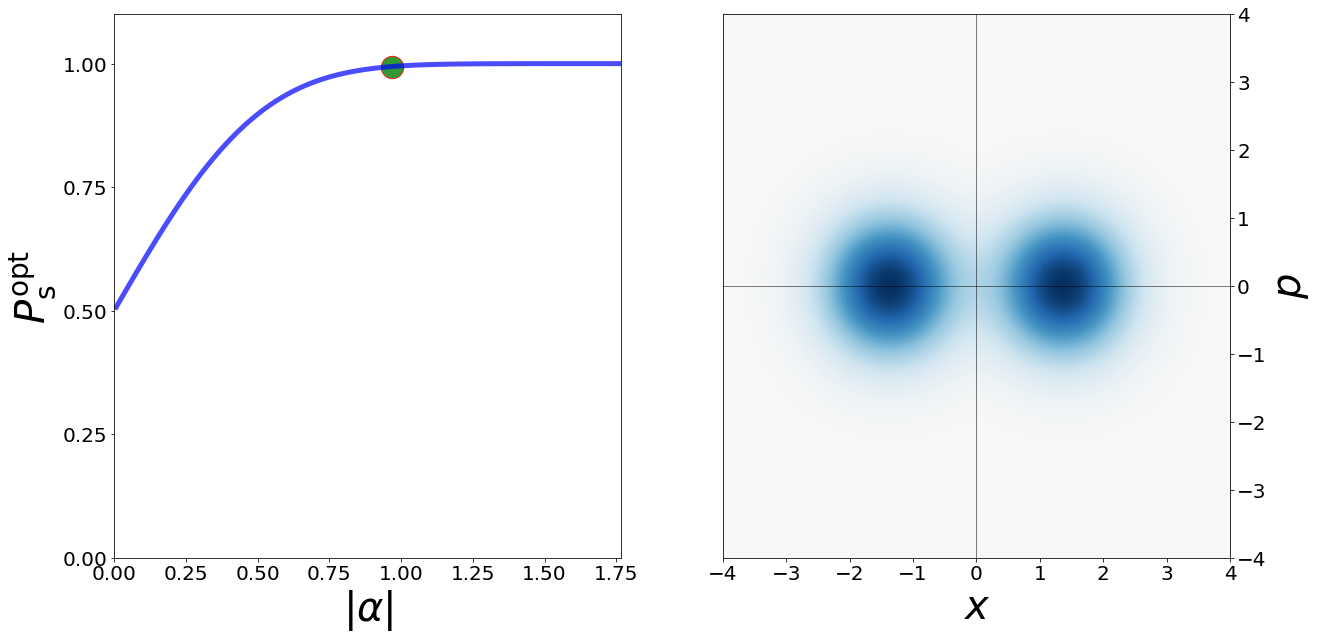

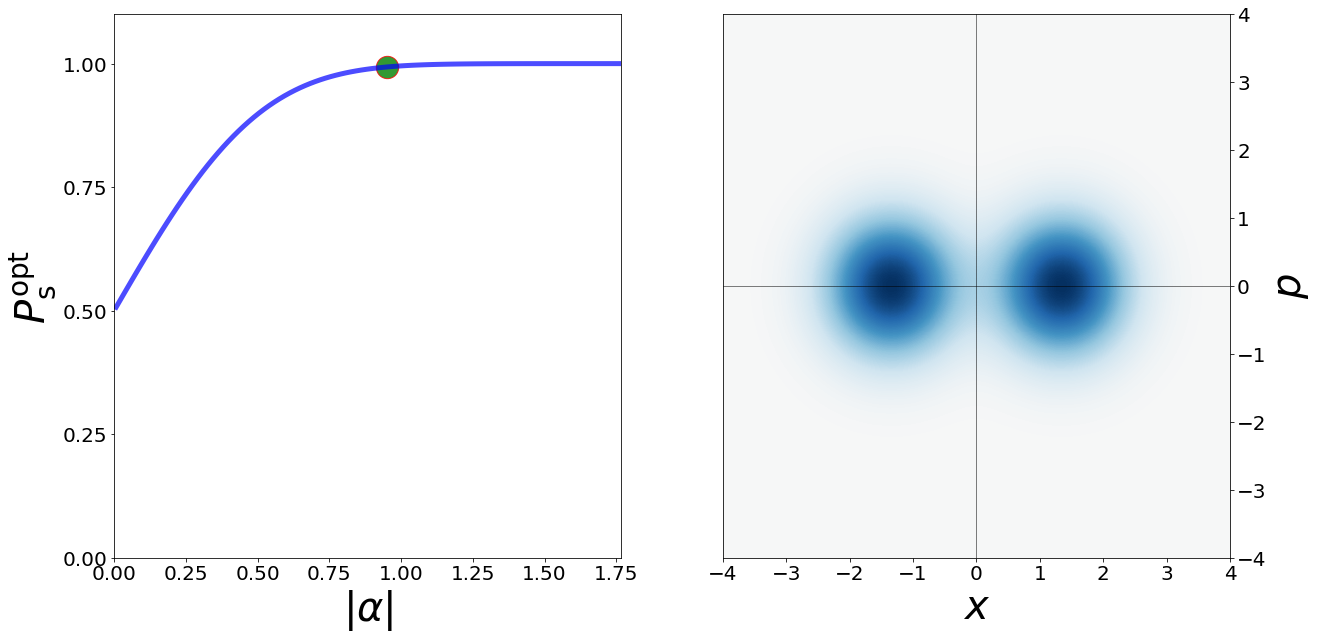

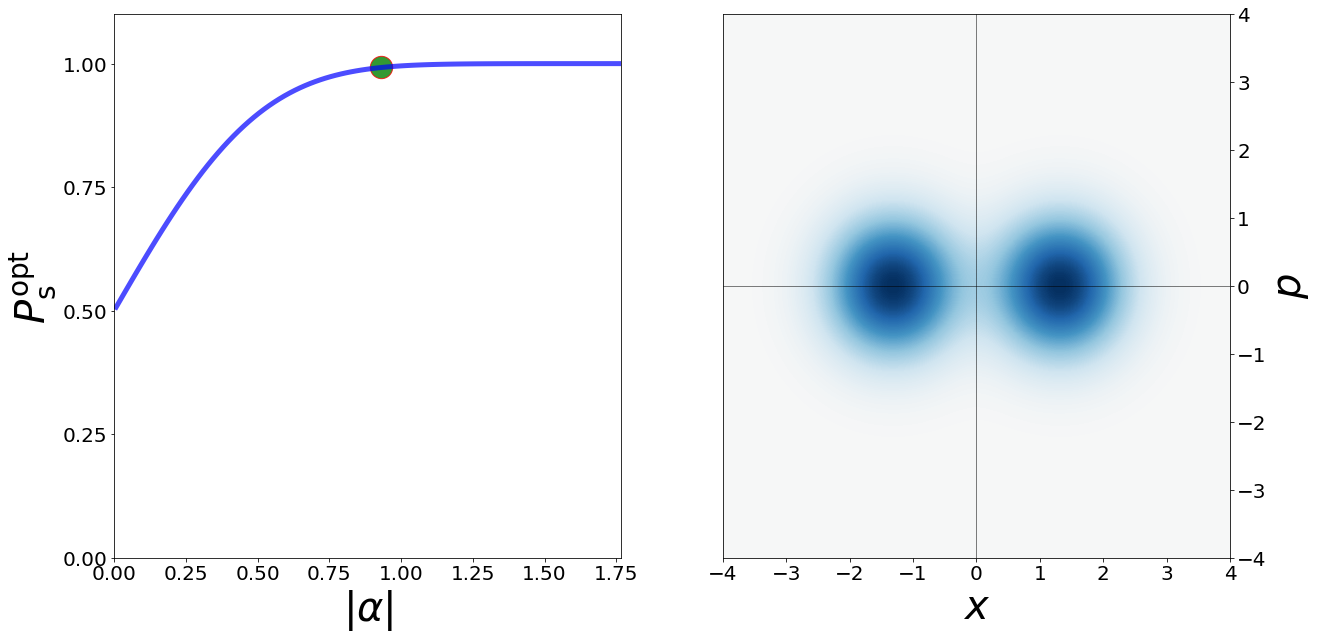

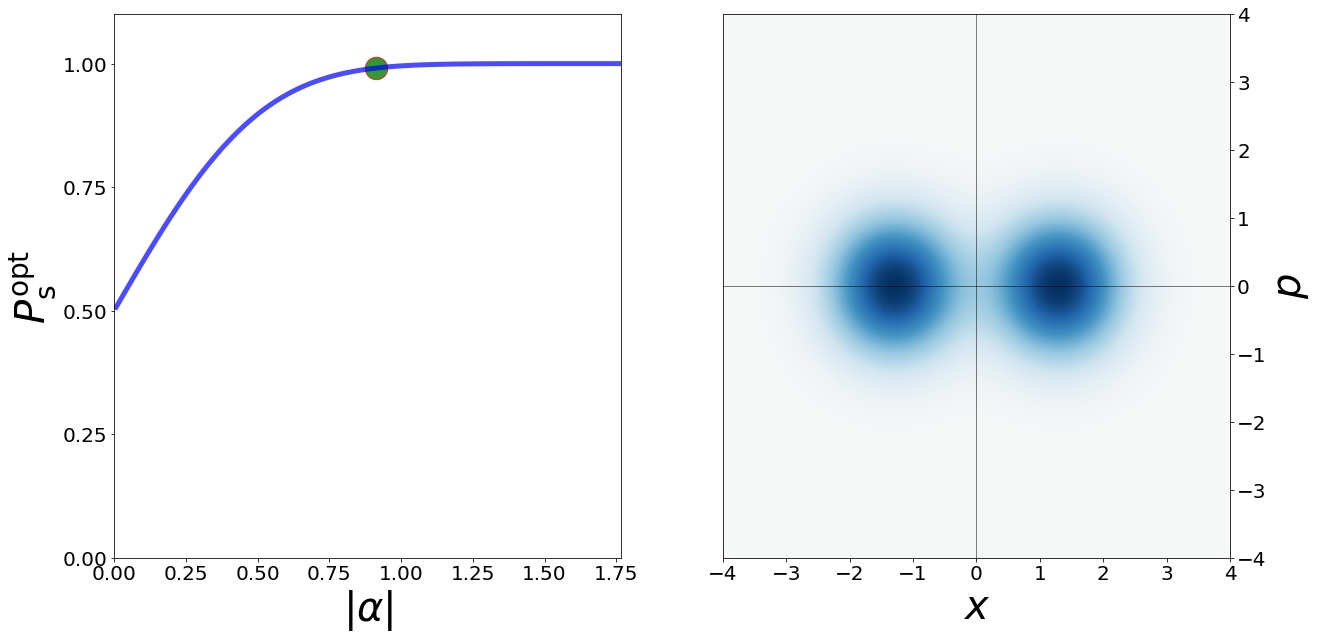

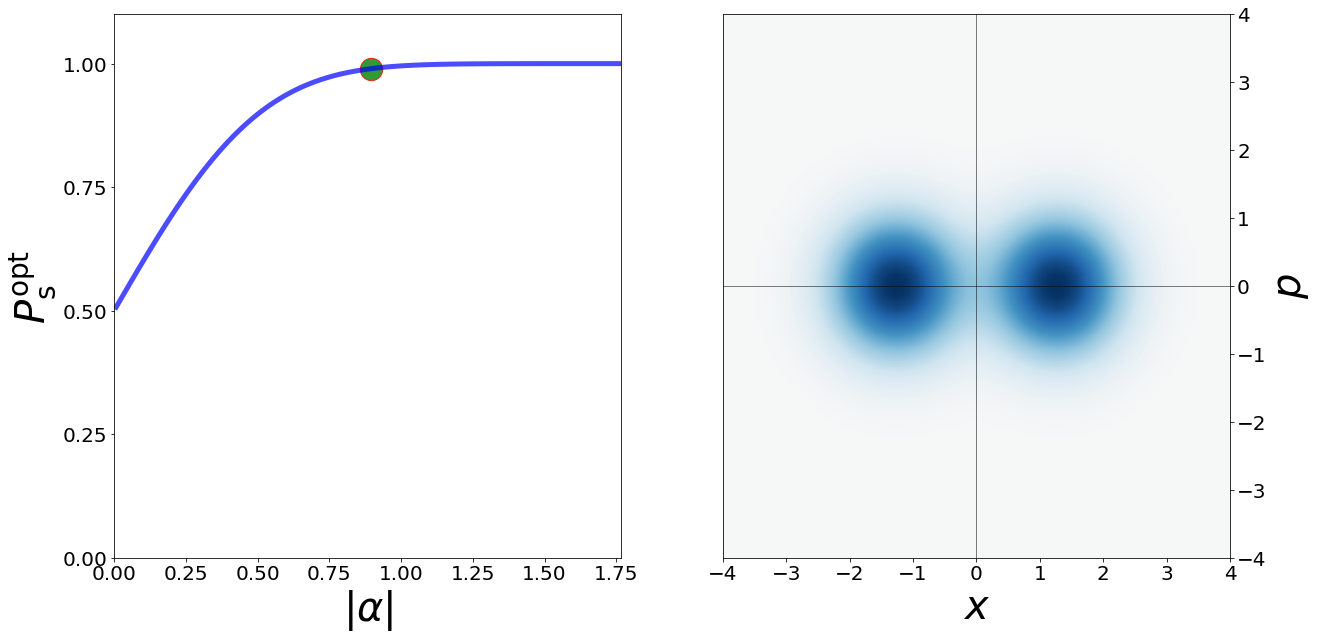

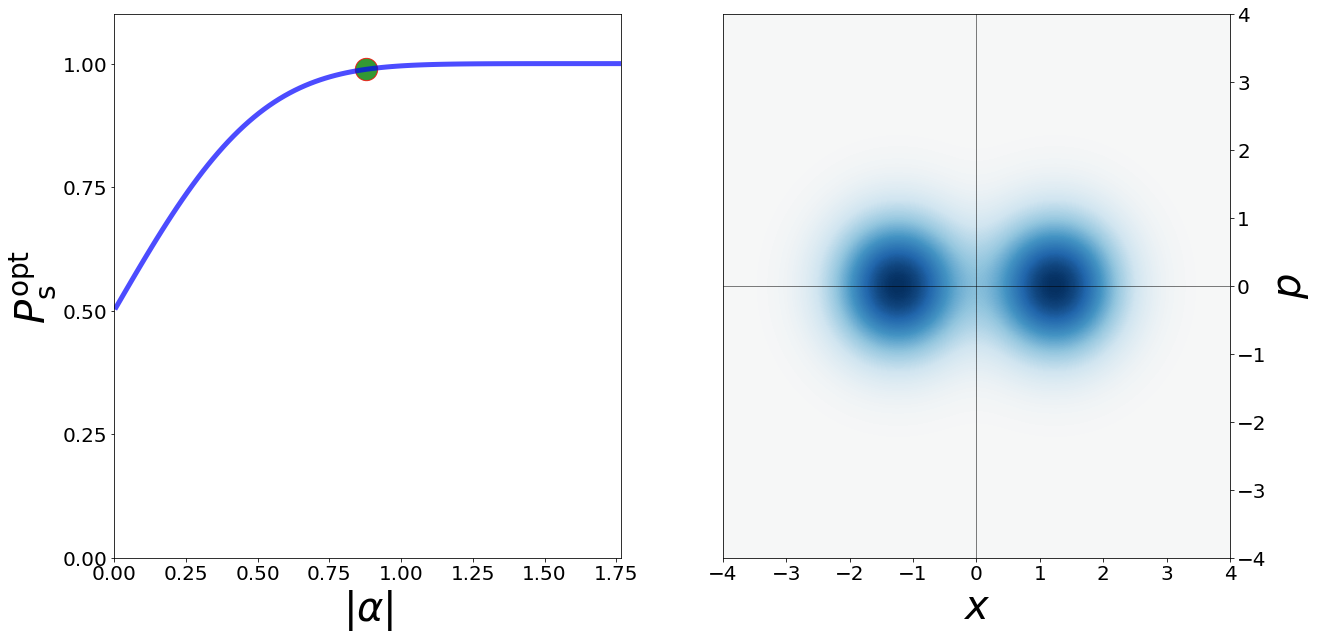

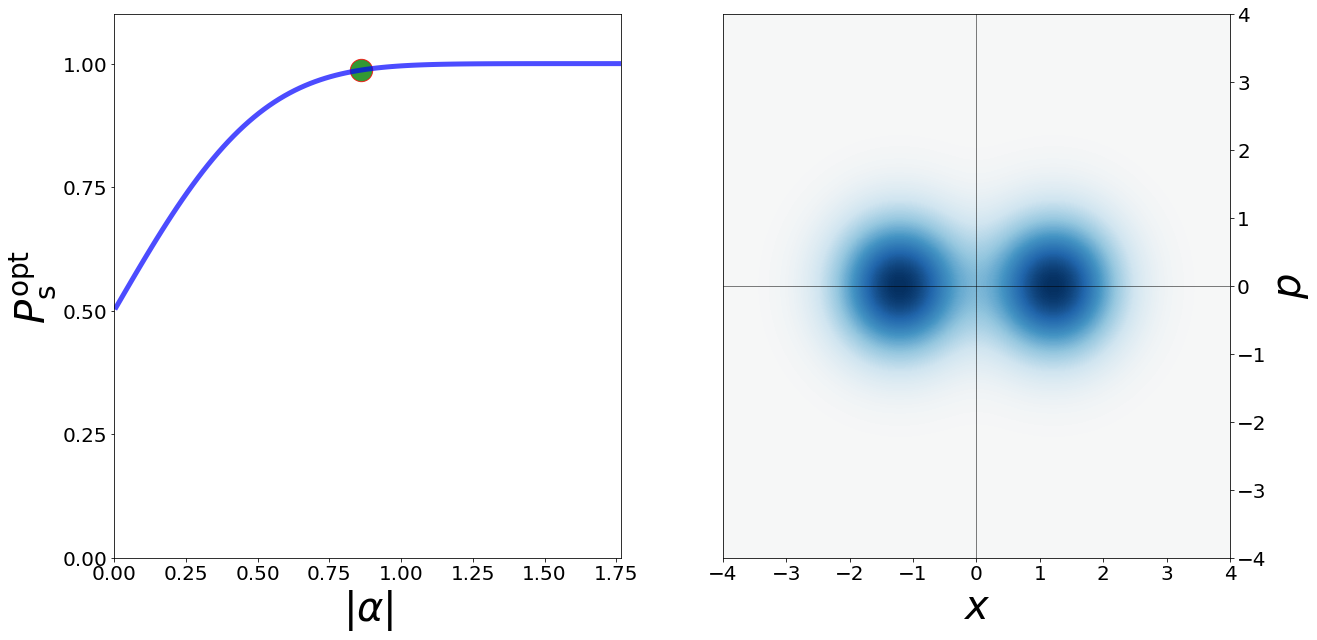

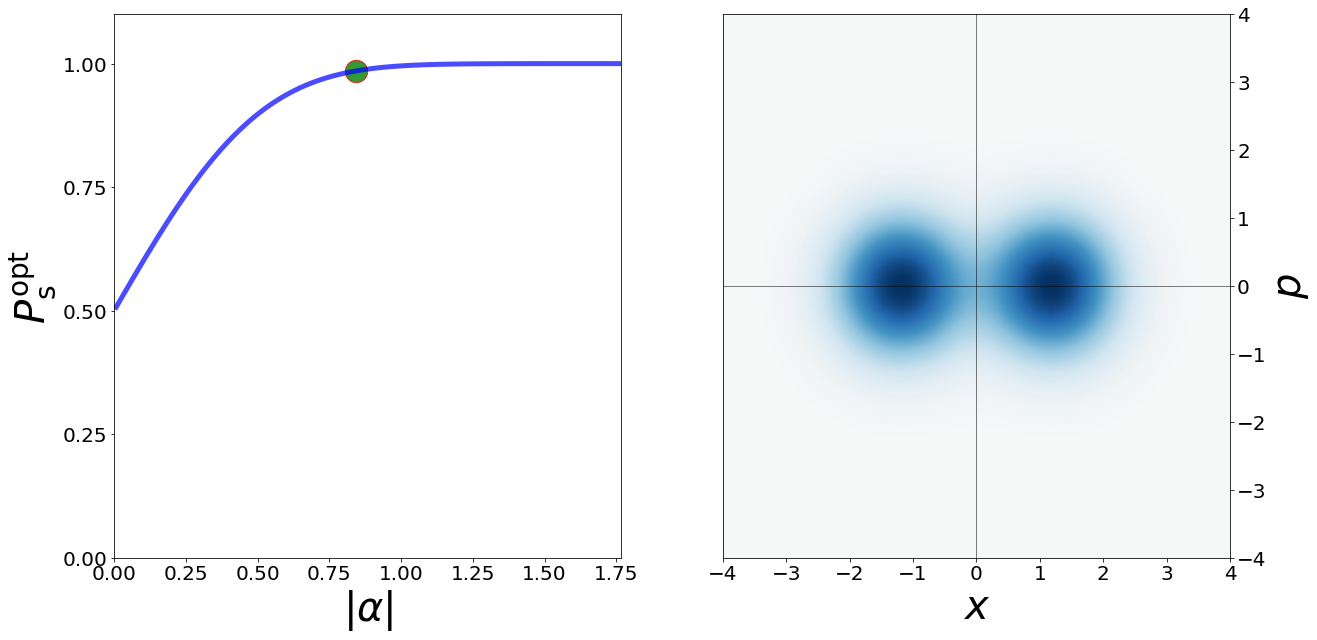

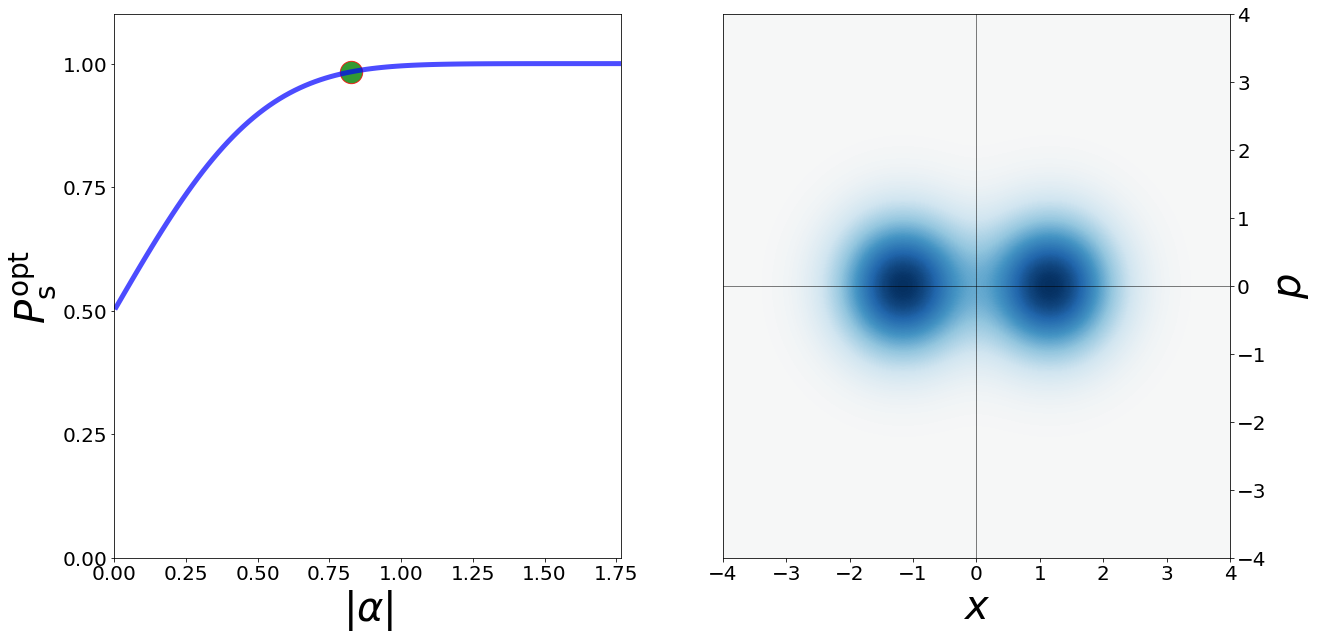

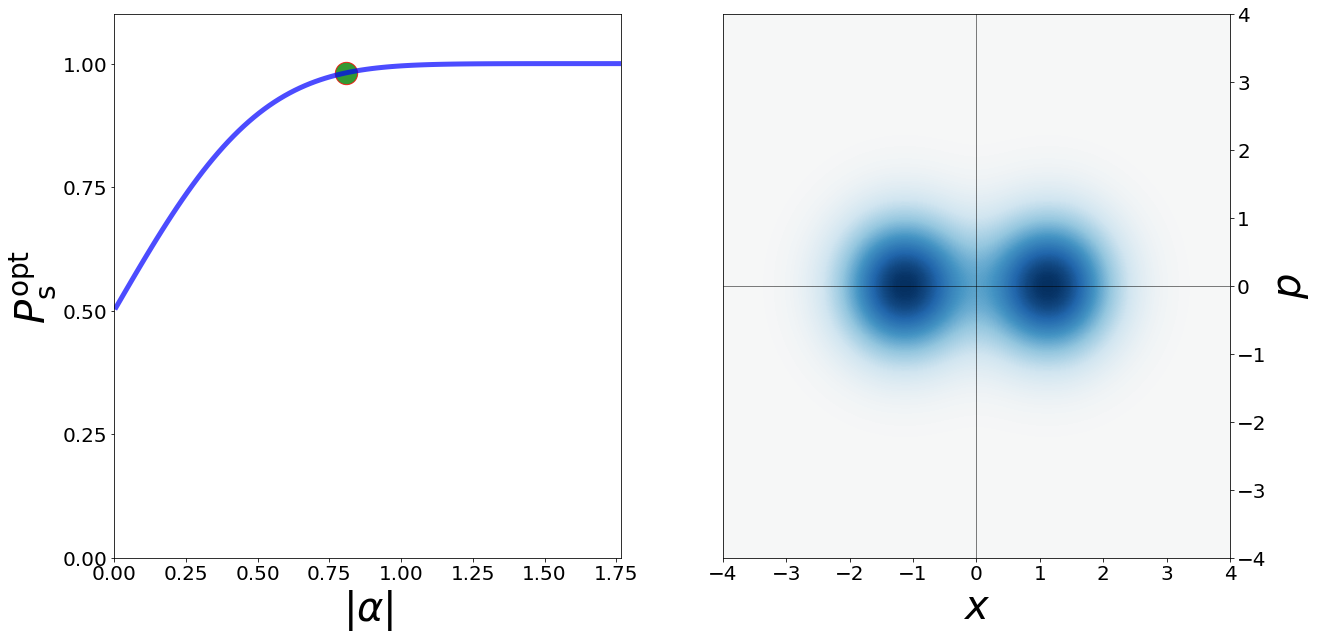

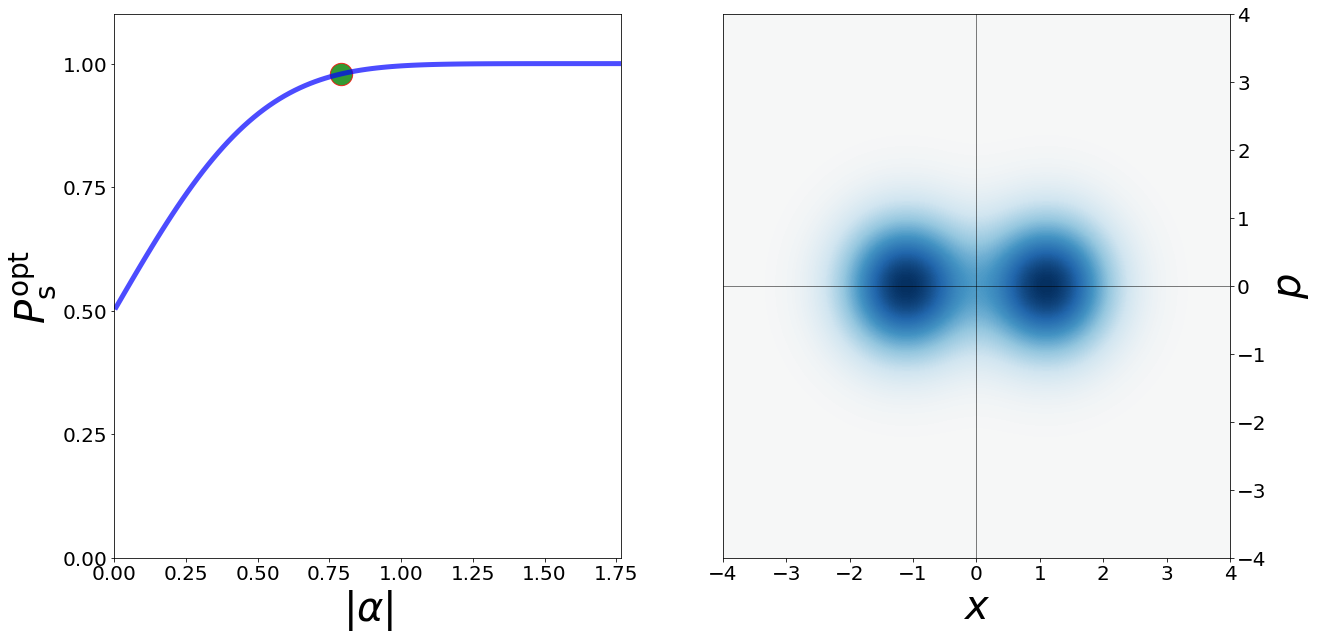

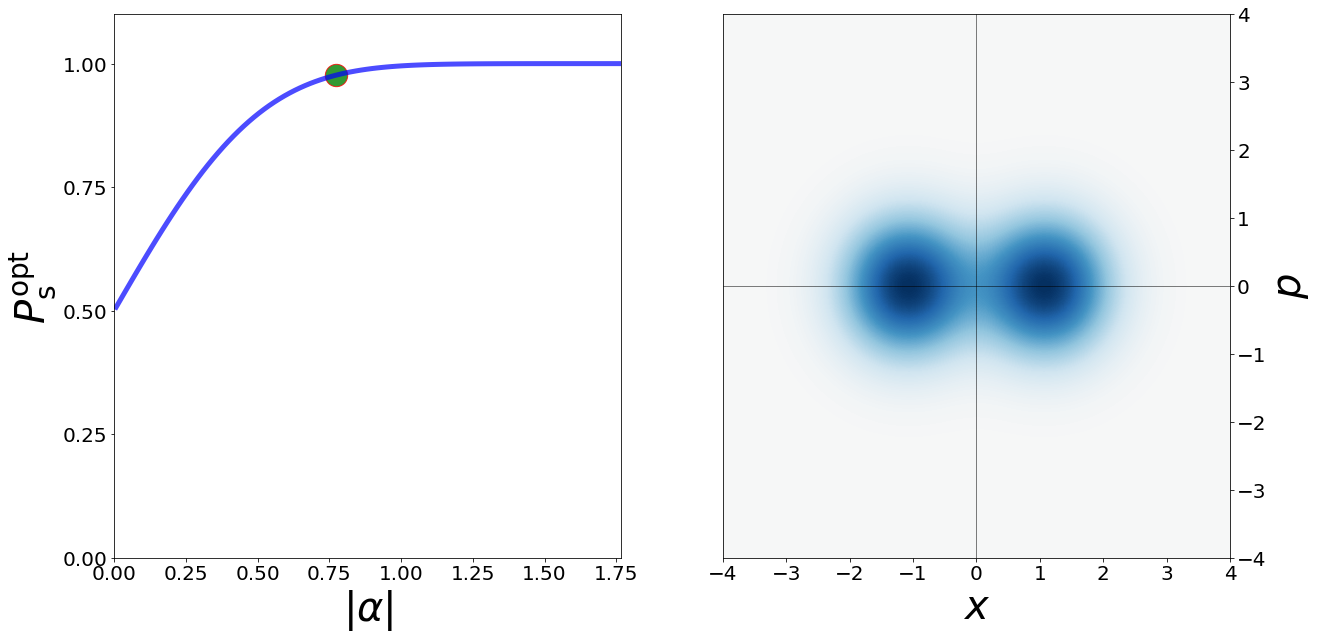

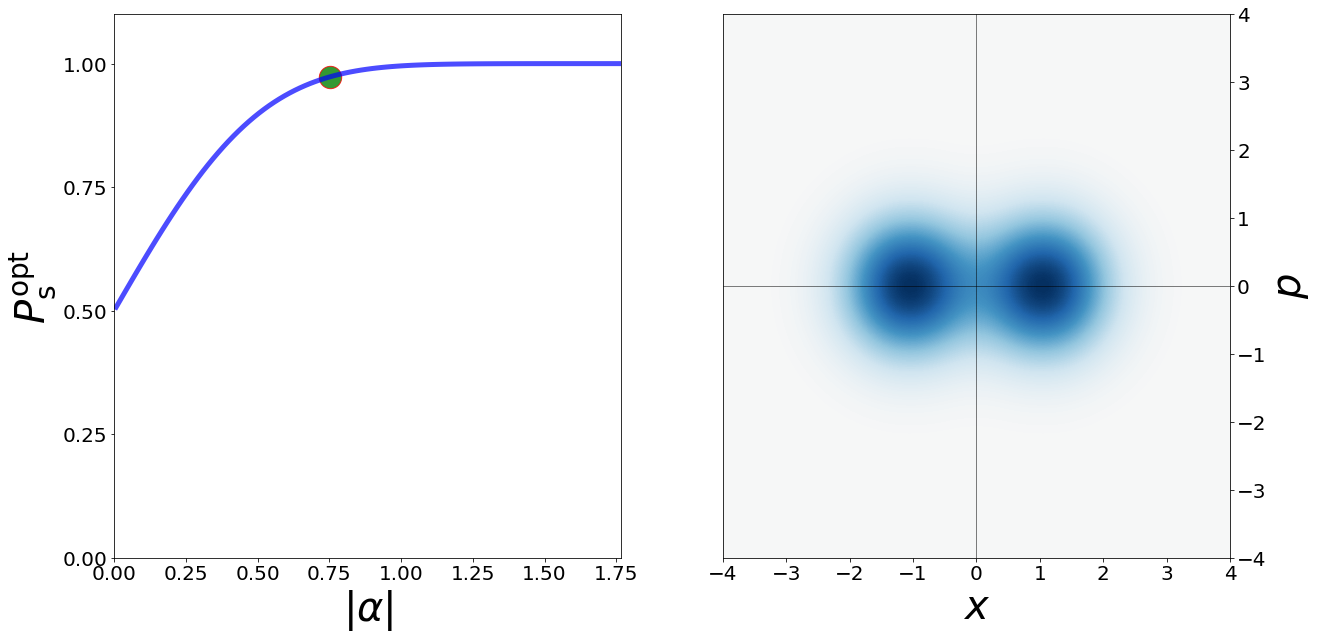

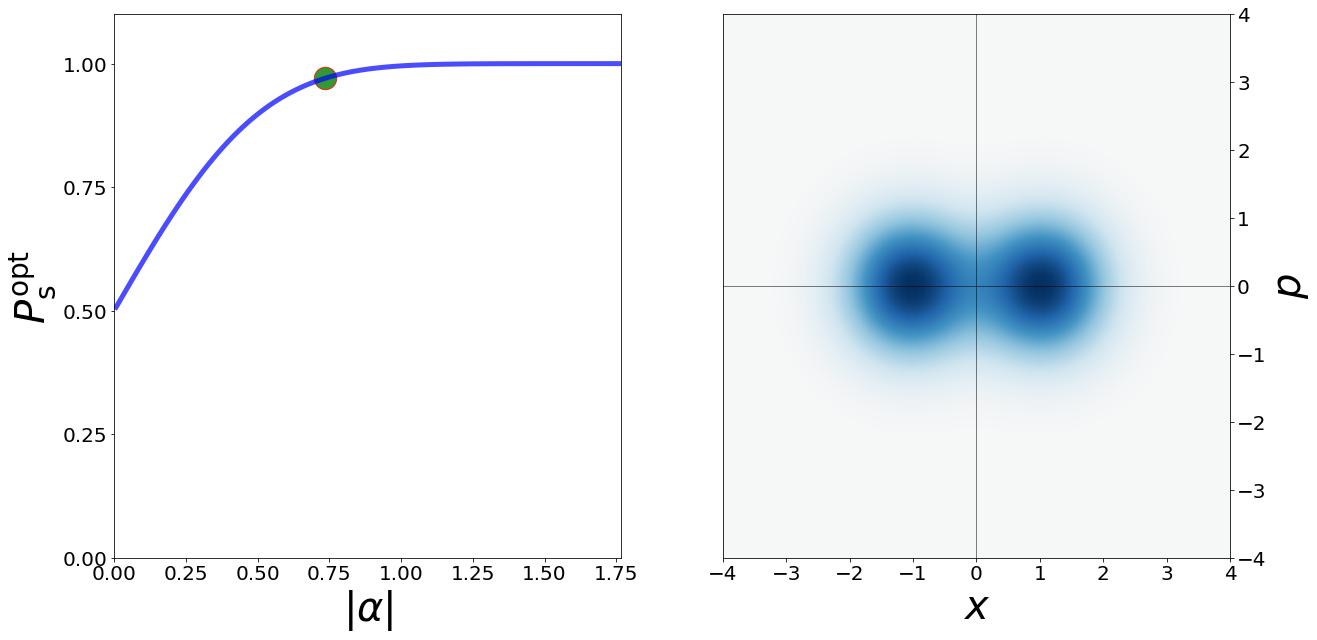

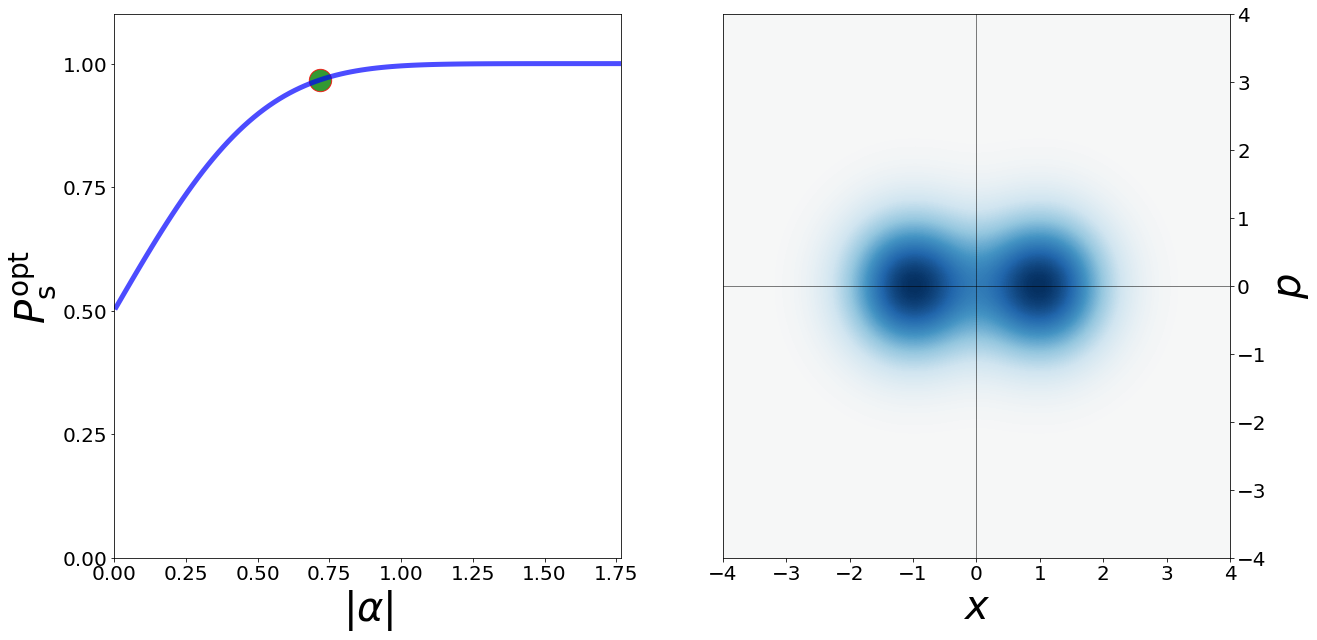

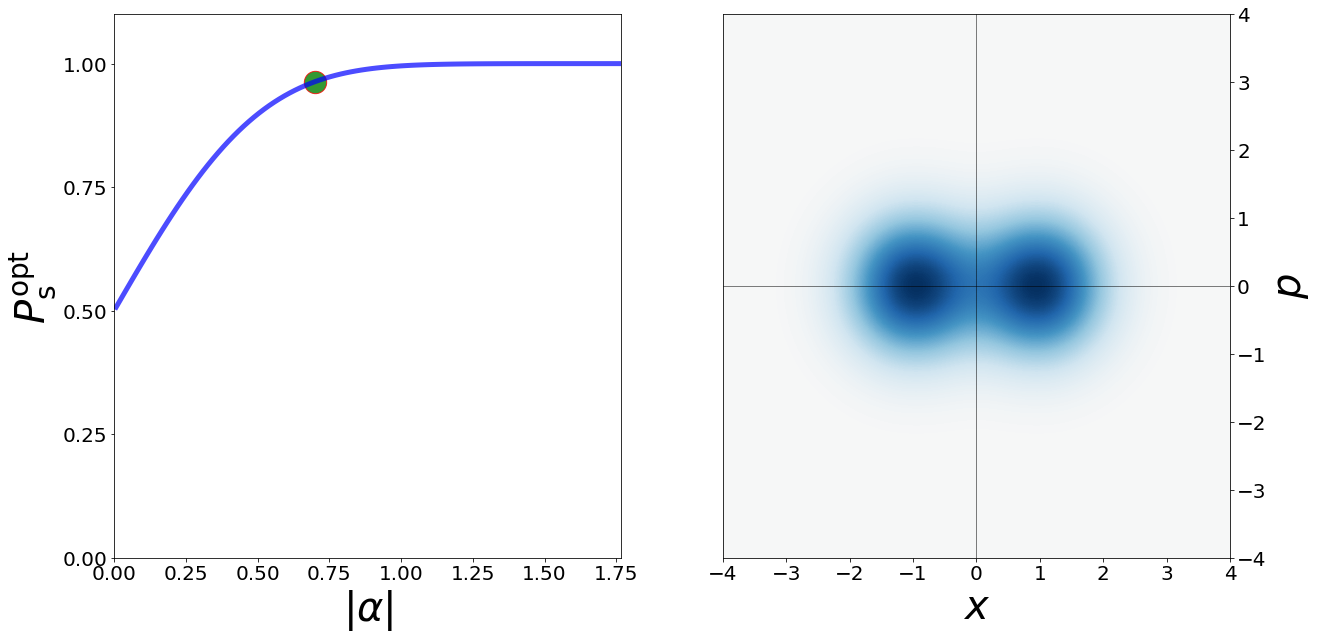

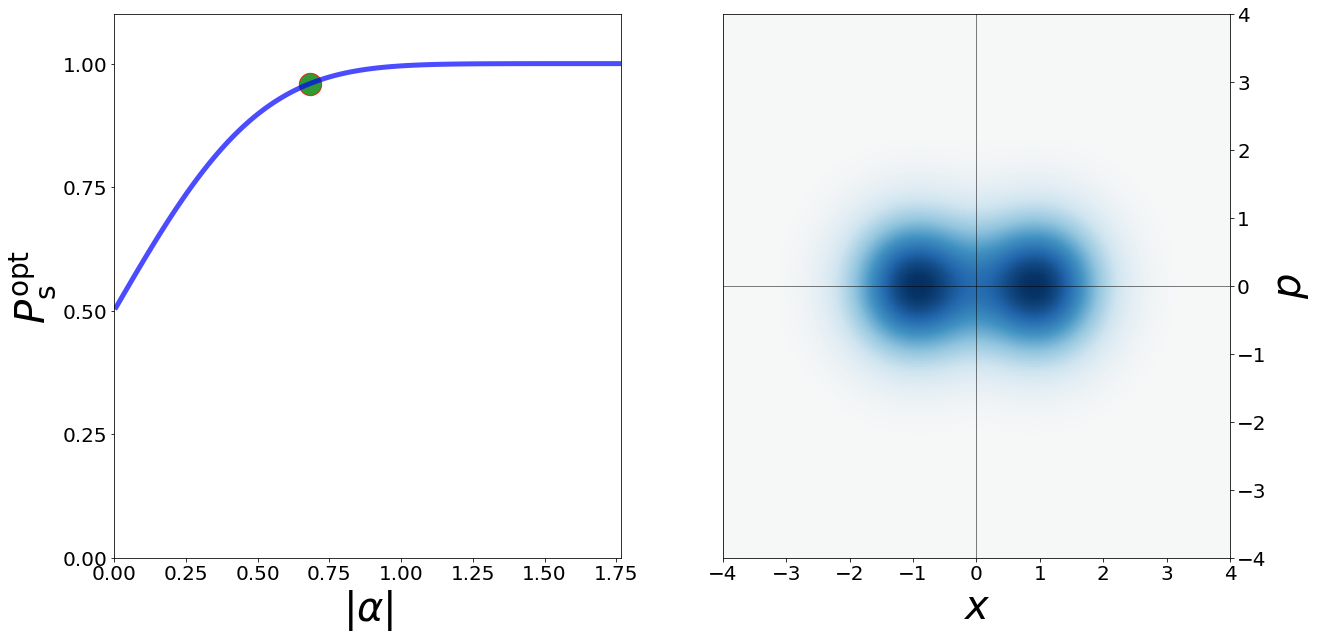

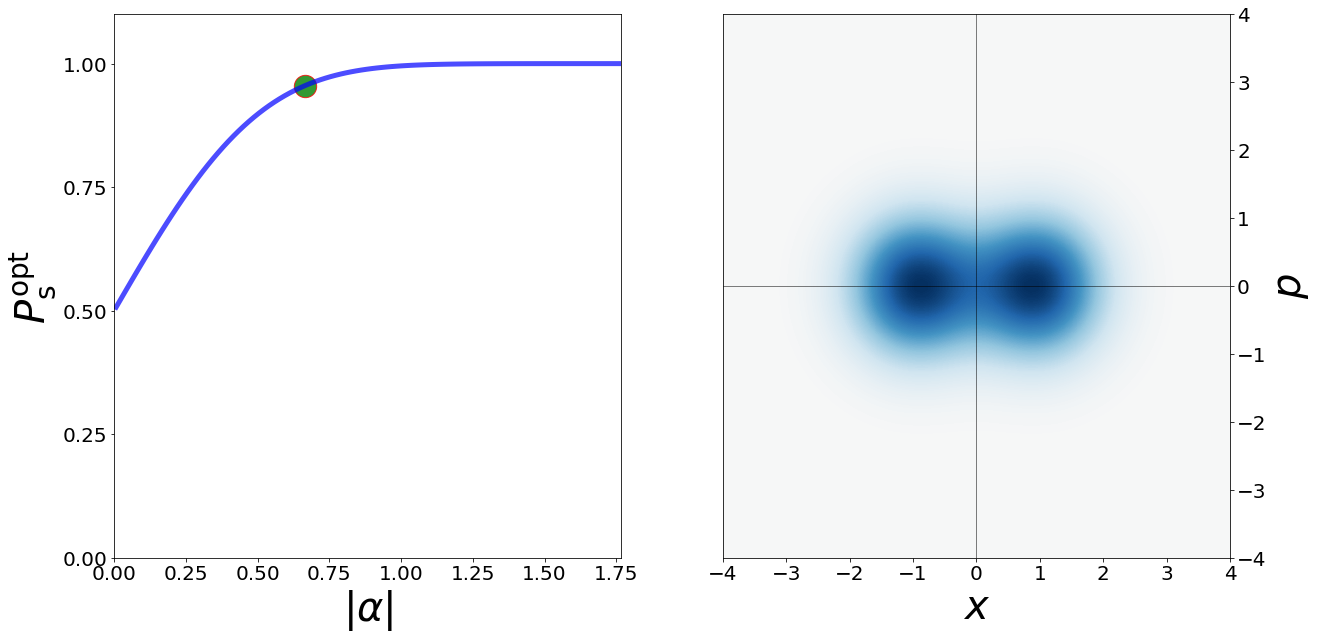

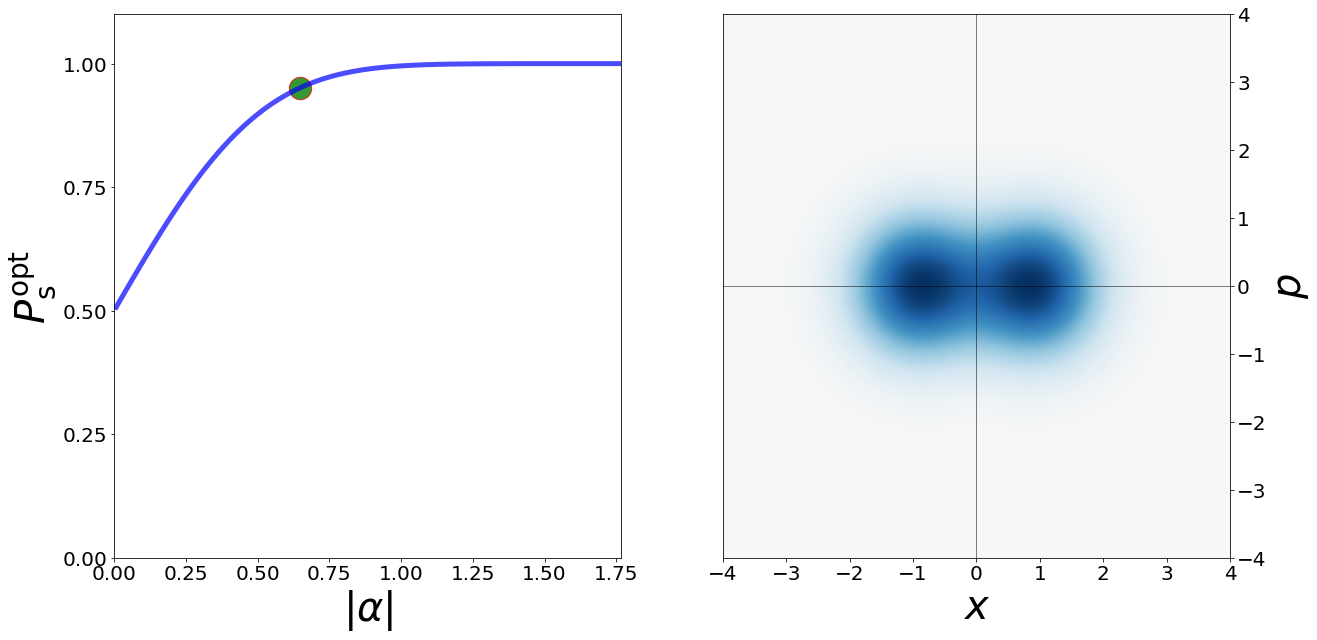

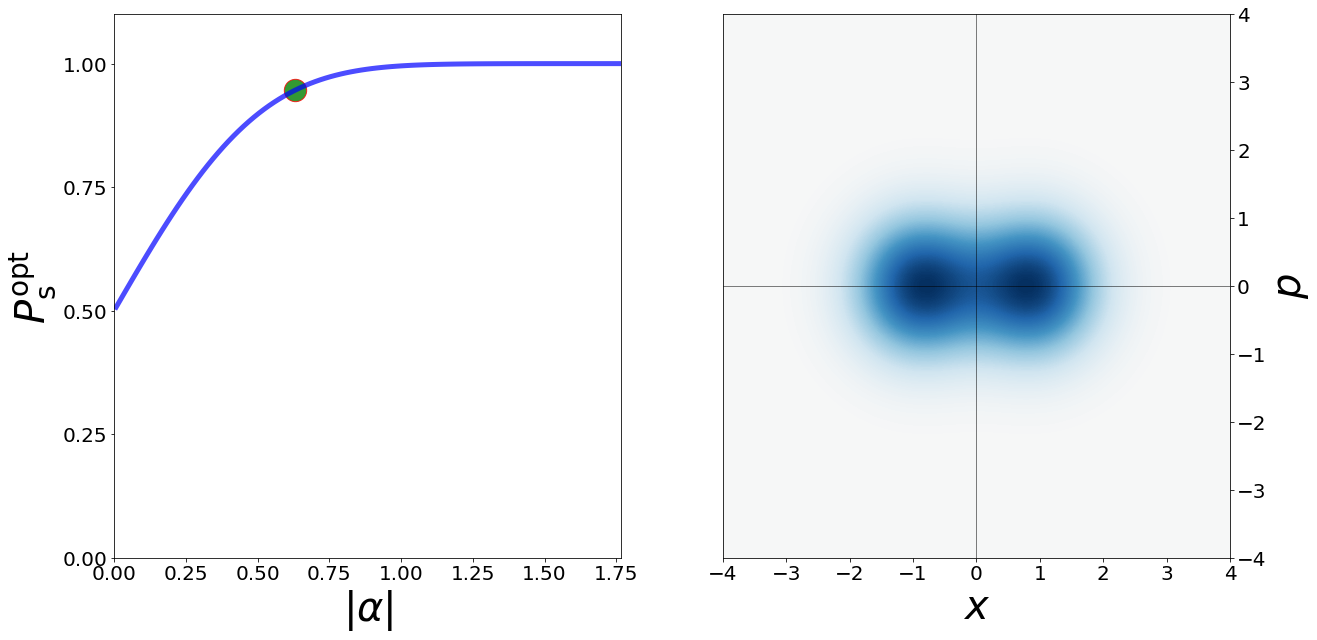

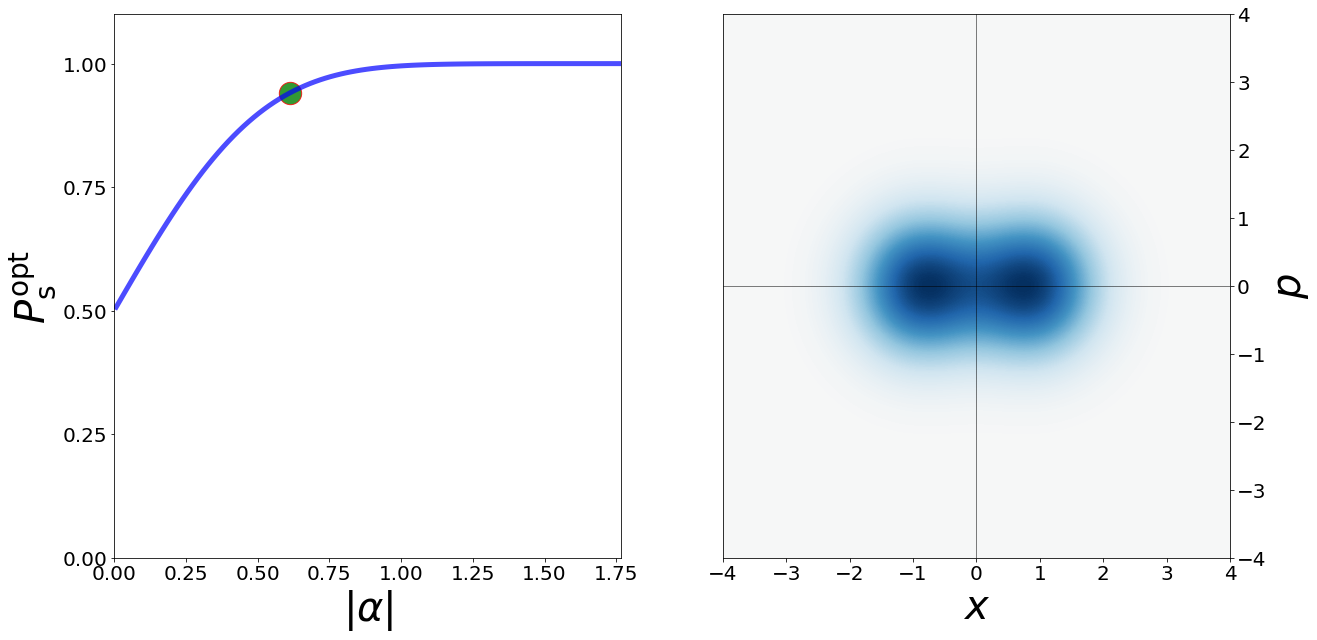

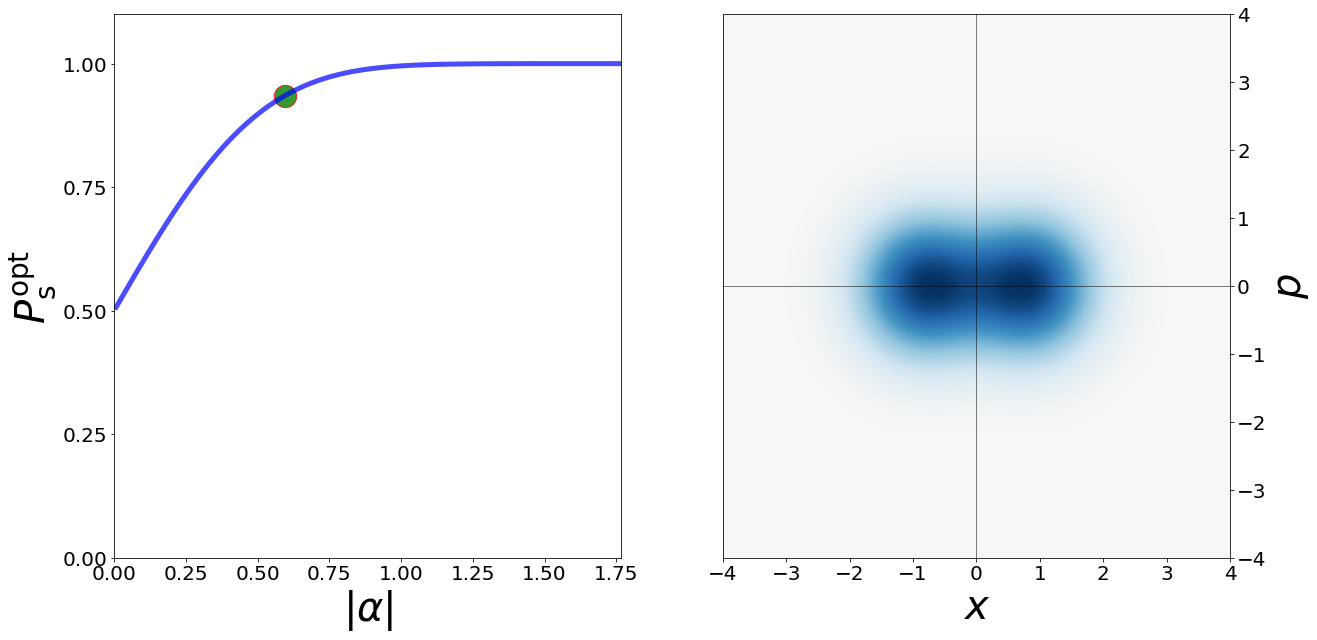

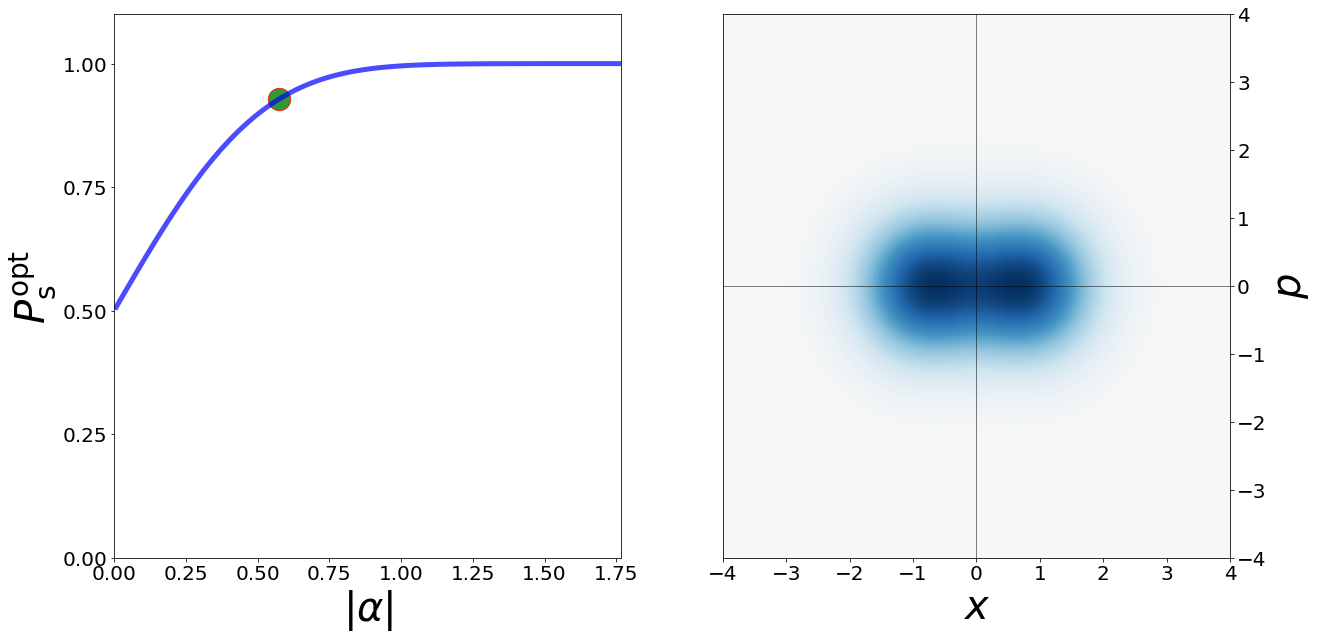

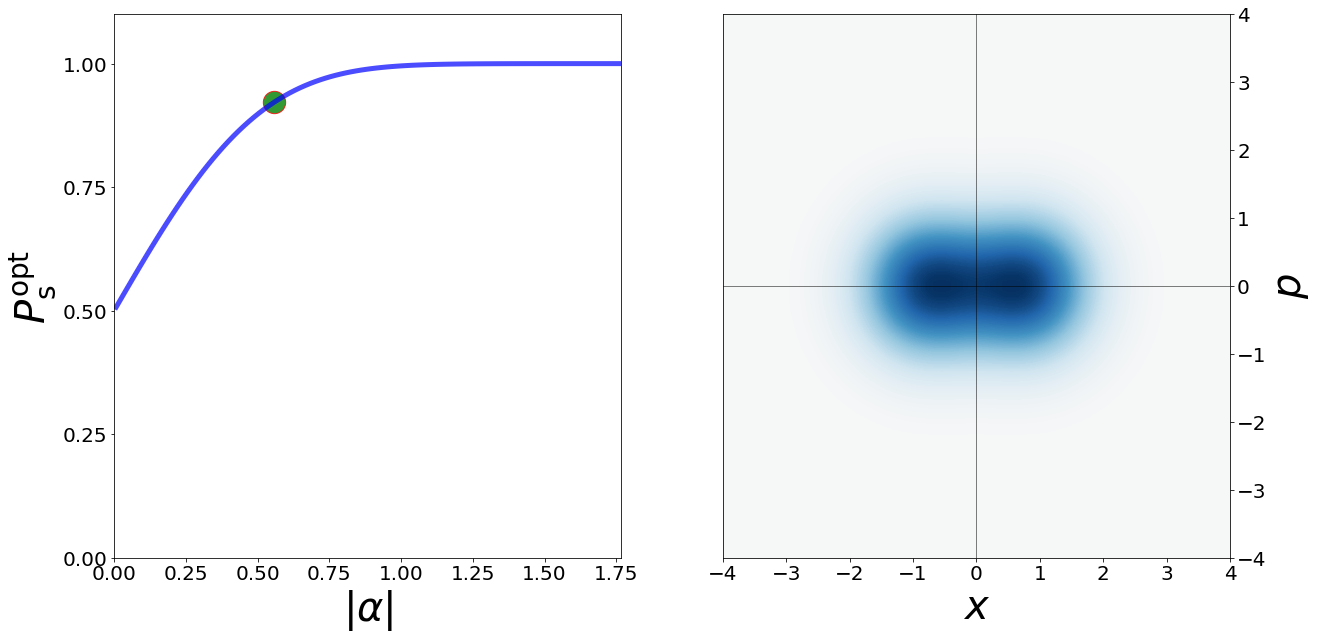

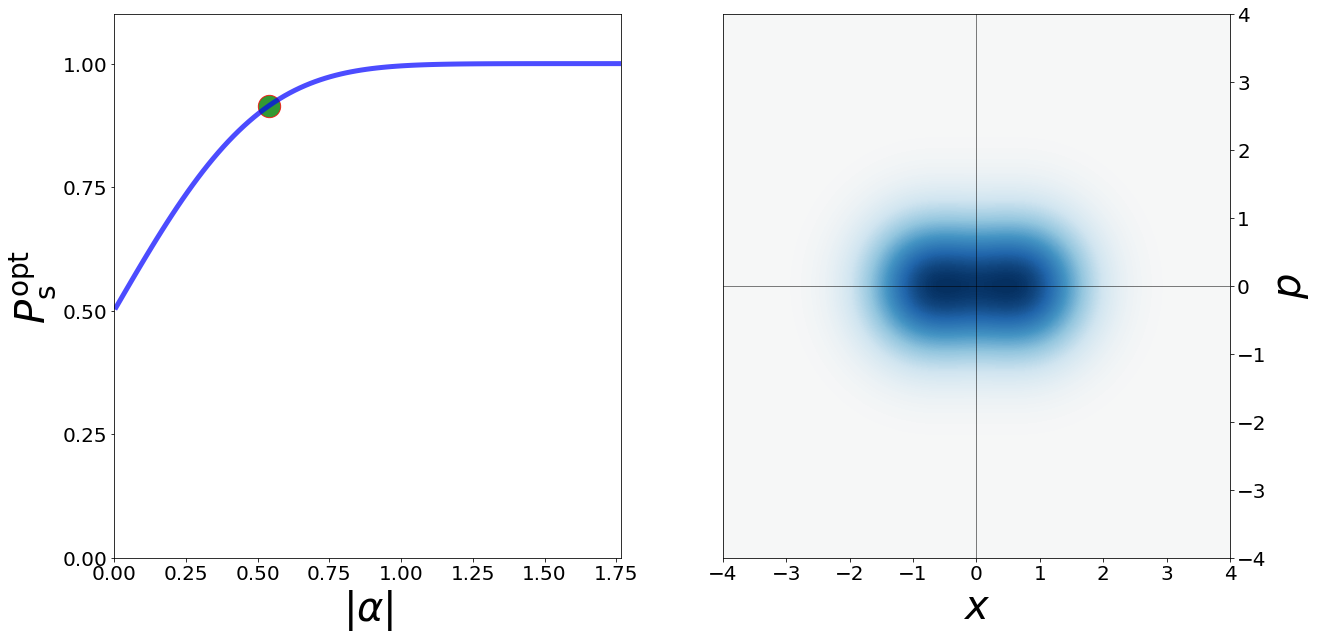

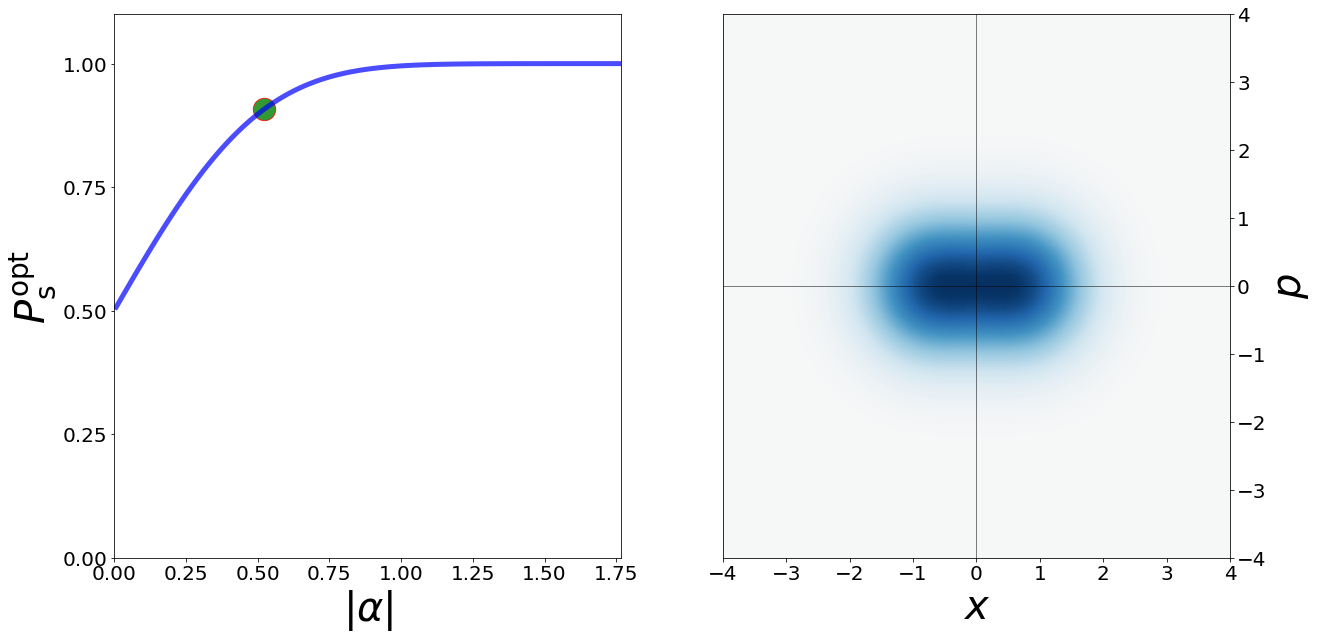

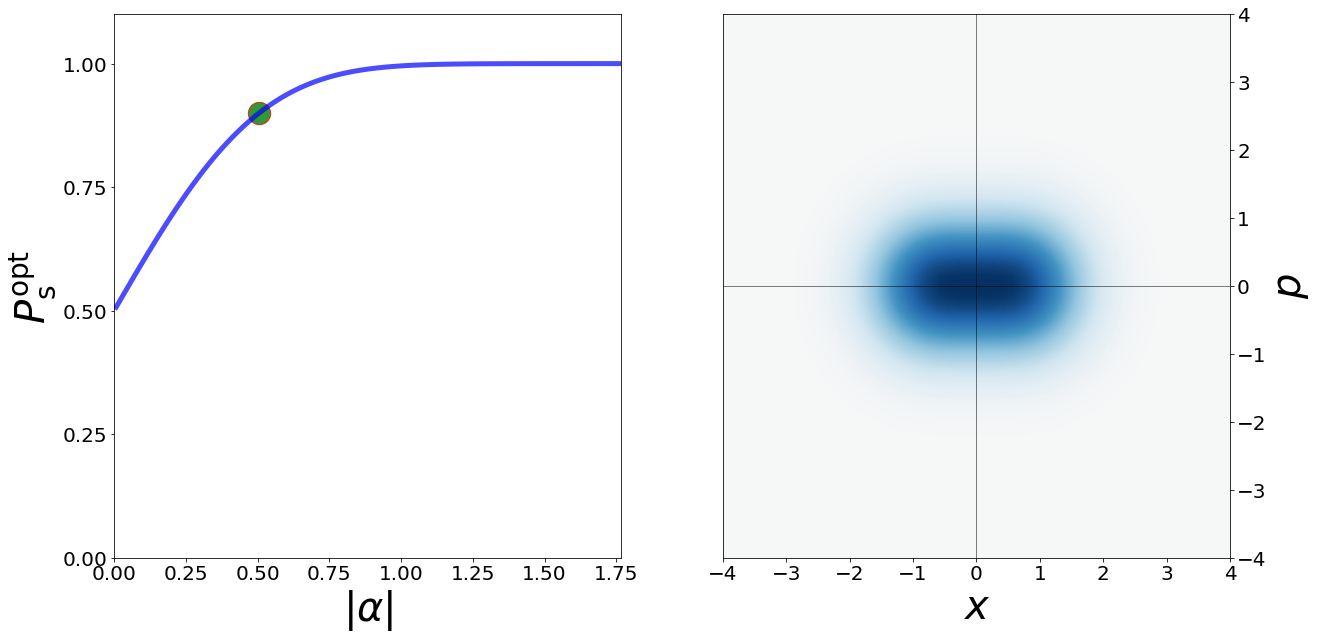

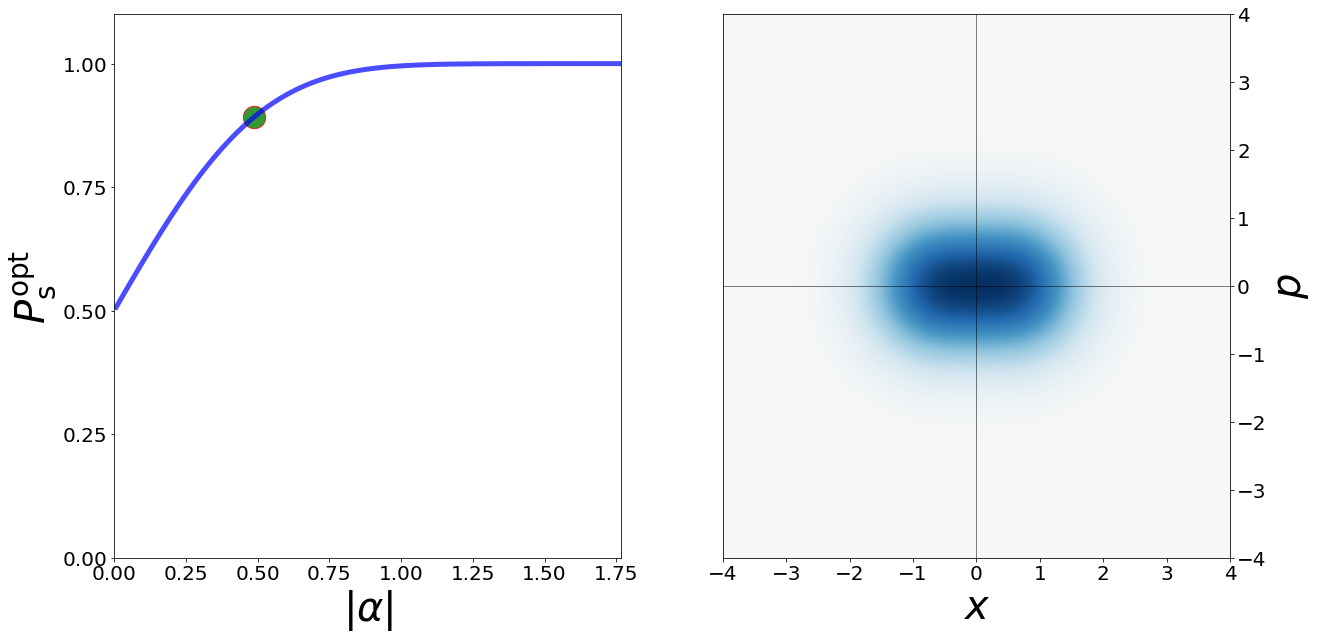

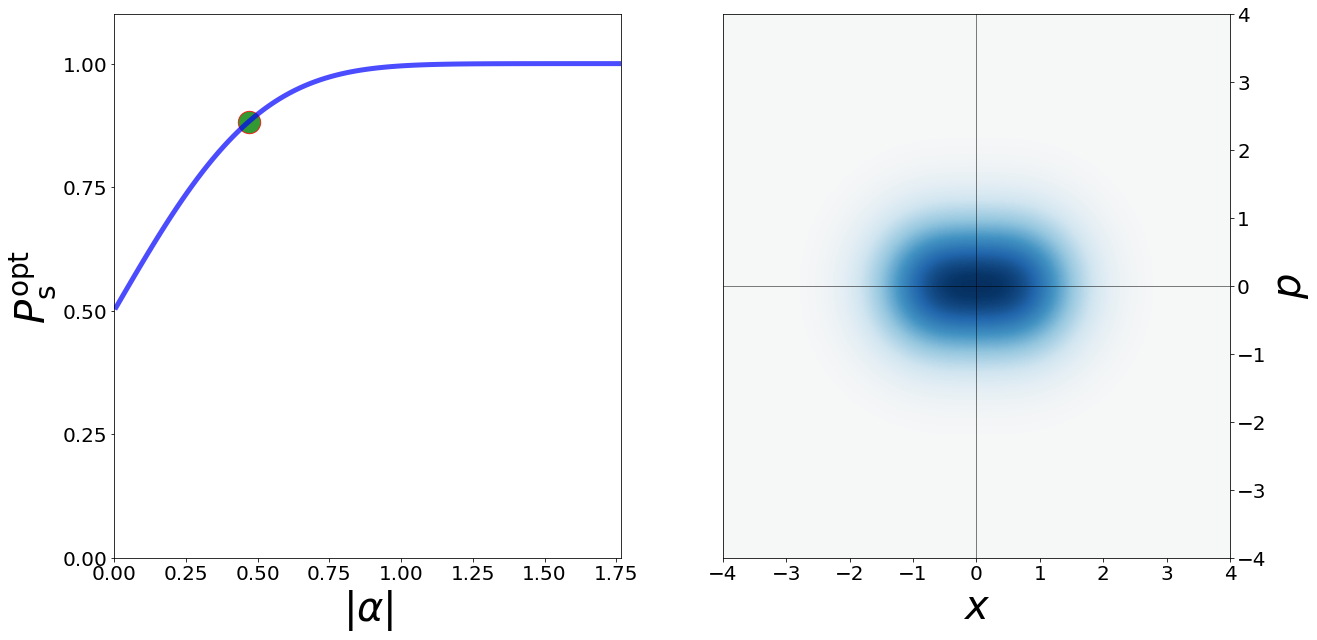

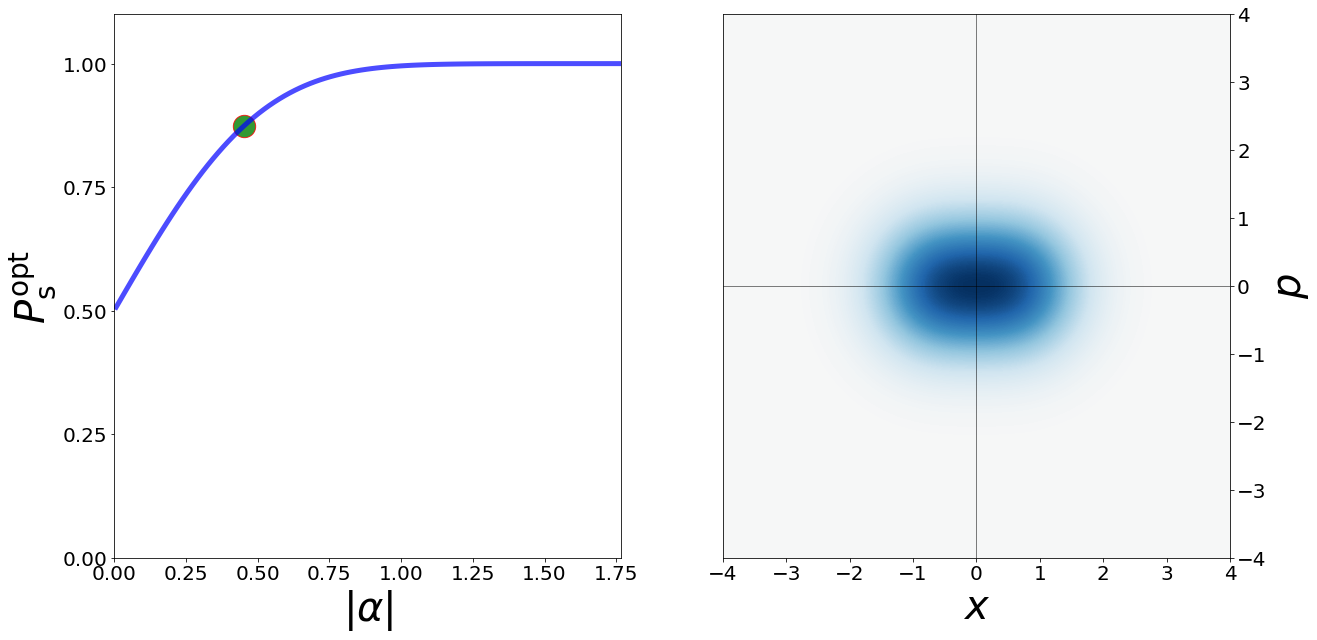

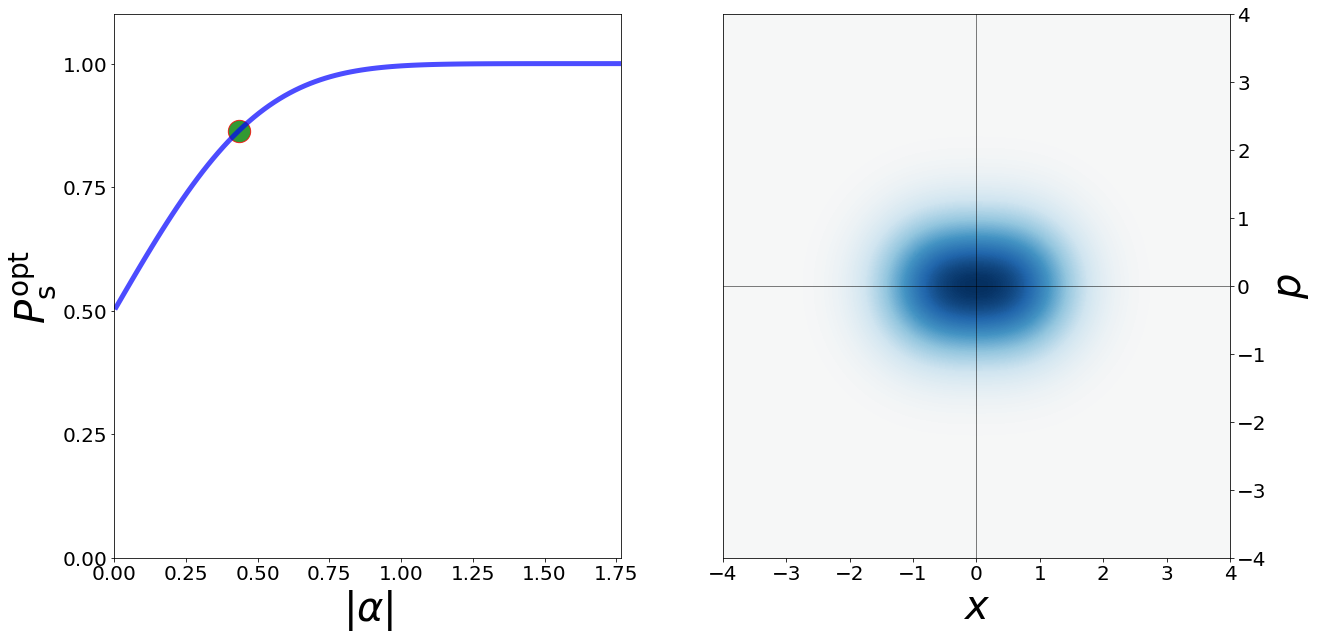

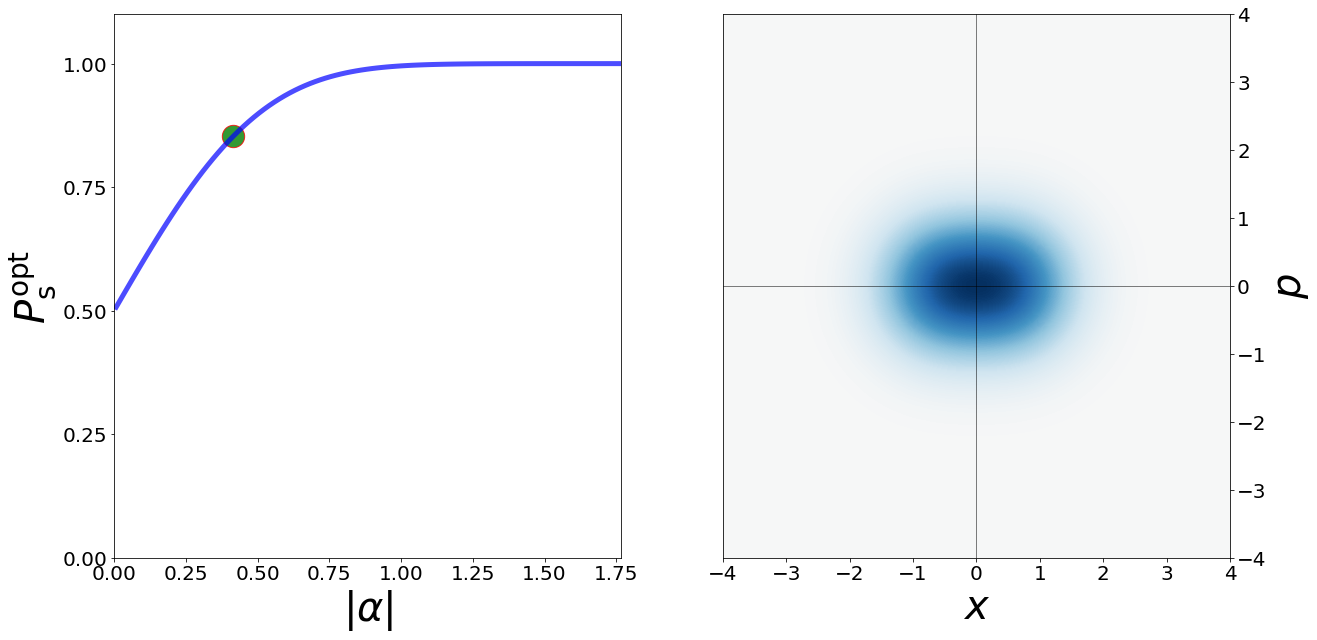

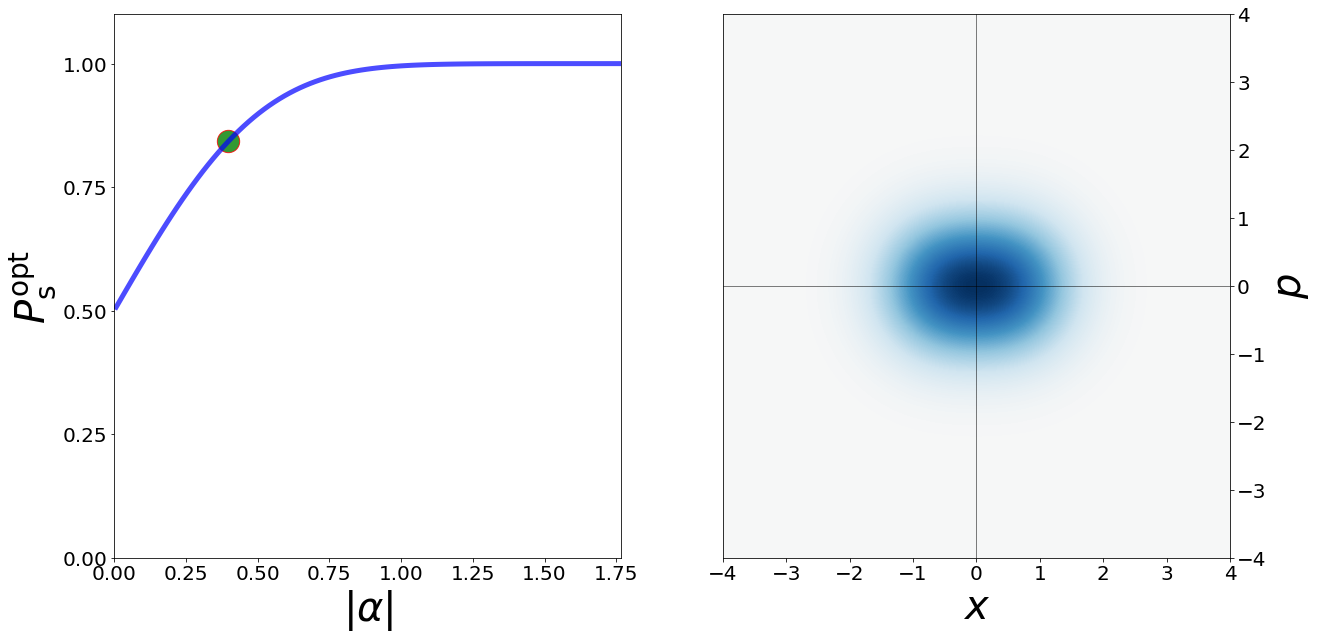

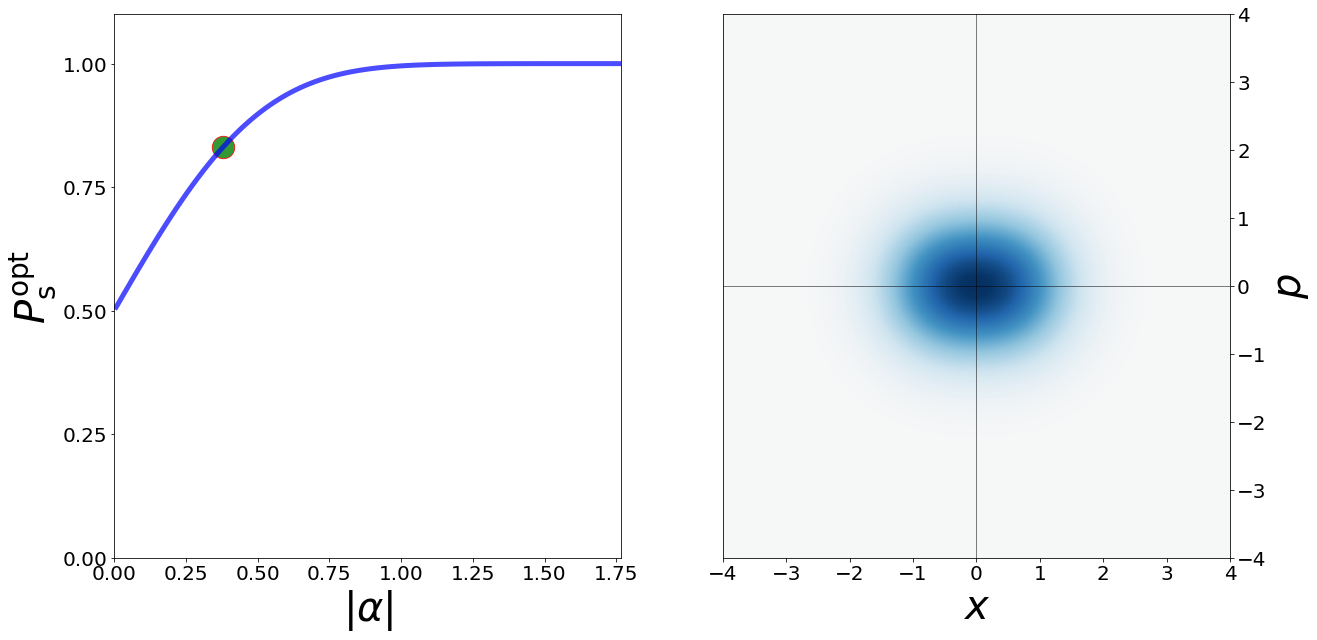

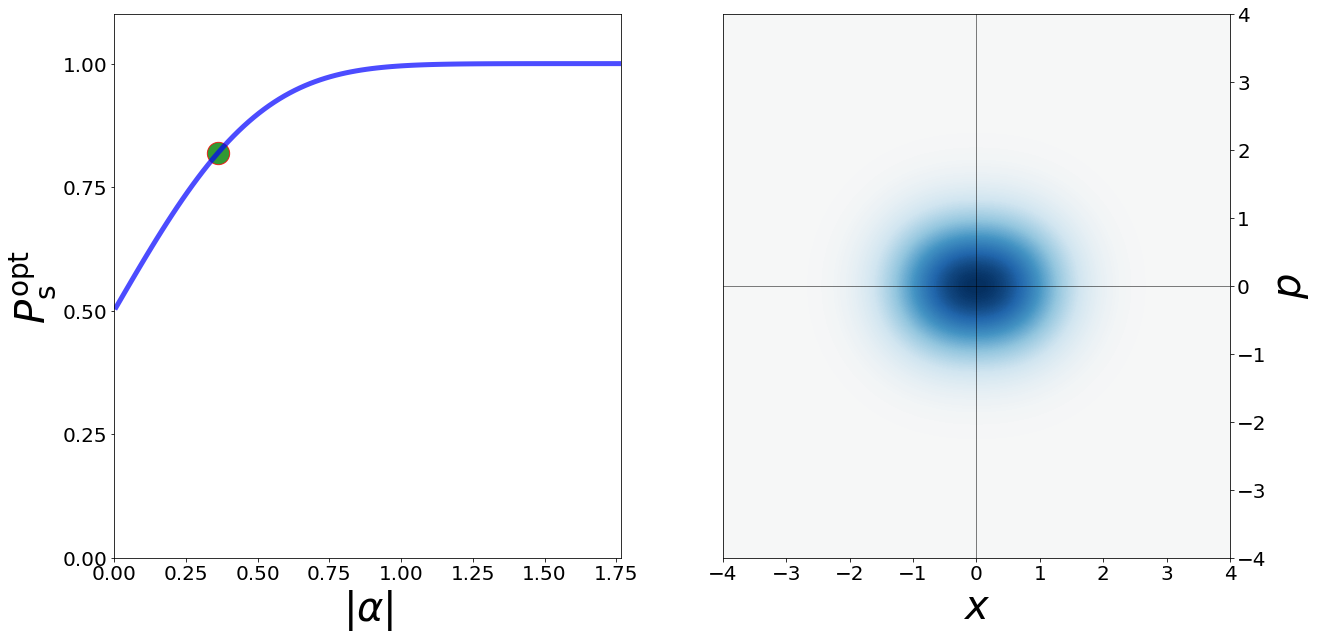

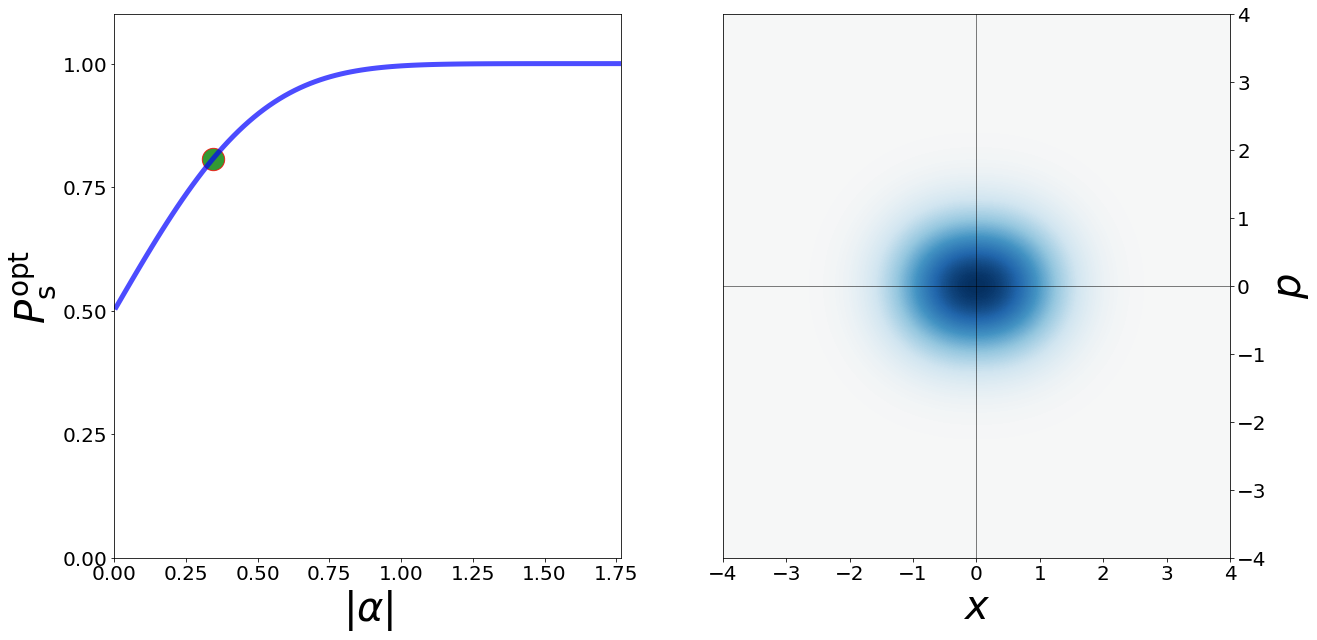

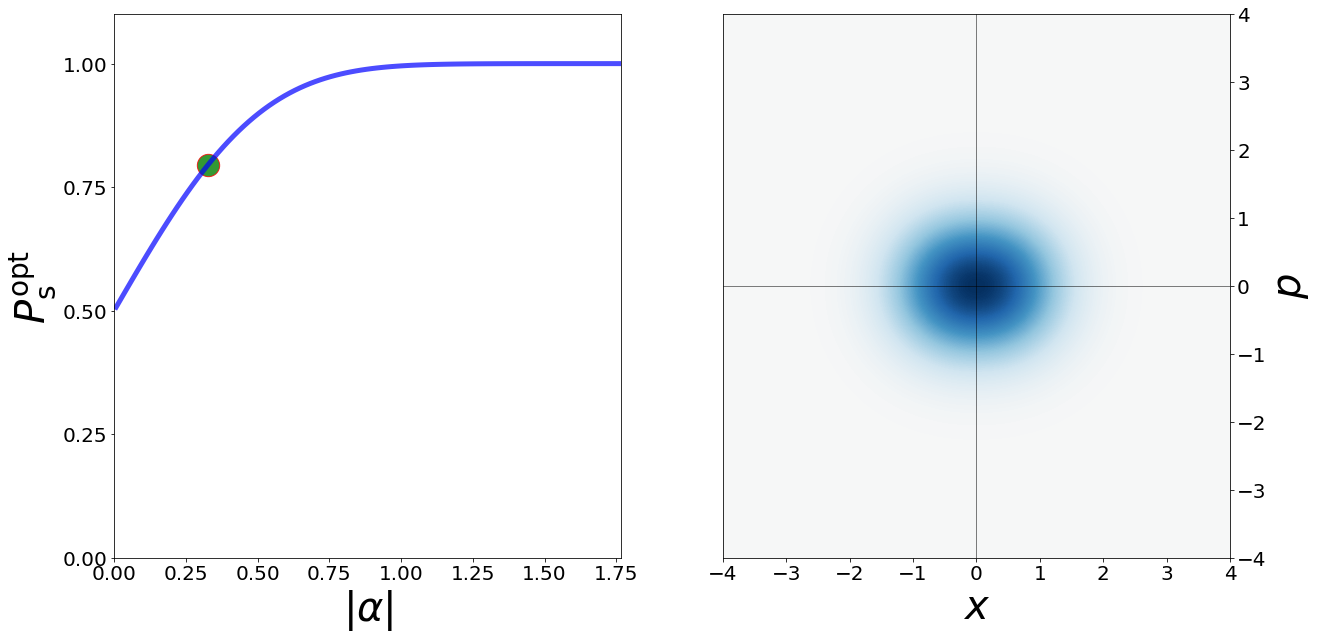

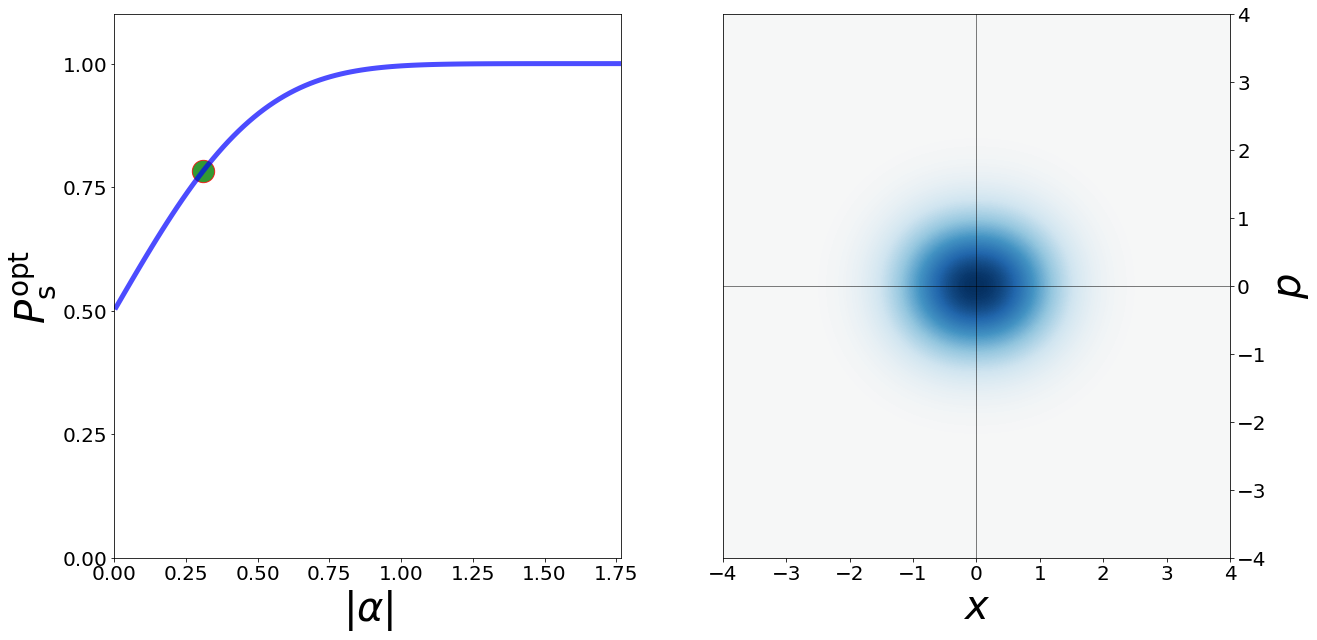

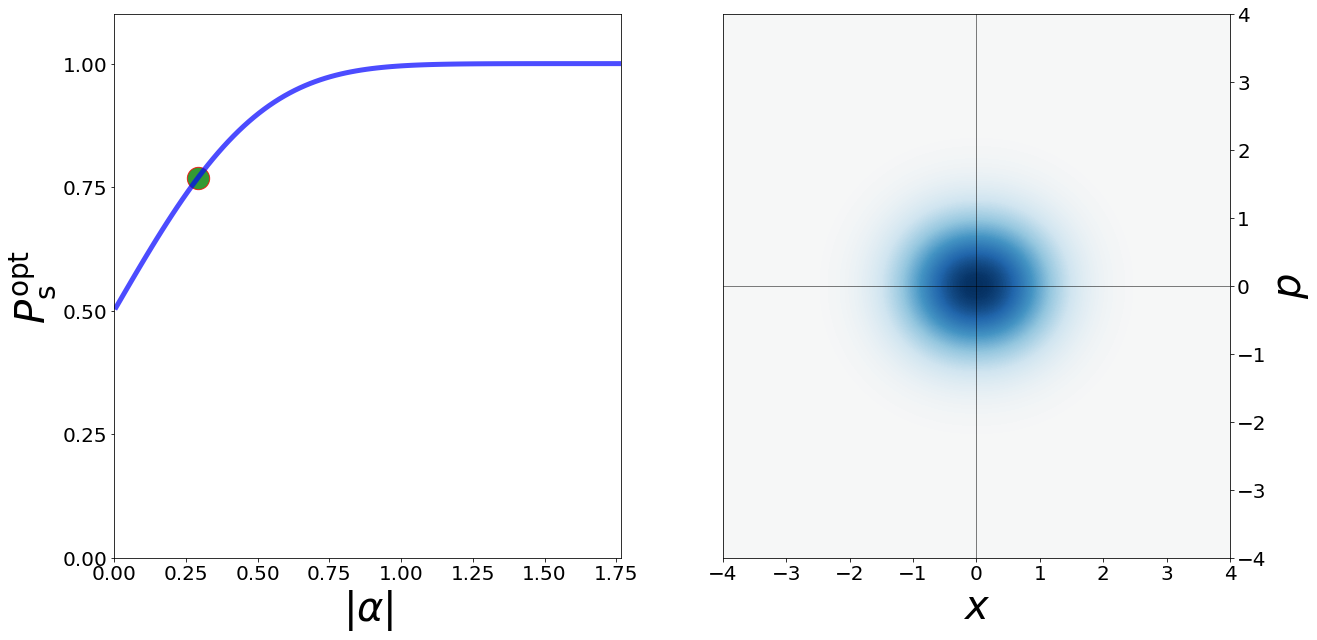

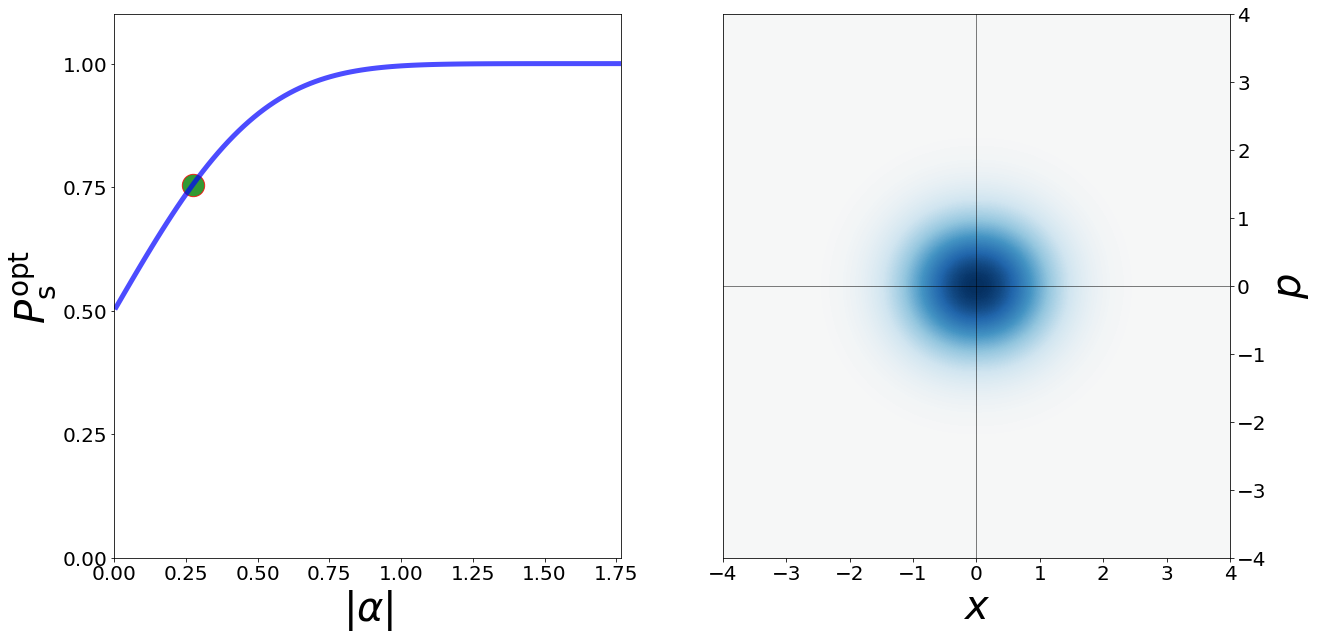

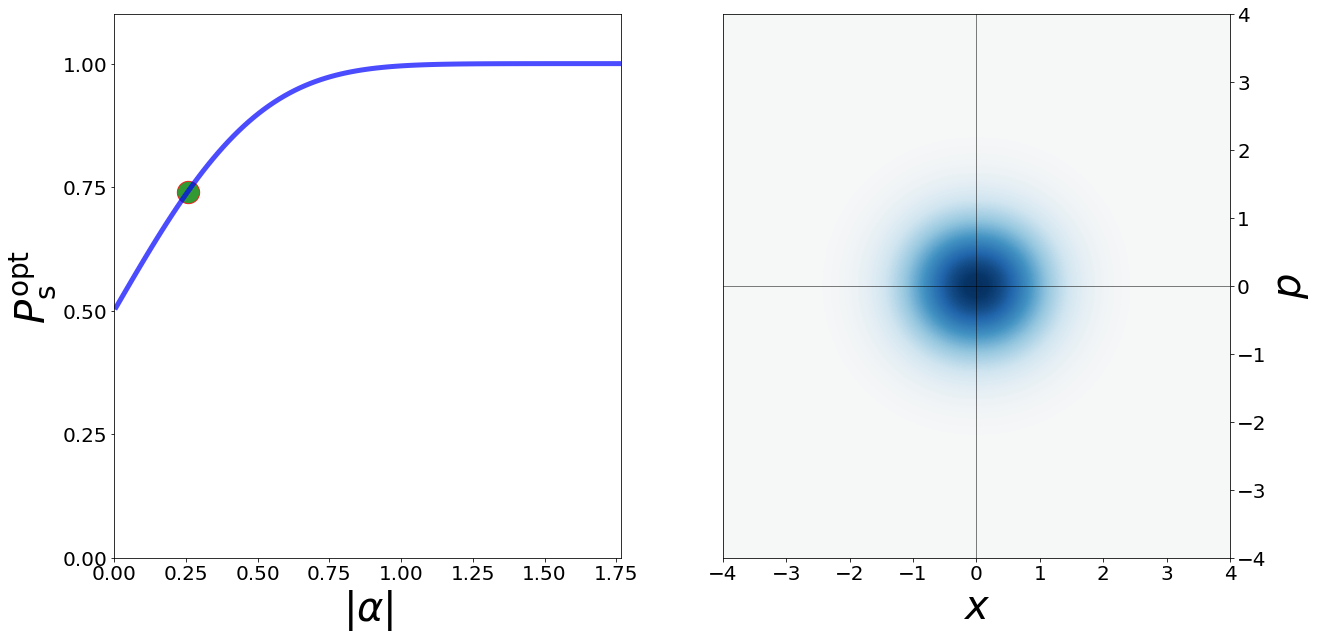

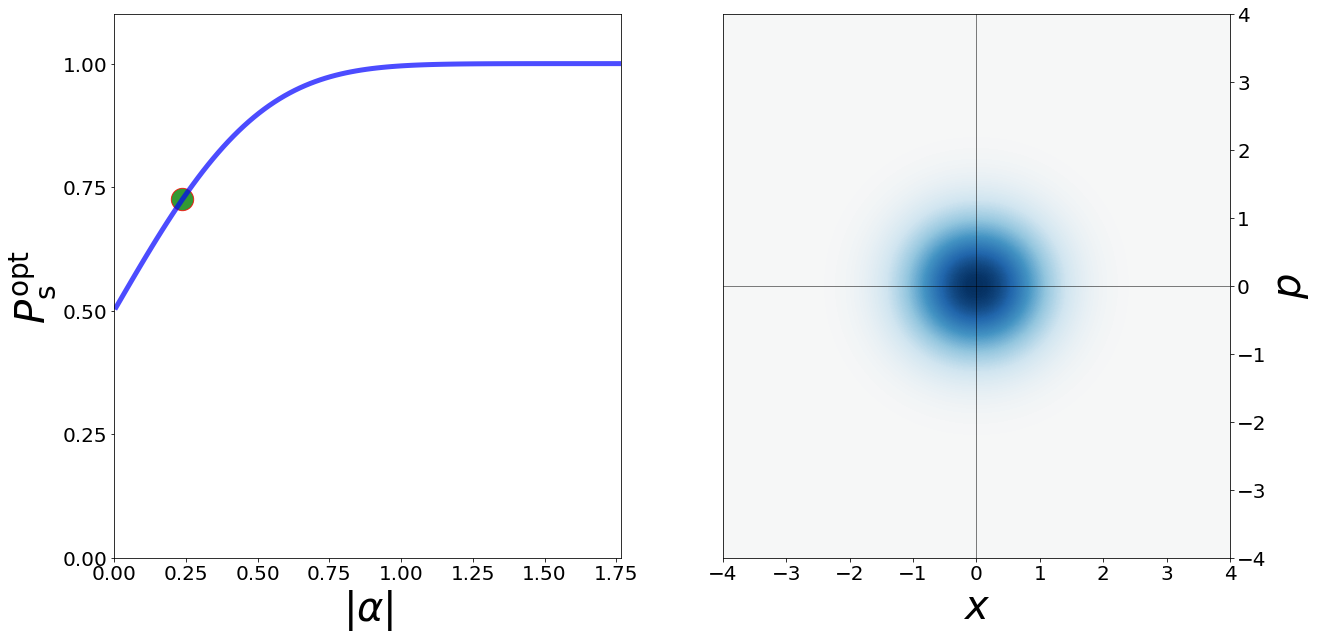

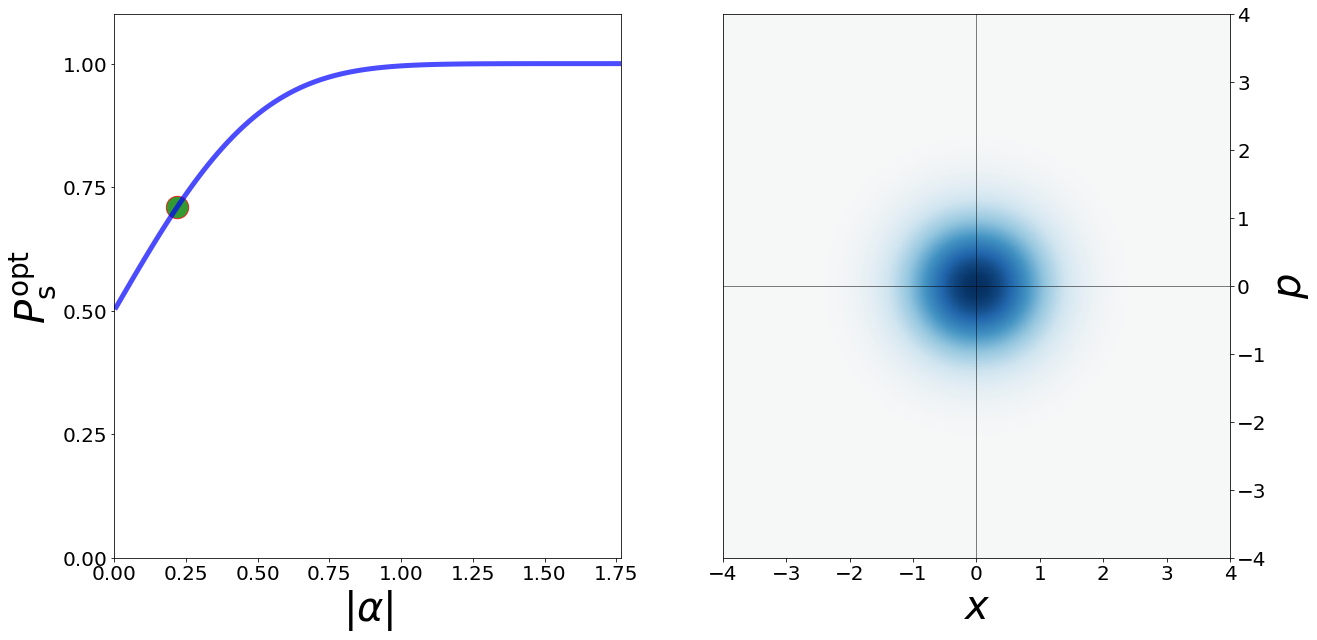

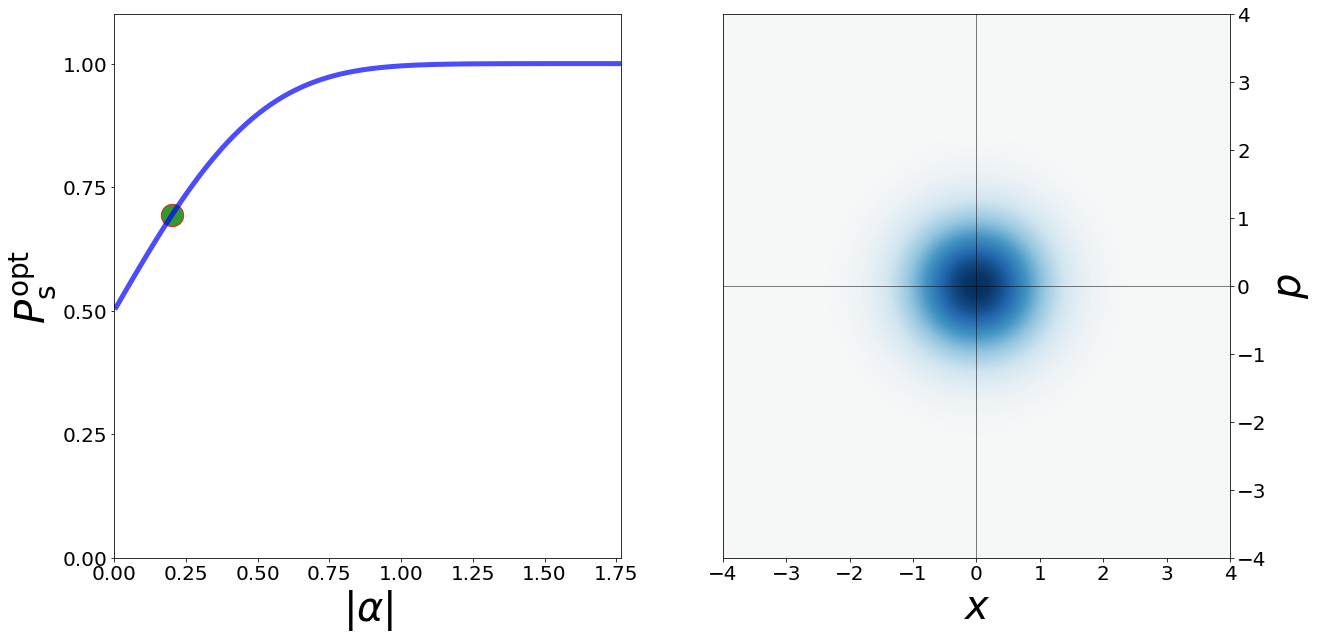

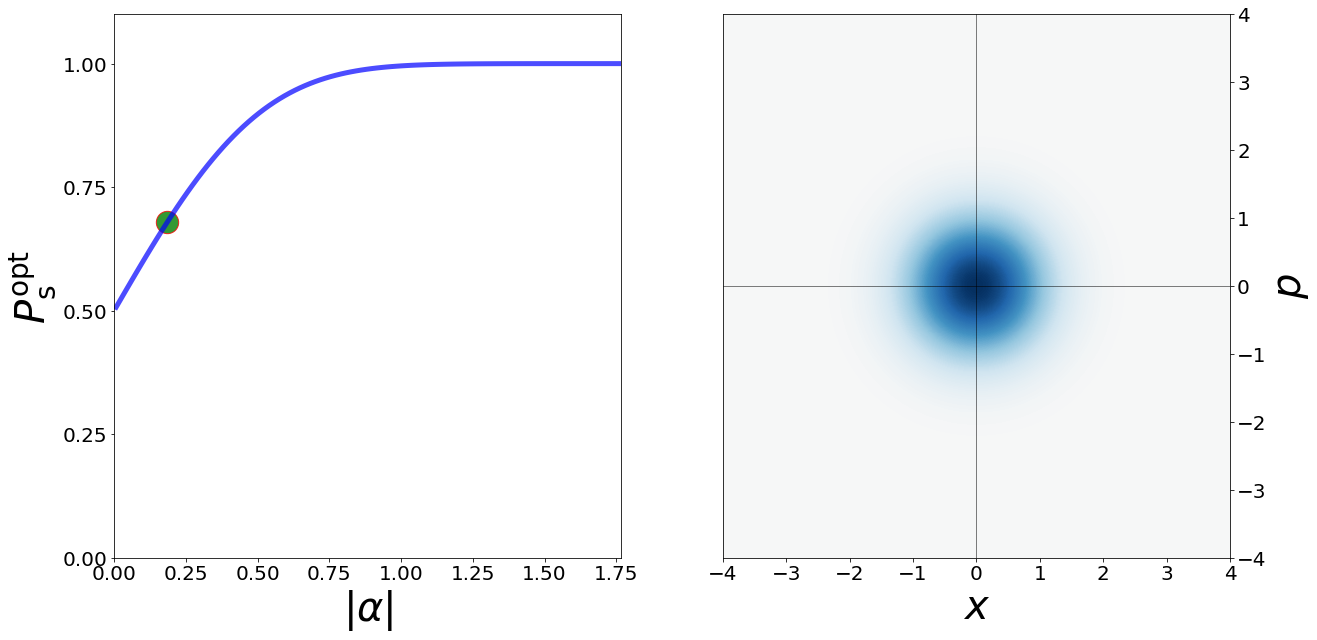

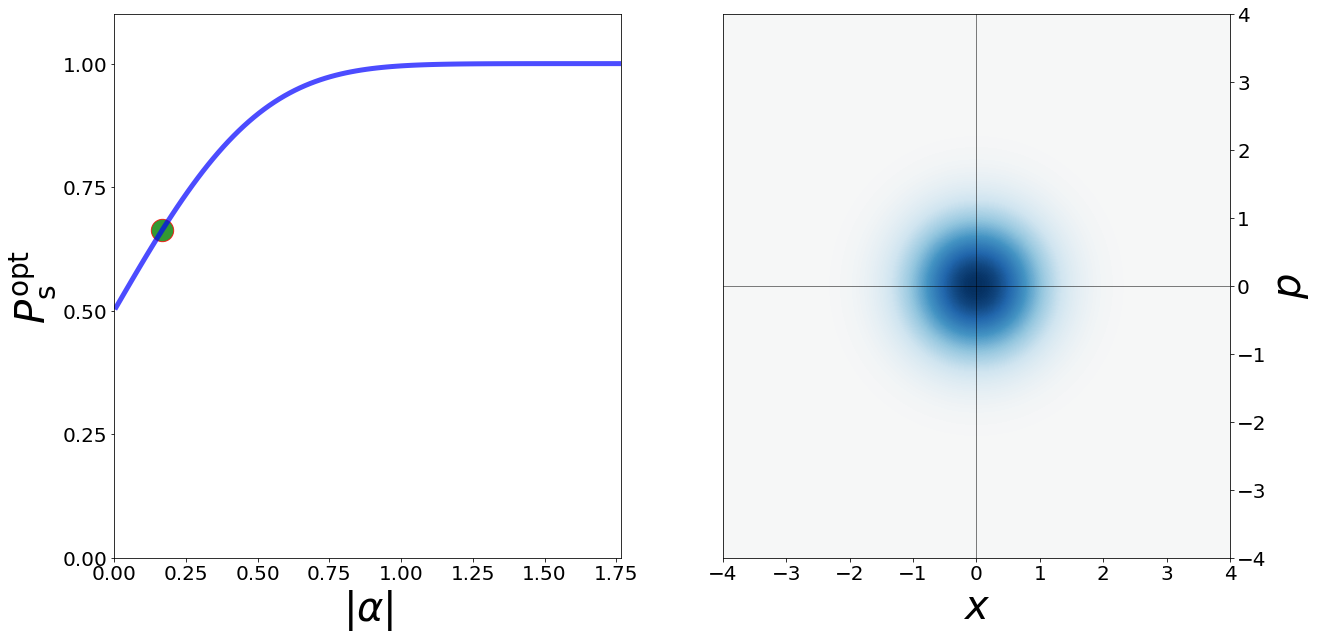

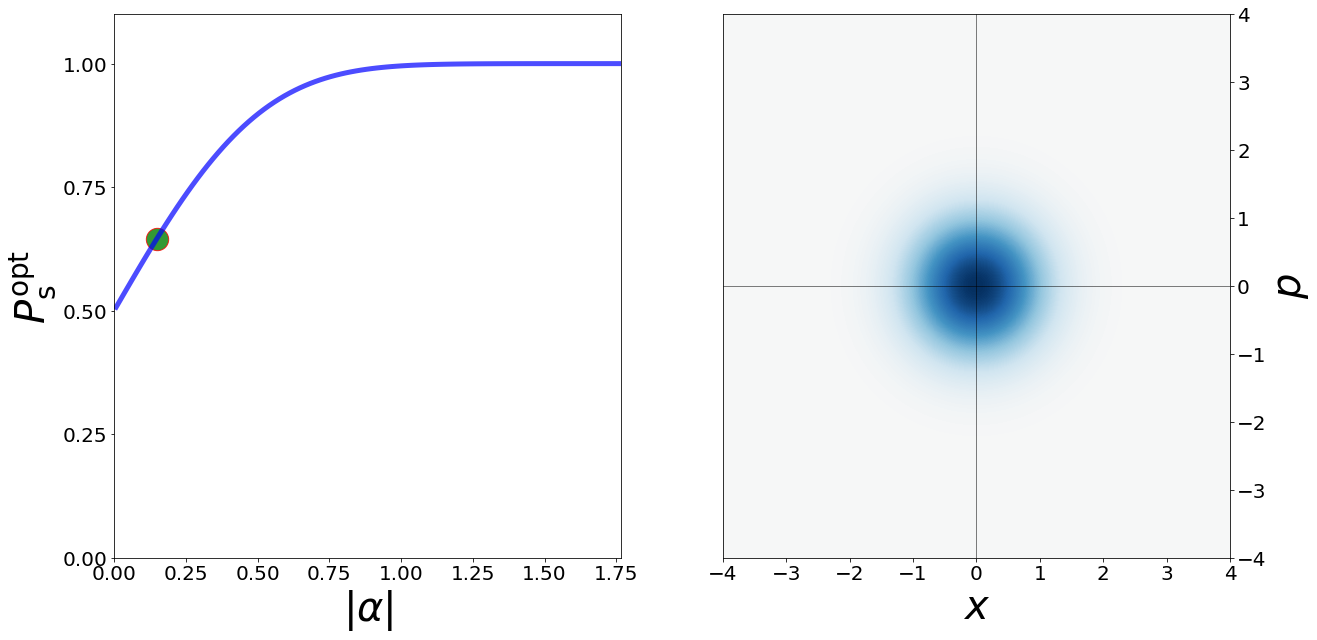

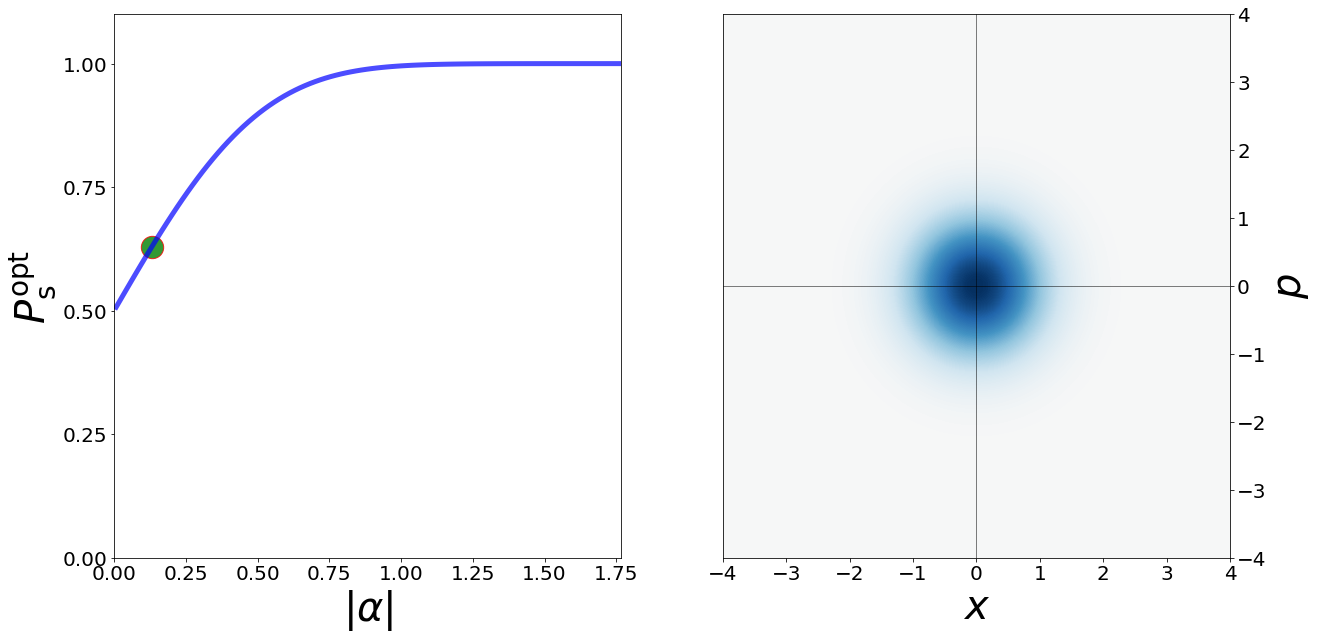

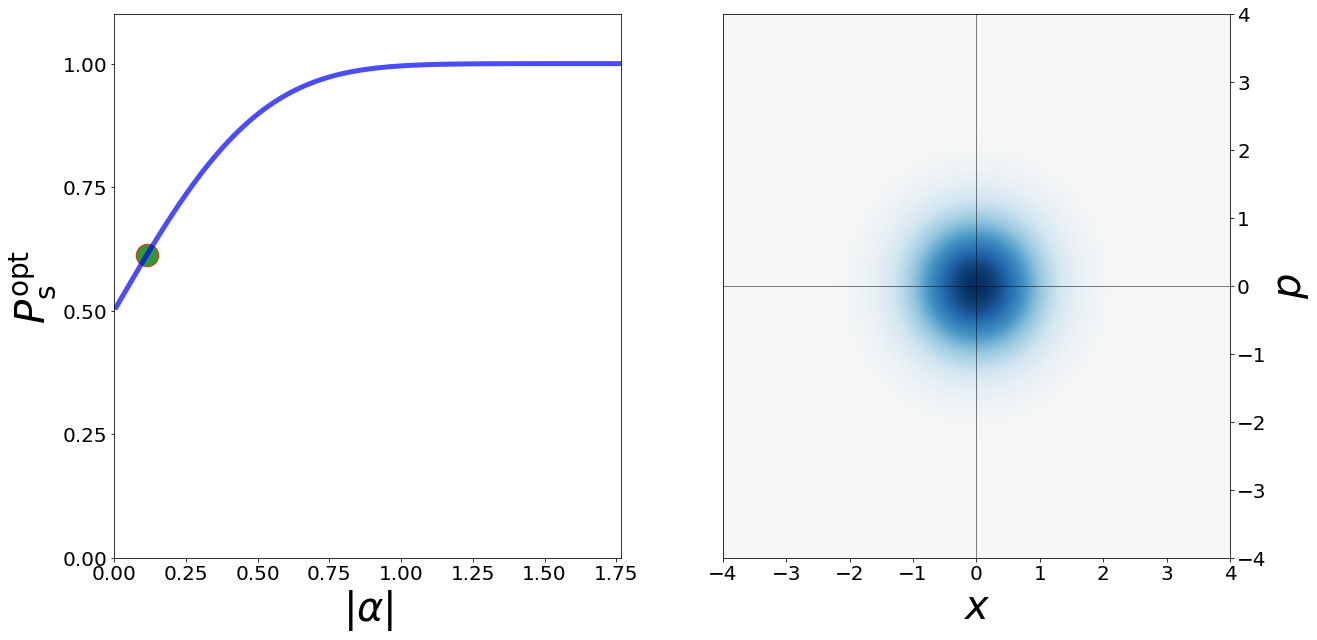

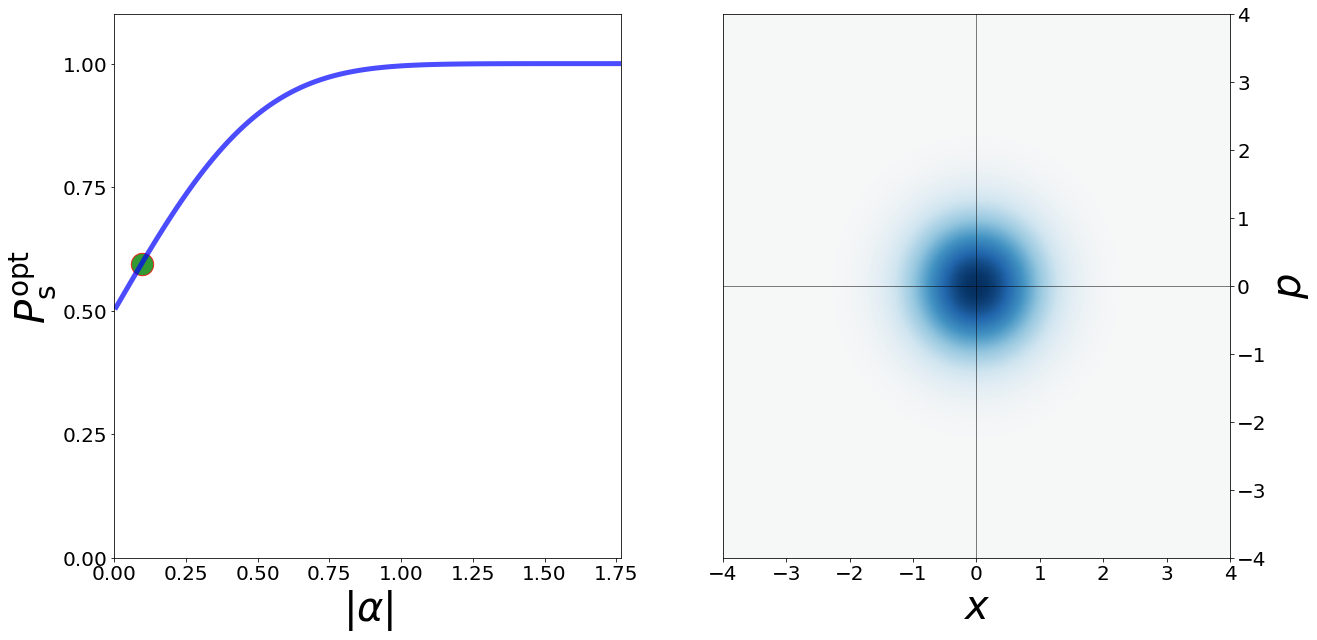

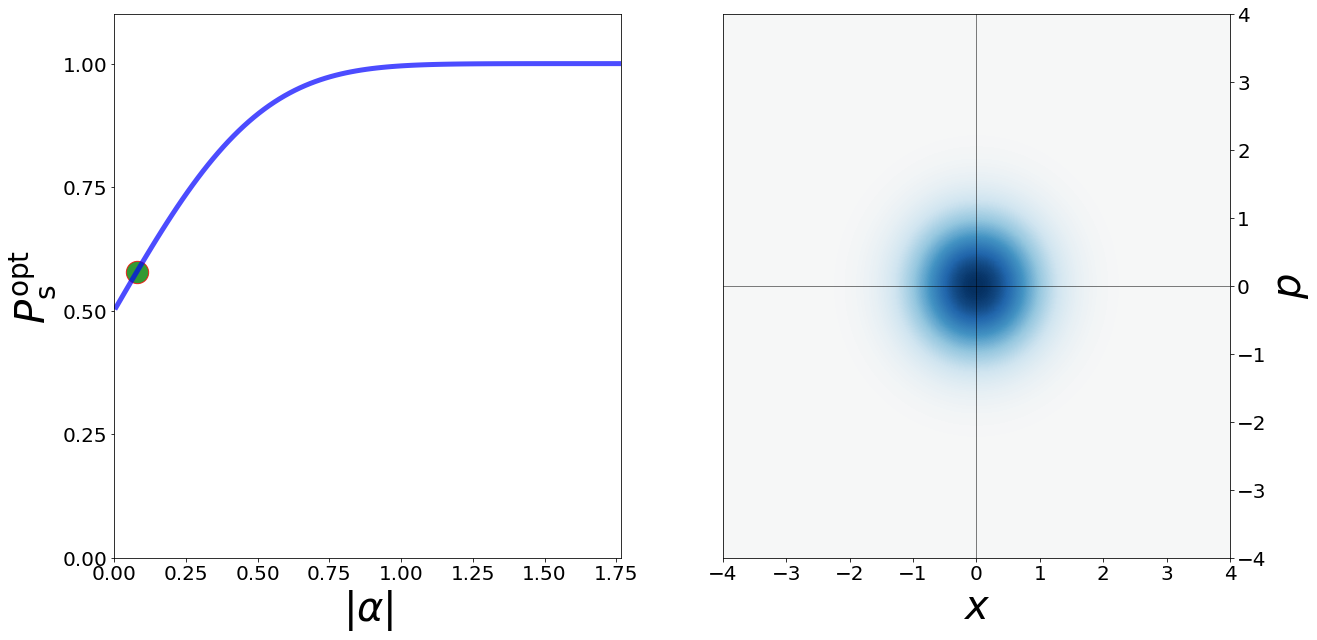

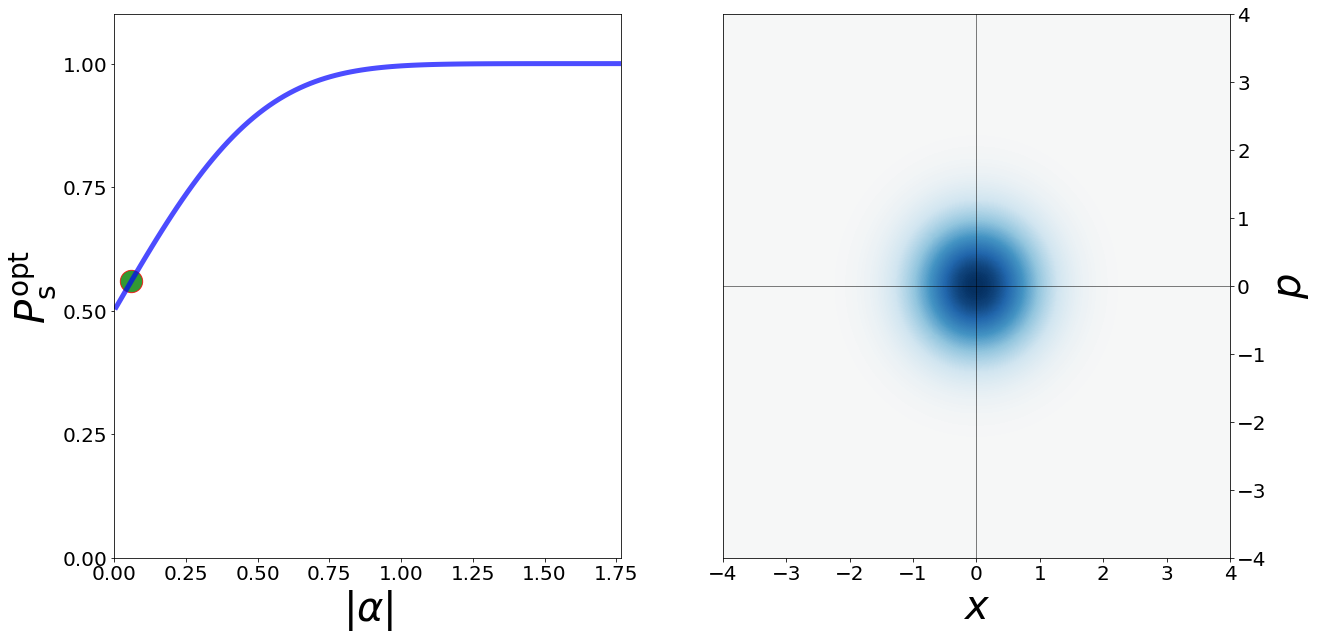

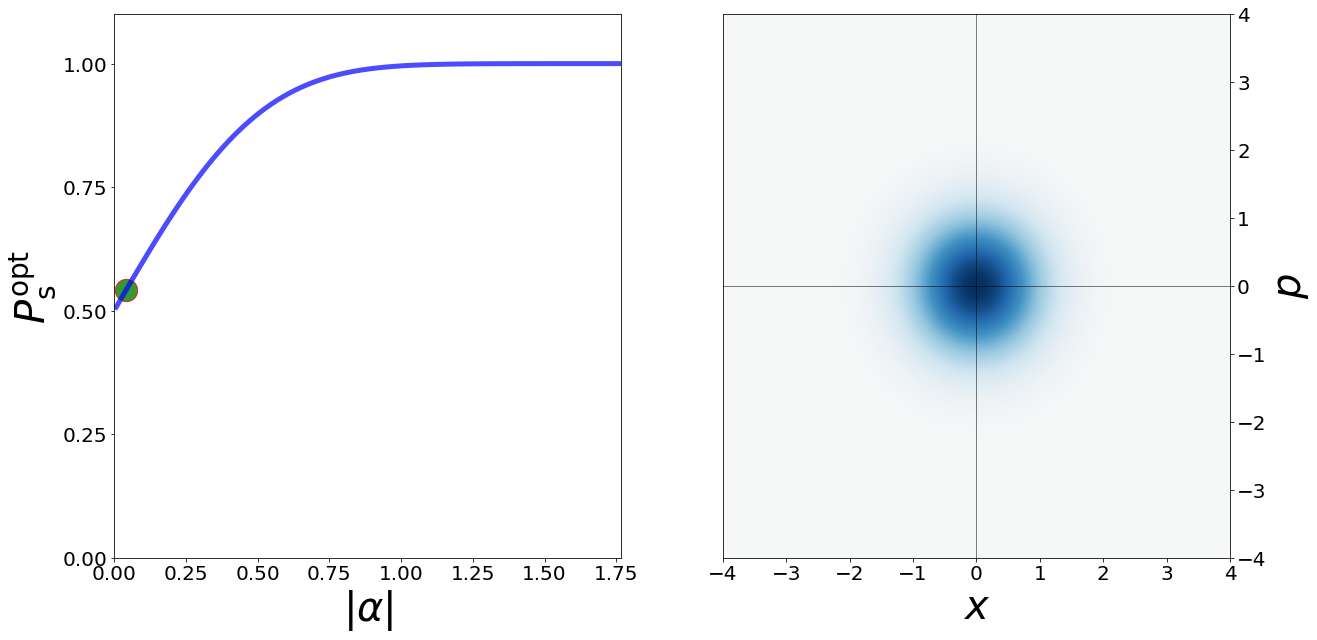

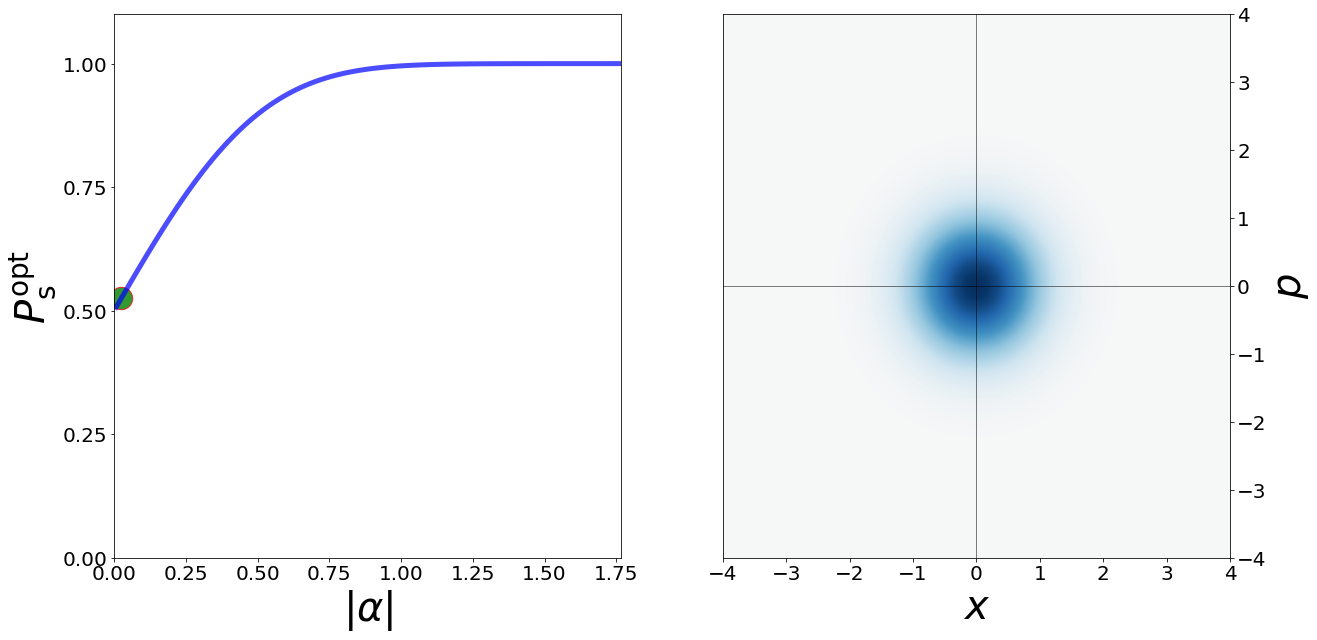

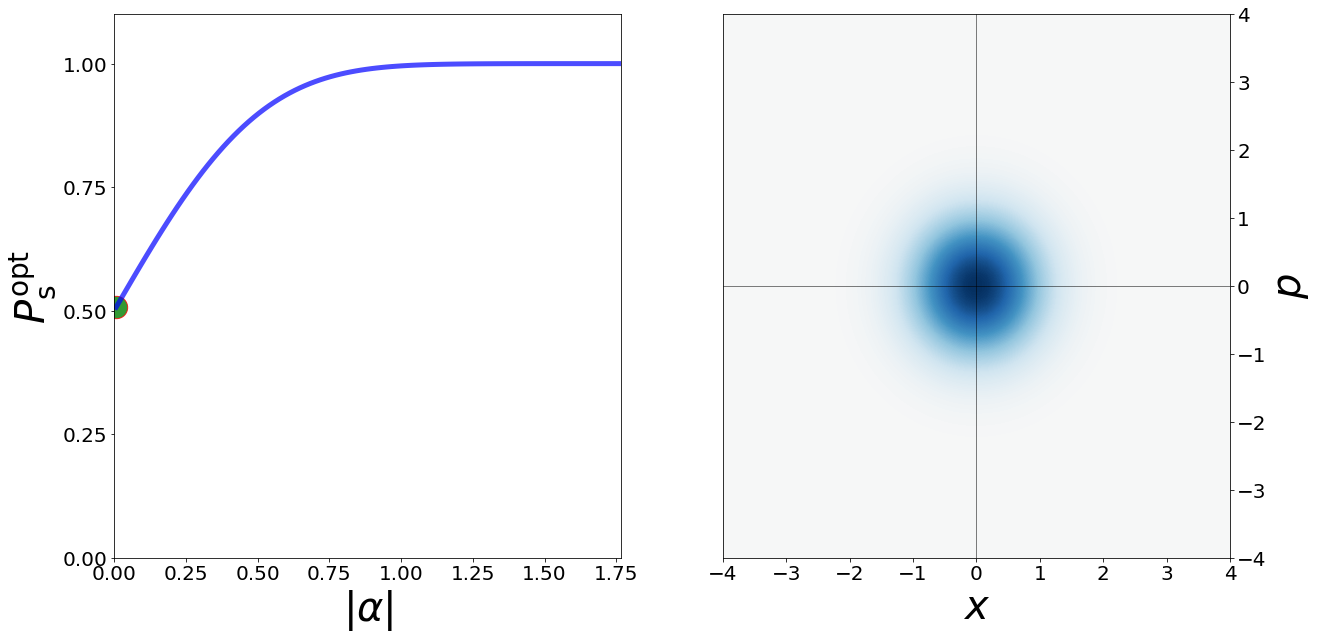

In [98]:
def hel(a):
    return (1+ np.sqrt(1-np.exp(-4*a**2)))/2

xvec = np.linspace(-5,5,100)
at = 1e-2

for ind,a in tqdm(enumerate(amps[:-3][::-1])):

    N = 100
    rho1 = coherent_dm(N, a)
    rho2 = coherent_dm(N, -a)

    rho1at = coherent_dm(N, np.sqrt(at)*a)
    rho2at = coherent_dm(N, -np.sqrt(at)*a)

    rhoin = (rho1+rho2)/2
    rhoout = (rho1 + rho2 + rho2at + rho1at)/4
    wigner_in = wigner(rhoin,xvec,xvec)
    wigner_out = wigner(rhoout, xvec, xvec)



    fig=plt.figure(figsize=(20,10))
    ax1 = plt.subplot2grid((1,2),(0,0))
    ax2 = plt.subplot2grid((1,2),(0,1))

    ls=40
    lw=5
    ax1.plot(amps, [hel(am) for am in amps], linewidth=lw, color="blue",alpha=0.7)
    ax1.scatter(amps[amps==a], [hel(a)], s=500, color="red", alpha=0.8, facecolors='green', edgecolors='r')
    im1 = ax2.contourf(xvec, xvec, np.round(wigner_in,6), 400, cmap=cm.RdBu, norm= mpl.colors.Normalize(-wigner_in.max(), wigner_in.max()))
    #fig.colorbar(im1,fraction=0.046, pad=0.04)
    for ax in [ax1]:

        st=.25
        ax.set_xticks(np.arange(0,max(amps)+st,st))
        st=.25
        ax.set_yticks(np.arange(0,1+st,st))    
        ax.set_ylabel(r'$P_{\rm s}^{\rm opt}$',size=ls)
        ax.set_xlabel(r'$|\alpha|$',size=ls)    
        ax.tick_params(axis='both', which='major', labelsize=20)
        ax.set_xlim([0,max(amps)])
        ax.set_ylim([0,1.1])
    for ax in [ax2]:
        Lx=4
        Ly=4
        l=0.5
        ax.set_xlim([-Lx,Lx])
        ax.set_ylim([-Ly,Ly])
        ax.axvline(lw=l,color="black")
        ax.axhline(lw=l,color="black")
        st=1
        ax.set_xticks(np.arange(-Lx,Lx+st,st))
        ax.set_yticks(np.arange(-Ly,Ly+st,st))    
        ax.set_xlabel(r'$x$',size=ls)
        ax.set_ylabel(r'$p$',size=ls)
        ax.yaxis.tick_right()
        ax.yaxis.set_label_position("right")
        ax.tick_params(axis='both', which='major', labelsize=20)
        #ax.set_title(r'$\alpha$'+"="+str(np.round(a,2)),size=ls)
    plt.savefig("wignerGIF/{}.png".format(ind))    

In [40]:
amps = np.arange(.01,10,.1)/np.sqrt(2)

In [41]:
amps[amps==a]

array([0.00707107])

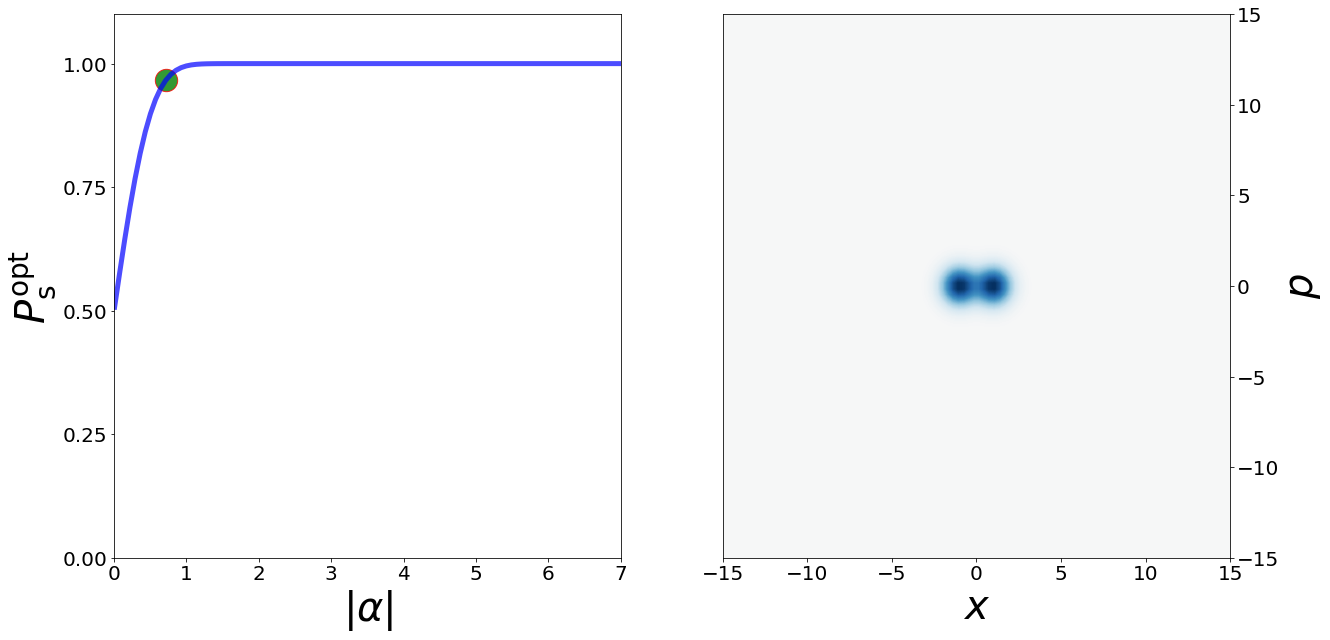

In [64]:
amps = np.arange(.01,10,.1)/np.sqrt(2)
def hel(a):
    return (1+ np.sqrt(1-np.exp(-4*a**2)))/2

xvec = np.linspace(-15,15,100)
at = 1e-2
#a = xcen/np.sqrt(2)
a=amps[10]
N = 100
rho1 = coherent_dm(N, a)
rho2 = coherent_dm(N, -a)

rho1at = coherent_dm(N, np.sqrt(at)*a)
rho2at = coherent_dm(N, -np.sqrt(at)*a)

rhoin = (rho1+rho2)/2
rhoout = (rho1 + rho2 + rho2at + rho1at)/4
wigner_in = wigner(rhoin,xvec,xvec)
wigner_out = wigner(rhoout, xvec, xvec)



fig=plt.figure(figsize=(20,10))
ax1 = plt.subplot2grid((1,2),(0,0))
ax2 = plt.subplot2grid((1,2),(0,1))

ls=40
lw=5
ax1.plot(amps, [hel(am) for am in amps], linewidth=lw, color="blue",alpha=0.7)
ax1.scatter(amps[amps==a], [hel(a)], s=500, color="red", alpha=0.8, facecolors='green', edgecolors='r')
im1 = ax2.contourf(xvec, xvec, np.round(wigner_in,6), 400, cmap=cm.RdBu, norm= mpl.colors.Normalize(-wigner_in.max(), wigner_in.max()))
#fig.colorbar(im1,fraction=0.046, pad=0.04)
for ax in [ax1]:
 
    st=1
    ax.set_xticks(np.arange(0,max(amps)+st,st))
    st=.25
    ax.set_yticks(np.arange(0,1+st,st))    
    ax.set_ylabel(r'$P_{\rm s}^{\rm opt}$',size=ls)
    ax.set_xlabel(r'$|\alpha|$',size=ls)    
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_xlim([0,max(amps)])
    ax.set_ylim([0,1.1])
for ax in [ax2]:
    Lx=15
    Ly=15
    ax.set_xlim([-Lx,Lx])
    ax.set_ylim([-Ly,Ly])
    st=5
    ax.set_xticks(np.arange(-15,15+st,st))
    ax.set_yticks(np.arange(-15,15+st,st))    
    ax.set_xlabel(r'$x$',size=ls)
    ax.set_ylabel(r'$p$',size=ls)
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position("right")
    ax.tick_params(axis='both', which='major', labelsize=20)
    #ax.set_title(r'$\alpha$'+"="+str(np.round(a,2)),size=ls)

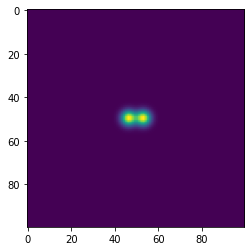

In [60]:
plt.imshow(np.round(wigner_in, 6))

In [ ]:

fig=plt.figure(figsize=(22,10))
ax1, ax2 = [plt.subplot2grid((1,2),(0,k)) for k in range(2)]

im1 = ax1.contourf(xvec, xvec, wigner_in, 100, cmap=cm.RdBu, norm= mpl.colors.Normalize(-wigner_in.max(), wigner_in.max()))
im2 = ax2.contourf(xvec, xvec, wigner_out, 100, cmap=cm.RdBu, norm= mpl.colors.Normalize(-wigner_out.max(), wigner_out.max()))
#ax1.set_xticks(np.arange(-10,10,1))
fig.colorbar(im1,fraction=0.046, pad=0.04)

for ax in [ax1,ax2]:
    Lx=15
    Ly=15
    ax.set_xlim([-Lx,Lx])
    ax.set_ylim([-Ly,Ly])
    st=3
    ax.set_xticks(np.arange(-15,15+st,st))
    ax.set_yticks(np.arange(-15,15+st,st))    
    

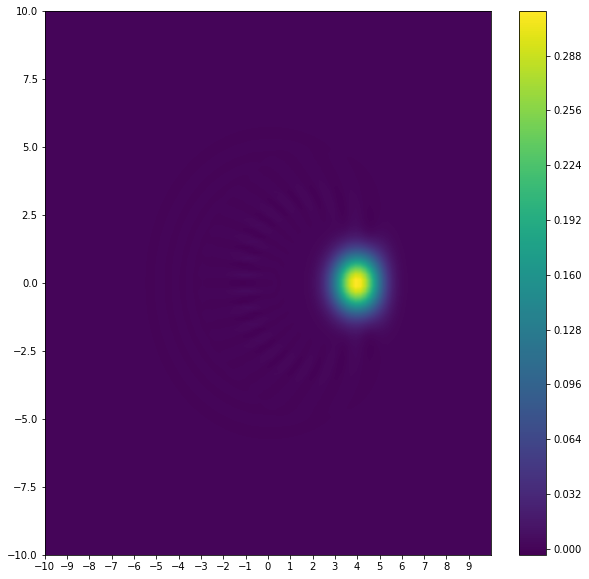

In [36]:
xvec = np.linspace(-10,10,100)

xcen=4
a = xcen/np.sqrt(2)
N = 20
rho_coherent = coherent_dm(N, a)
wigner_in = wigner(rho_coherent, xvec, xvec)

fig=plt.figure(figsize=(10,10))
ax1 = plt.subplot2grid((1,1),(0,0))
im = ax1.contourf(xvec, xvec, wigner_in, 1000)
ax1.set_xticks(np.arange(-10,10,1))
fig.colorbar(im)


(-10.0, 10.0)

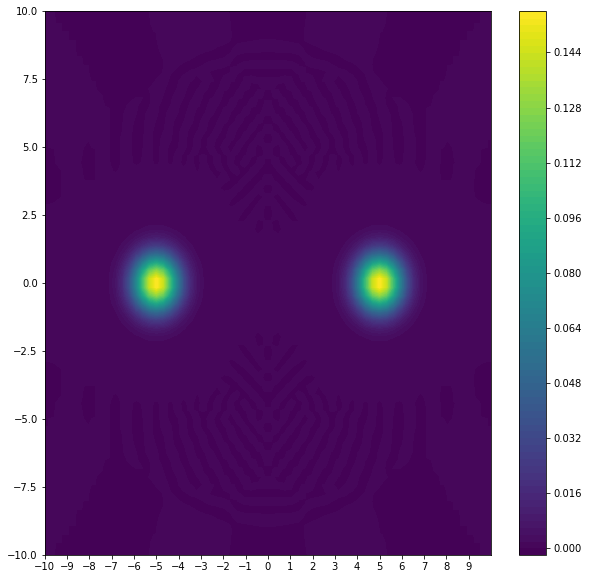

In [75]:
del rhoin, xvec, a, N, wigner_in, rho1, rho2

xvec = np.linspace(-15,15,100)

xcen=5
a = xcen/np.sqrt(2)
N = 50
rho1 = coherent_dm(N, a)
rho2 = coherent_dm(N, -a)

rhoin = (rho1+rho2)/2
wigner_in = wigner(rhoin, xvec, xvec)

fig=plt.figure(figsize=(10,10))
ax1 = plt.subplot2grid((1,1),(0,0))
im = ax1.contourf(xvec, xvec, wigner_in, 100)
ax1.set_xticks(np.arange(-10,10,1))
fig.colorbar(im)
Lx=10
Ly=10
ax1.set_xlim([-Lx,Lx])
ax1.set_ylim([-Ly,Ly])


In [86]:
xvec = np.linspace(-15,15,100)
at = 1e-2
xcen=10
a = xcen/np.sqrt(2)
N = 100
rho1 = coherent_dm(N, a)
rho2 = coherent_dm(N, -a)

rho1at = coherent_dm(N, np.sqrt(at)*a)
rho2at = coherent_dm(N, -np.sqrt(at)*a)

rhoin = (rho1+rho2)/2
rhoout = (rho1 + rho2 + rho2at + rho1at)/4
wigner_in = wigner(rhoin,xvec,xvec)
wigner_out = wigner(rhoout, xvec, xvec)


(-15.0, 15.0)

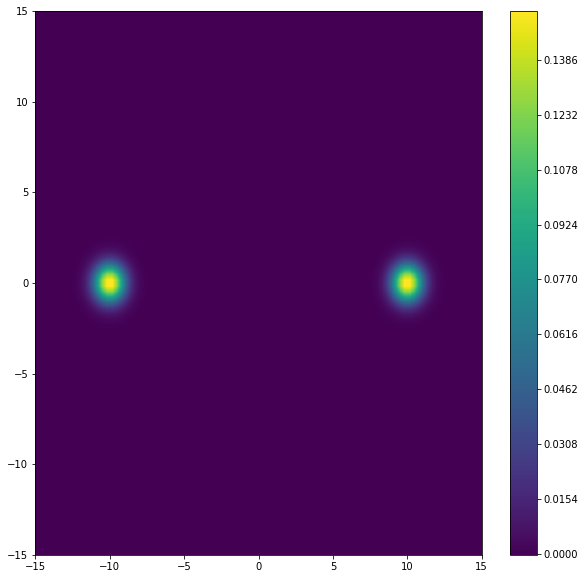

In [87]:

fig=plt.figure(figsize=(10,10))
ax1 = plt.subplot2grid((1,1),(0,0))
im = ax1.contourf(xvec, xvec, wigner_in, 1000)
#ax1.set_xticks(np.arange(-10,10,1))
fig.colorbar(im)
Lx=15
Ly=15
ax1.set_xlim([-Lx,Lx])
ax1.set_ylim([-Ly,Ly])



(-15.0, 15.0)

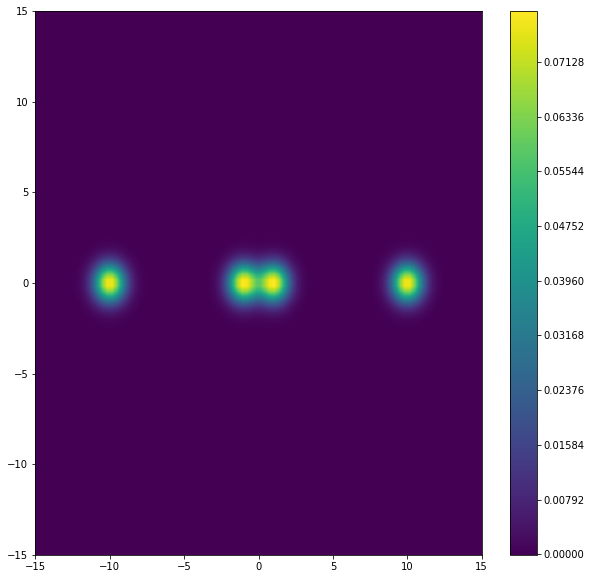

In [88]:
fig=plt.figure(figsize=(10,10))
ax1 = plt.subplot2grid((1,1),(0,0))
im = ax1.contourf(xvec, xvec, wigner_out, 1000)
#ax1.set_xticks(np.arange(-10,10,1))
fig.colorbar(im)
Lx=15
Ly=15
ax1.set_xlim([-Lx,Lx])
ax1.set_ylim([-Ly,Ly])

array([-15. , -13.8, -12.6, -11.4, -10.2,  -8.9,  -7.7,  -6.5,  -5.3,
        -4.1,  -2.9,  -1.7,  -0.5,   0.8,   2. ,   3.2,   4.4,   5.6,
         6.8,   8. ,   9.2,  10.5,  11.7,  12.9,  14.1])

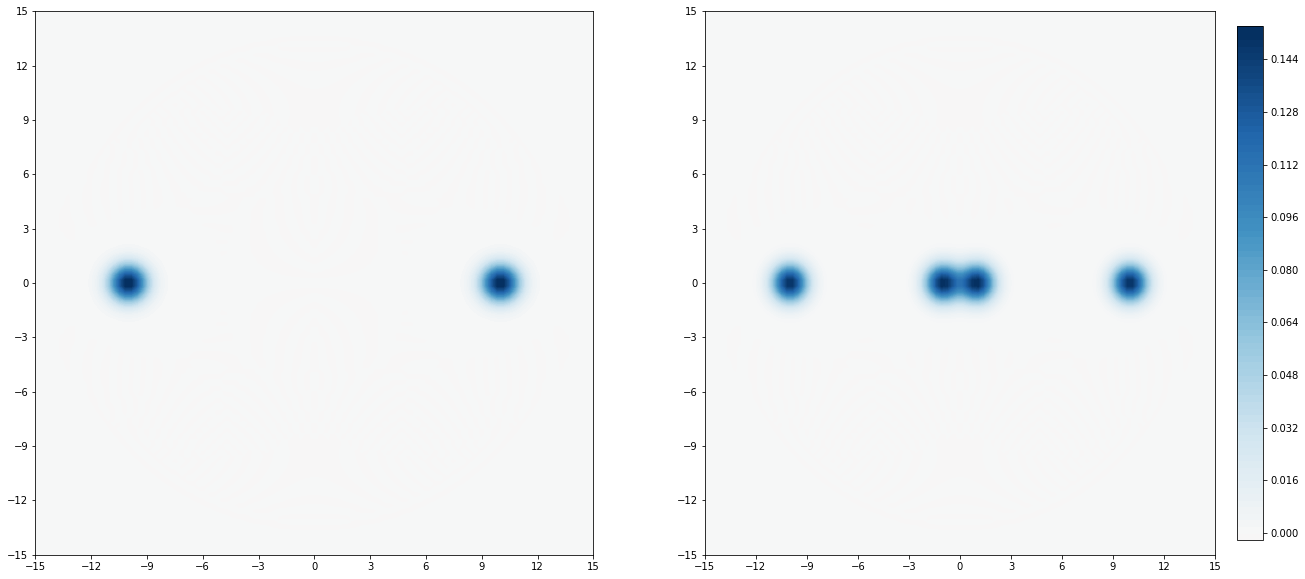

In [118]:
fig=plt.figure(figsize=(22,10))
ax1, ax2 = [plt.subplot2grid((1,2),(0,k)) for k in range(2)]

im1 = ax1.contourf(xvec, xvec, wigner_in, 100, cmap=cm.RdBu, norm= mpl.colors.Normalize(-wigner_in.max(), wigner_in.max()))
im2 = ax2.contourf(xvec, xvec, wigner_out, 100, cmap=cm.RdBu, norm= mpl.colors.Normalize(-wigner_out.max(), wigner_out.max()))
#ax1.set_xticks(np.arange(-10,10,1))
fig.colorbar(im1,fraction=0.046, pad=0.04)

for ax in [ax1,ax2]:
    Lx=15
    Ly=15
    ax.set_xlim([-Lx,Lx])
    ax.set_ylim([-Ly,Ly])
    st=3
    ax.set_xticks(np.arange(-15,15+st,st))
    ax.set_yticks(np.arange(-15,15+st,st))    
    

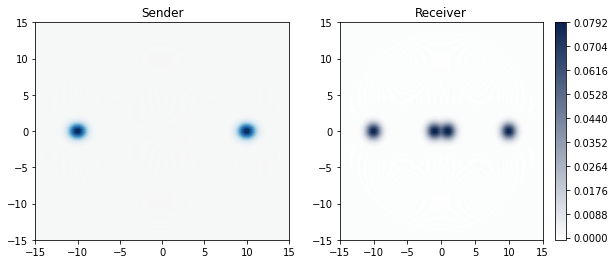

In [99]:
import matplotlib as mpl
from matplotlib import cm

wmap = wigner_cmap(wigner_in)  # Generate Wigner colormap

nrm = mpl.colors.Normalize(-wigner_in.max(), wigner_in.max())
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

plt1 = axes[0].contourf(xvec, xvec, wigner_in, 100, cmap=cm.RdBu, norm=nrm)
axes[0].set_title("Sender");

#cb1 = fig.colorbar(plt1, ax=axes[0])
plt2 = axes[1].contourf(xvec, xvec, wigner_out, 100, cmap=wmap)  # Apply Wigner colormap
axes[1].set_title("Receiver");
cb2 = fig.colorbar(plt2, ax=axes[1])

#fig.tight_layout()
plt.show()

In [2]:
N = 20

rho_coherent = coherent_dm(N, np.sqrt(2))

rho_thermal = thermal_dm(N, 2)
     
rho_fock = fock_dm(N, 2)

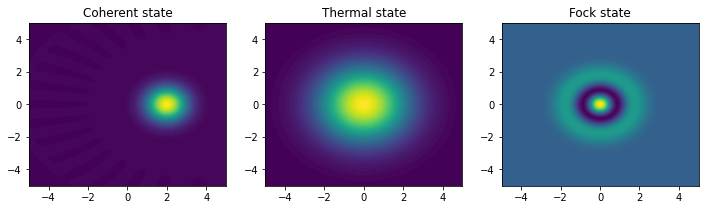

In [3]:
xvec = np.linspace(-5,5,200)

W_coherent = wigner(rho_coherent, xvec, xvec)

W_thermal = wigner(rho_thermal, xvec, xvec)

W_fock = wigner(rho_fock, xvec, xvec)

# plot the results

fig, axes = plt.subplots(1, 3, figsize=(12,3))

cont0 = axes[0].contourf(xvec, xvec, W_coherent, 100)

lbl0 = axes[0].set_title("Coherent state")

cont1 = axes[1].contourf(xvec, xvec, W_thermal, 100)

lbl1 = axes[1].set_title("Thermal state")

cont0 = axes[2].contourf(xvec, xvec, W_fock, 100)

lbl2 = axes[2].set_title("Fock state")

plt.show()

In [15]:
a=5*np.sqrt(2)
et = 0.1
lim=10

N = 20
xvec = np.linspace(-5,5,200)

rho1 = coherent_dm(N, a)
rho2 = coherent_dm(N, -a)

rho1at = coherent_dm(N, np.sqrt(et)*a)
rho2at = coherent_dm(N, -np.sqrt(et)*a)


rhoin = rho1
rhoout =  (rho1 + rho2 + rho1at + rho2at)/4

winput = wigner(rhoin, xvec, xvec)
wout = wigner(rhoout, xvec, xvec)

fig=plt.figure(figsize=(10,10))
ax1 = plt.subplot2grid((1,1),(0,0))
im = ax1.contourf(xvec, xvec, winput, 1000)
ax1.set_xticks(np.arange(-10,10,1))
ax1.set_ylim([-3,3])
ax1.set_xlim([-3,3])

fig.colorbar(im)

TypeError: Incompatible quantum object dimensions

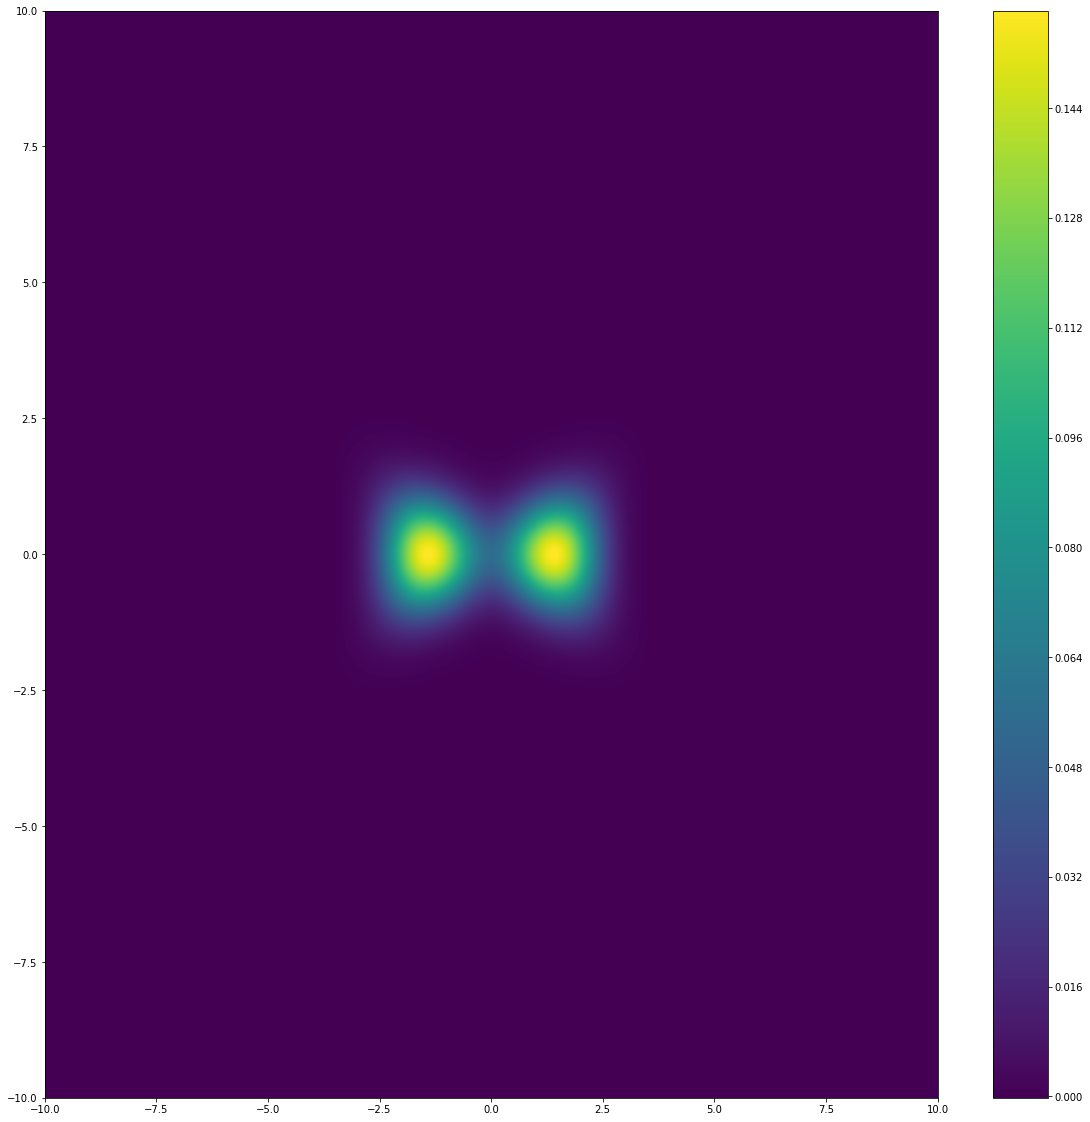

In [34]:
a=10
et = 0.1
M=10

N = 20
xvec = np.linspace(-M,M,200)

rho1 = coherent_dm(N, a)
rho2 = coherent_dm(N, -a)

rho1at = coherent_dm(N, np.sqrt(et)*a)
rho2at = coherent_dm(N, -np.sqrt(et)*a)


rhoin = (rho1 + rho2)/2
rhoout =  (rho1 + rho2 + rho1at + rho2at)/4

winput = wigner(rhoin, xvec, xvec)
wout = wigner(rhoout, xvec, xvec)

fig=plt.figure(figsize=(20,20))
ax1 = plt.subplot2grid((1,1),(0,0))
im = ax1.contourf(xvec, xvec, winput, 1000)
fig.colorbar(im)

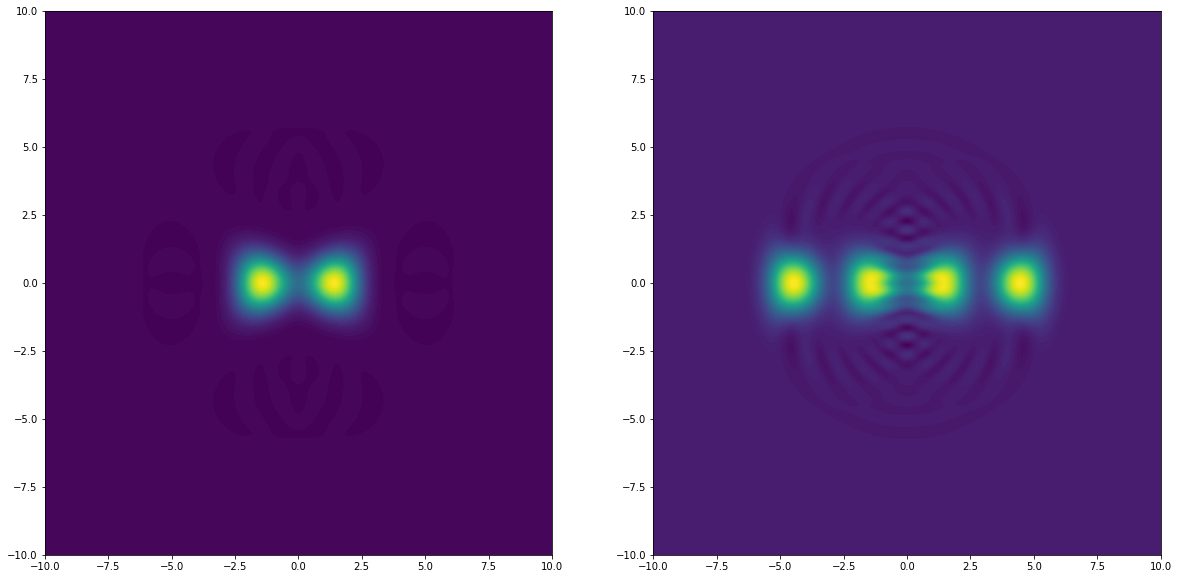

In [30]:
a=10
et = 0.1
M=10

N = 20
xvec = np.linspace(-M,M,200)

rho1 = coherent_dm(N, a)
rho2 = coherent_dm(N, -a)

rho1at = coherent_dm(N, np.sqrt(et)*a)
rho2at = coherent_dm(N, -np.sqrt(et)*a)


rhoin = (rho1 + rho2)/2
rhoout =  (rho1 + rho2 + rho1at + rho2at)/4

winput = wigner(rhoin, xvec, xvec)
wout = wigner(rhoout, xvec, xvec)

fig=plt.figure(figsize=(20,10))
ax1 = plt.subplot2grid((1,2),(0,0))
ax2 = plt.subplot2grid((1,2),(0,1))

ax1.contourf(xvec, xvec, winput, 100)
ax2.contourf(xvec, xvec, wout, 100)

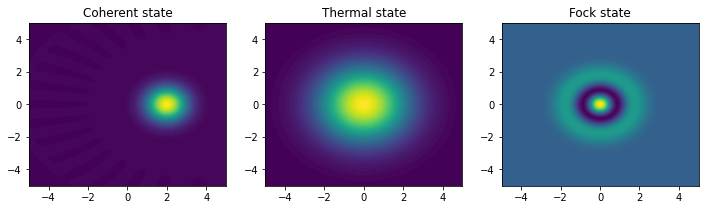

In [5]:


W_coherent = wigner(rho_coherent, xvec, xvec)

W_thermal = wigner(rho_thermal, xvec, xvec)

W_fock = wigner(rho_fock, xvec, xvec)

# plot the results

fig, axes = plt.subplots(1, 3, figsize=(12,3))

cont0 = axes[0].contourf(xvec, xvec, W_coherent, 100)

lbl0 = axes[0].set_title("Coherent state")

cont1 = axes[1].contourf(xvec, xvec, W_thermal, 100)

lbl1 = axes[1].set_title("Thermal state")

cont0 = axes[2].contourf(xvec, xvec, W_fock, 100)

lbl2 = axes[2].set_title("Fock state")

plt.show()

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import time


from qutip import *
from qutip.ipynbtools import plot_animation



In [2]:
def jc_integrate(N, wc, wa, g, kappa, gamma, psi0, use_rwa, tlist):

    # Hamiltonian
    idc = qeye(N)
    ida = qeye(2)

    a  = tensor(destroy(N), ida)
    sm = tensor(idc, destroy(2))

    if use_rwa: 
        # use the rotating wave approxiation
        H = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() * sm + a * sm.dag())
    else:
        H = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() + a) * (sm + sm.dag())
        
    # collapse operators
    c_op_list = []

    n_th_a = 0.0 # zero temperature

    rate = kappa * (1 + n_th_a)
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * a)

    rate = kappa * n_th_a
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * a.dag())

    rate = gamma
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * sm)

    # evolve and calculate return state vectors
    result = mesolve(H, psi0, tlist, c_op_list, [])  

    return result

In [3]:
# parameters
wc = 1.0 * 2 * np.pi   # cavity frequency
wa = 1.0 * 2 * np.pi   # atom frequency
g  = 0.05 * 2 * np.pi  # coupling strength
kappa = 0.05        # cavity dissipation rate
gamma = 0.15        # atom dissipation rate
N = 10              # number of cavity fock states

use_rwa = True

# initial state
psi0 = tensor(basis(N,0), basis(2,1))  # start with an excited atom 
#psi0 = tensor(coherent(N,1.5), basis(2,0))  # or a coherent state the in cavity
#psi0 = tensor((coherent(N,2.0)+coherent(N,-2.0)).unit(), basis(2,0))  # or a superposition of coherent states

tlist = np.linspace(0, 30, 150)

In [4]:
result = jc_integrate(N, wc, wa, g, kappa, gamma, psi0, use_rwa, tlist)

In [5]:


xvec = np.linspace(-5.,5.,100)
X,Y = np.meshgrid(xvec, xvec)



In [6]:
def plot_setup(result):    
    
    fig = plt.figure(figsize=(12, 6))
    ax = Axes3D(fig, azim=-107, elev=49)

    return fig, ax


In [7]:
cb = None

def plot_result(result, n, fig=None, axes=None):
    
    global cb
    
    if fig is None or axes is None:
        fig, ax = plot_setup(result)
        
    axes.cla()

    # trace out the atom
    rho_cavity = ptrace(result.states[n], 0)

    W = wigner(rho_cavity, xvec, xvec)
    
    surf = axes.plot_surface(X, Y, W, rstride=1, cstride=1, cmap=cm.jet,
                           alpha=1.0, linewidth=0.05, vmax=0.25, vmin=-0.25)
    axes.set_xlim3d(-5, 5)
    axes.set_ylim3d(-5, 5)
    axes.set_zlim3d(-0.25, 0.25)
    
    if not cb:
        cb = plt.colorbar(surf, shrink=0.65, aspect=20)

    return fig, axes

ValueError: unknown file extension: .mp4

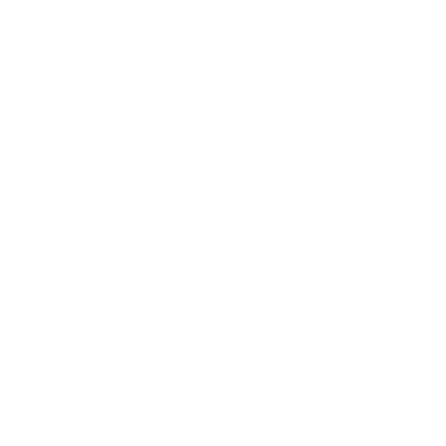

In [12]:
plot_animation(plot_setup, plot_result, result, writer = 'mencoder')